## BEIJING AIR POLLUTION PREDICTION

### Information about dataset


This hourly dataset contains the PM2.5 data of US Embassy in Beijing. Note: PM2.5 refers to atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers. In other words, it's used as a measure of pollution.

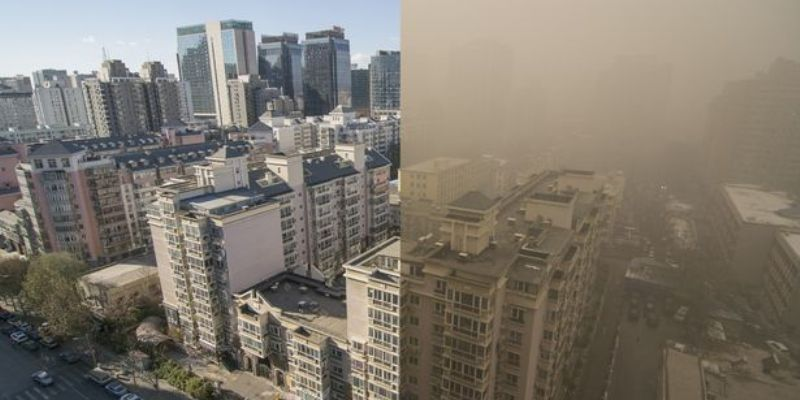

### Information about city

Beijing is the capital city of the People’s Republic of China and was formerly known as Peking. It is the world’s most populous city with an estimated population of over 21 million residents. The city is located in the northern part of China and covers an area of 16,500 square kilometres. In 2019 China was classed as the 11th dirtiest country in the world. The city of Beijing was ranked at 201.

Beijing air pollution is mainly caused by vehicle emissions and the burning of coal to produce electricity. Other factors that influence air quality in Beijing include the manufacturing industry and population growth. Of the twenty cities throughout the world with the worst air quality, 16 of them are located in China. Because of this, its Environmental Sustainability Index is ranked towards the bottom amongst countries worldwide.

An increase in personal wealth can also have an influence here. With surplus money at the end of each month, an individual is more able to buy a car. The number of motor vehicles in Beijing in 2017 was estimated at 5.5 million.

Source: iqair https://www.iqair.com/china/beijing

### Air pllution influence to health

Most common health issues are a sore throat and cough. Over the past decade, lung cancer rates have risen by over 60%. Other consequences of air pollution in Beijing include yellow skies, higher mortality rates, and cancelled flights due to low visibility levels.

Air pollution is very serious in many parts of the world. Nine out of ten people in the world breathe polluted air, and the death toll caused by air pollution reaches 7 million every year. Up to one third of deaths caused by stroke, lung cancer and heart disease are due to air pollution. Air pollution is everywhere. No matter where you live, you cannot escape. The fine pollutants in the air break through our body's defences, penetrate into our respiratory and circulatory systems and damage our lungs, heart and brain.

The pollutant that affects people the most is particulate matter, usually abbreviated as PM and used as a measure of air pollution. Although particles with a diameter of 10 microns or less (≤PM10) can penetrate and embed deep in the lungs, the ones that are more harmful to health are those with a diameter of 2.5 microns or less (≤PM2.5). These particles are very small, only one 60th the diameter of a human hair.

Source: iqair https://www.iqair.com/china/beijing

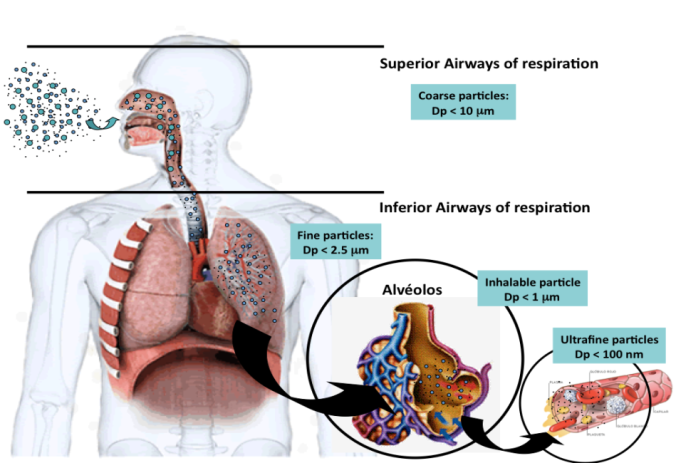

Picture source: https://ranzhaoualberta.com/research-interest/atmospheric-aerosol-and-air-pollution/

### Attribute Information:

- no: row number
- year: year of data in this row
- month: month of data in this row
- day: day of data in this row
- hour: hour of data in this row
- pm2.5: PM 2.5 concentration (ug/m^3)
- DEWP: Dew Point (a,,f)
(the temperature to which air must be cooled to become saturated with water vapor, assuming constant air pressure and water content.)
- TEMP:Temperature (a,,f)
- PRES: Pressure (hPa)
- cbwd: Combined wind direction
- lws: Cumulated wind speed (m/s)
- Is: Cumulated hours of snow
- Ir: Cumulated hours of rain 

### Примечение

* Dew Point (Точка росы) - это температура, при которой водяной пар в воздухе при постоянном барометрическом давлении конденсируется в жидкую воду с той же скоростью, при которой он испаряется. При температурах ниже точки росы вода выйдет из воздуха. Конденсированная вода называется росой, когда она образуется на твердой поверхности. Точка росы - это температура насыщения воды к воздуху. Точка росы связана с относительной влажностью. Высокая относительная влажность указывает, что точка росы ближе к текущей температуре воздуха. Относительная влажность 100% указывает, что точка росы равна текущей температуре и что воздух максимально насыщен водой. Когда содержание влаги остается постоянным, а температура увеличивается, относительная влажность уменьшается. Пилоты общей авиации используют данные точки росы, чтобы рассчитать вероятность обледенения карбюратора и тумана, а также оценить высоту облачной базы.


Source: Educalingo https://educalingo.com/ru/dic-en/dew-point

## 0. Import Libraries

In [9]:
import math
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from keras.models import load_model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Dropout

from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adamax

from scikeras.wrappers import KerasRegressor
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import mean_squared_error
from mlens.visualization import corrmat

import seaborn as sns                                             
import matplotlib.pyplot as plt                                  
from colorama import Fore

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from math import sqrt

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

In [10]:
def percent_value_counts (df, variable):
    percent = pd.DataFrame(round(df[variable].value_counts(dropna = False, normalize = True)*100, 2))
    total = pd.DataFrame(df[variable].value_counts(dropna = False))
    
    total.columns = ['Total']
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

## 1. Import Dataset

In [11]:
# Import dataset 
df = pd.read_csv('../AI/All Data Files/pollution.csv')

## 2. Data Preprocessing

In [12]:
# Checking the first 10 rows from the dataset
df.head(10)

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0
5   6  2010      1    1     5    NaN   -19 -10.0  1017.0   NW  16.10   0   0
6   7  2010      1    1     6    NaN   -19  -9.0  1017.0   NW  19.23   0   0
7   8  2010      1    1     7    NaN   -19  -9.0  1017.0   NW  21.02   0   0
8   9  2010      1    1     8    NaN   -19  -9.0  1017.0   NW  24.15   0   0
9  10  2010      1    1     9    NaN   -20  -8.0  1017.0   NW  27.28   0   0

In [13]:
# Checking the last 10 rows from the dataset
df.tail(10)

No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
43814  43815  2014     12   31    14    9.0   -27   1.0  1032.0   NW  196.21   
43815  43816  2014     12   31    15   11.0   -26   1.0  1032.0   NW  205.15   
43816  43817  2014     12   31    16    8.0   -23   0.0  1032.0   NW  214.09   
43817  43818  2014     12   31    17    9.0   -22  -1.0  1033.0   NW  221.24   
43818  43819  2014     12   31    18   10.0   -22  -2.0  1033.0   NW  226.16   
43819  43820  2014     12   31    19    8.0   -23  -2.0  1034.0   NW  231.97   
43820  43821  2014     12   31    20   10.0   -22  -3.0  1034.0   NW  237.78   
43821  43822  2014     12   31    21   10.0   -22  -3.0  1034.0   NW  242.70   
43822  43823  2014     12   31    22    8.0   -22  -4.0  1034.0   NW  246.72   
43823  43824  2014     12   31    23   12.0   -21  -3.0  1034.0   NW  249.85   

       Is  Ir  
43814   0   0  
43815   0   0  
43816   0   0  
43817   0   0  
43818   0   0  
43819   0   0  
43820   0   0  
43821   0   0  
43822   0   0  
43823   0   0

In [14]:
# Getting basic information about study dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [15]:
# Checking columns from the dataset
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [16]:
# Checking basic background information including mean, std, min & max parameters 
df.describe().T.style.background_gradient(cmap = "viridis")

In the last 15 years, China has been steadily improving its air quality. It reduced levels of PM2.5 by 47% between 2005 and 2015. Beijing recorded its lowest ever monthly reading for air pollution in August 2019, with a low of 23 µg/m³. The main reasons for the reduction of air pollution in China are the shift from coal to natural gas in the power stations, the large number of electric vehicles used by the people and the effort from the Chinese government to halt deforestation in the country.

Source: iqair https://www.iqair.com/china/beijing

In [17]:
# Checking labels in the features from the dataset 

for col in df.columns:
    print(col, ': ', len(df[col].unique()), 'labels')

No :  43824 labels
year :  5 labels
month :  12 labels
day :  31 labels
hour :  24 labels
pm2.5 :  582 labels
DEWP :  69 labels
TEMP :  64 labels
PRES :  60 labels
cbwd :  4 labels
Iws :  2788 labels
Is :  28 labels
Ir :  37 labels


In [18]:
# Handling with data columns & renaming other columns from the dataset

df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']], format = '%Y %m %d %H')
df = df.drop(columns=['No', 'year', 'month', 'day', 'hour'])
df = df.rename(columns={
    'pm2.5': 'pollution',
    'DEWP': 'dew_point',
    'TEMP': 'temperature',
    'PRESS': 'pressure',
    'cbwd': 'wind_direction',
    'Iws': 'wind_speed',
    'Is': 'snow',
    'Ir': 'rain'
})

df['date']

0       2010-01-01 00:00:00
1       2010-01-01 01:00:00
2       2010-01-01 02:00:00
3       2010-01-01 03:00:00
4       2010-01-01 04:00:00
                ...        
43819   2014-12-31 19:00:00
43820   2014-12-31 20:00:00
43821   2014-12-31 21:00:00
43822   2014-12-31 22:00:00
43823   2014-12-31 23:00:00
Name: date, Length: 43824, dtype: datetime64[ns]

In [19]:
df.groupby('wind_direction').median()

pollution  dew_point  temperature    PRES  wind_speed  snow  \
wind_direction                                                                
NE                   55.0        1.0         11.0  1019.0        3.13   0.0   
NW                   31.0       -8.0          6.0  1021.0       14.31   0.0   
SE                   91.0       11.0         21.0  1012.0       10.74   0.0   
cv                   98.0        6.0         13.0  1016.0        1.34   0.0   

                rain  
wind_direction        
NE               0.0  
NW               0.0  
SE               0.0  
cv               0.0

In [20]:
# Checking the dataset with new columns 
df

pollution  dew_point  temperature    PRES wind_direction  wind_speed  \
0            NaN        -21        -11.0  1021.0             NW        1.79   
1            NaN        -21        -12.0  1020.0             NW        4.92   
2            NaN        -21        -11.0  1019.0             NW        6.71   
3            NaN        -21        -14.0  1019.0             NW        9.84   
4            NaN        -20        -12.0  1018.0             NW       12.97   
...          ...        ...          ...     ...            ...         ...   
43819        8.0        -23         -2.0  1034.0             NW      231.97   
43820       10.0        -22         -3.0  1034.0             NW      237.78   
43821       10.0        -22         -3.0  1034.0             NW      242.70   
43822        8.0        -22         -4.0  1034.0             NW      246.72   
43823       12.0        -21         -3.0  1034.0             NW      249.85   

       snow  rain                date  
0         0     0 2010-01-01 00:00:00  
1         0     0 2010-01-01 01:00:00  
2         0     0 2010-01-01 02:00:00  
3         0     0 2010-01-01 03:00:00  
4         0     0 2010-01-01 04:00:00  
...     ...   ...                 ...  
43819     0     0 2014-12-31 19:00:00  
43820     0     0 2014-12-31 20:00:00  
43821     0     0 2014-12-31 21:00:00  
43822     0     0 2014-12-31 22:00:00  
43823     0     0 2014-12-31 23:00:00  

[43824 rows x 9 columns]

In [21]:
# Defining new time columns for data preprocessing 

df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['hour'] = pd.DatetimeIndex(df['date']).hour
df['week_of_year'] = pd.DatetimeIndex(df['date']).weekofyear
df['quarter'] = pd.DatetimeIndex(df['date']).quarter

df[['date', 'year', 'month', 'day', 'hour', 'week_of_year', 'quarter',]].head()

date  year  month  day  hour  week_of_year  quarter
0 2010-01-01 00:00:00  2010      1    1     0            53        1
1 2010-01-01 01:00:00  2010      1    1     1            53        1
2 2010-01-01 02:00:00  2010      1    1     2            53        1
3 2010-01-01 03:00:00  2010      1    1     3            53        1
4 2010-01-01 04:00:00  2010      1    1     4            53        1

In [22]:
# Defining missing data from the dataset

df.isnull().mean()

pollution         0.047166
dew_point         0.000000
temperature       0.000000
PRES              0.000000
wind_direction    0.000000
wind_speed        0.000000
snow              0.000000
rain              0.000000
date              0.000000
year              0.000000
month             0.000000
day               0.000000
hour              0.000000
week_of_year      0.000000
quarter           0.000000
dtype: float64

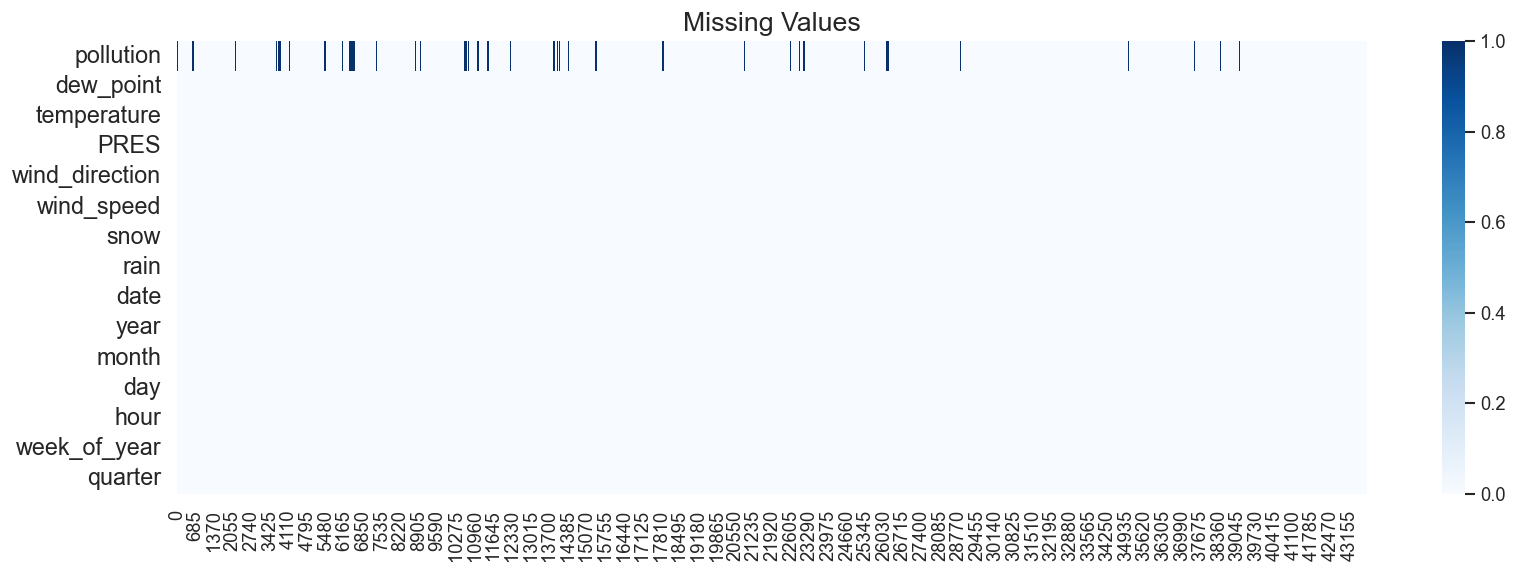

In [1483]:
# Defining & visualizing missing data from the dataset

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

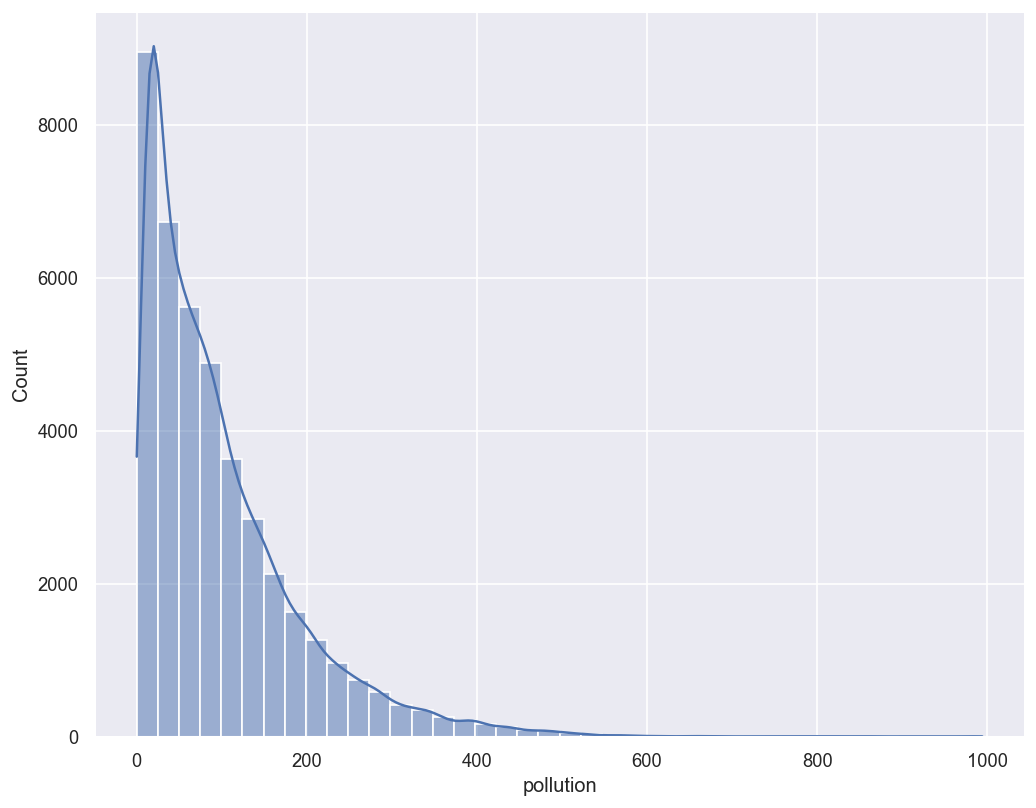

In [1413]:
# Defining target feature 'pollution'

plt.figure(figsize = (10,8))
sns.histplot(df['pollution'], kde = True, bins = 40)
plt.show()

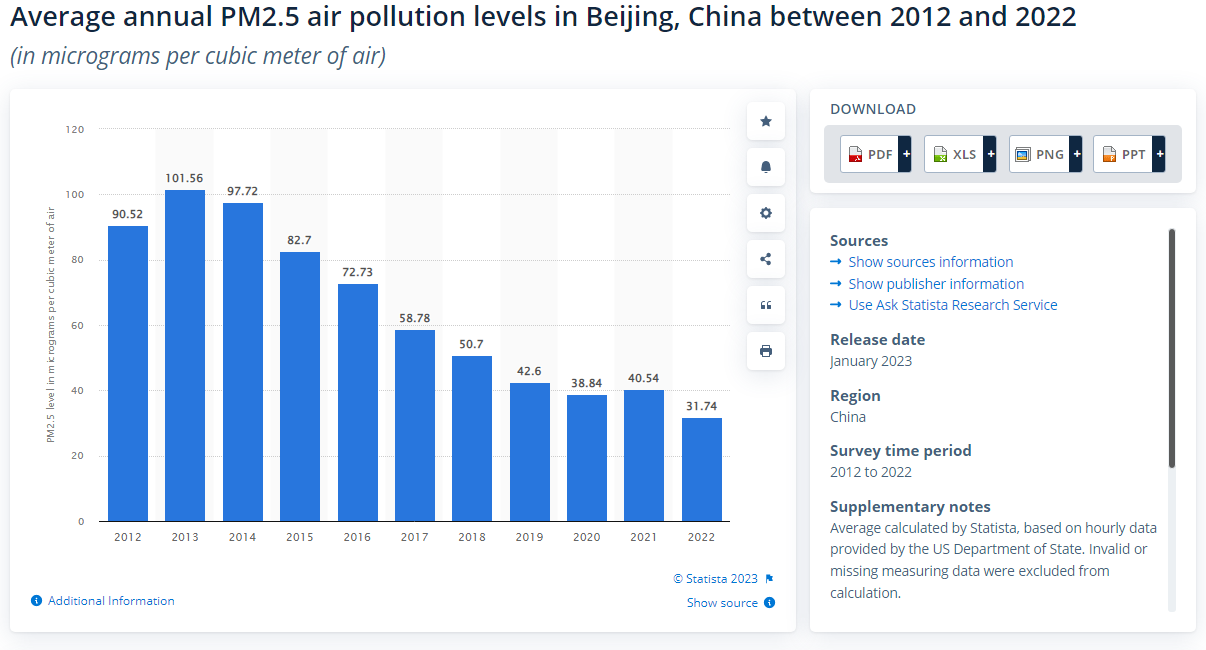

According to the monitoring data from the Embassy of the United States, there was on average 31.7 micrograms of PM2.5 particles per cubic meter to be found in the air in Beijing during 2022. The air quality has improved considerably over recent years.

Source: Statista https://www.statista.com/statistics/690823/china-annual-pm25-particle-levels-beijing/

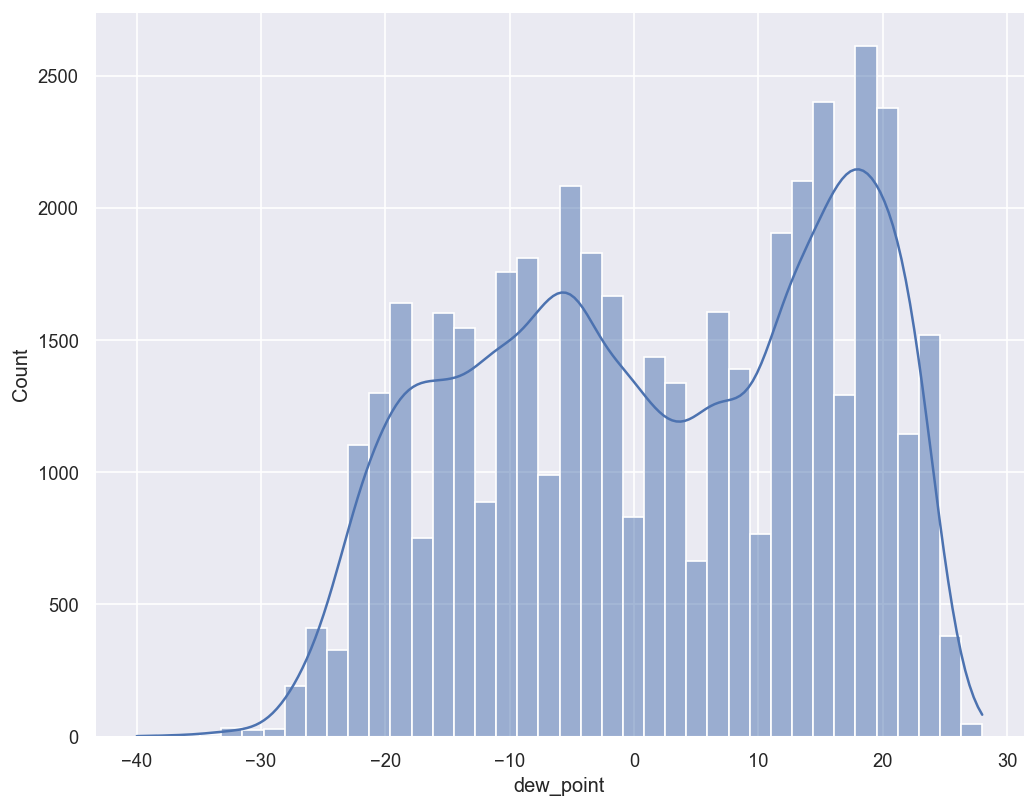

In [1414]:
# Defining dataset mean dew points

plt.figure(figsize = (10,8))
sns.histplot(df['dew_point'], kde = True, bins = 40)
plt.show()

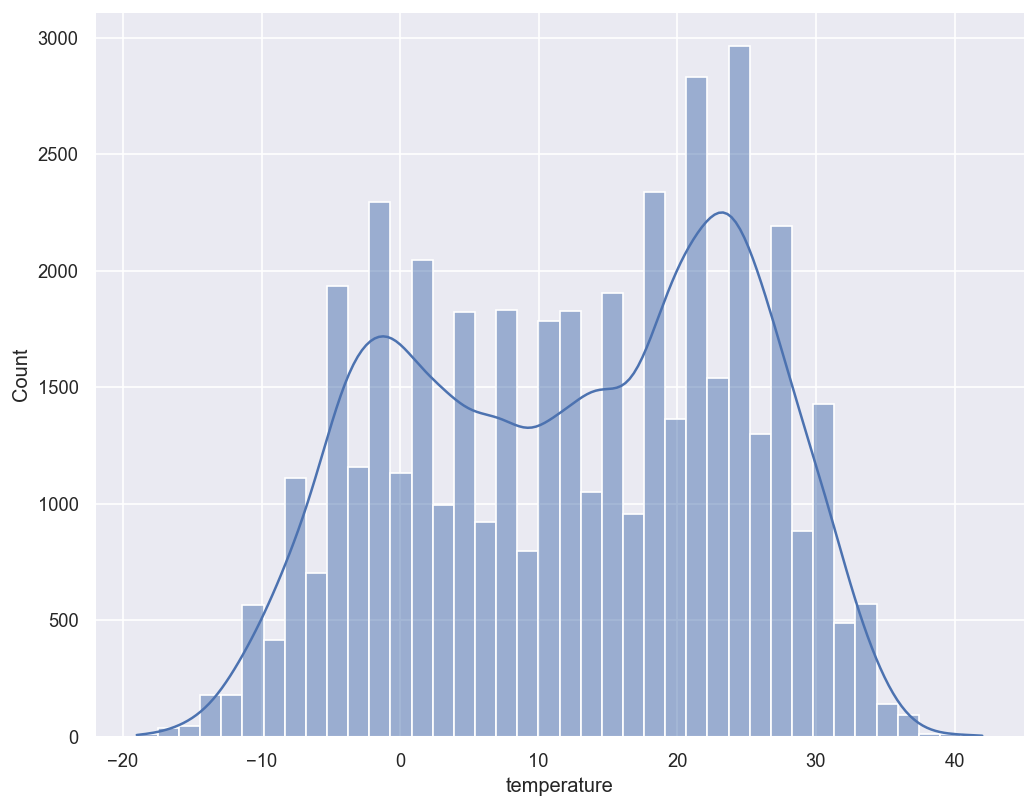

In [1415]:
# Defining dataset mean temperature

plt.figure(figsize = (10,8))
sns.histplot(df['temperature'], kde = True, bins = 40)
plt.show()

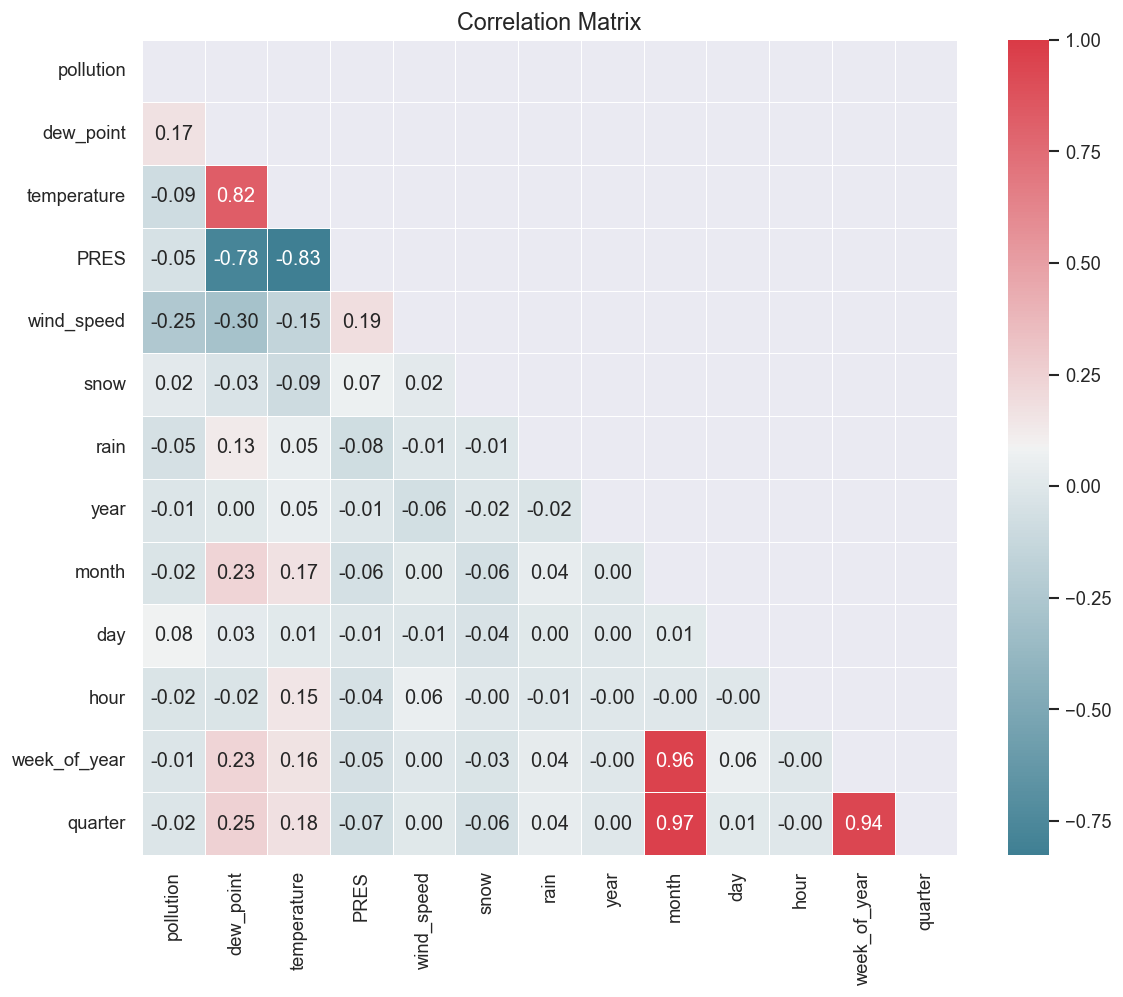

In [1416]:
# Defining correlation between study variables 

corrmat(df.corr(), inflate=False)
plt.show()

There was a positive correlation between "Temperature" ad "Dew point" variables (r = 0.82), and negative correlation between "PRES" and "Dew point" (r = -0.78), "Pres" and "Temperatures" (r = -0.83). Based on correlation results "PRES" and "Dew point" variables will be removed from the dataset.      

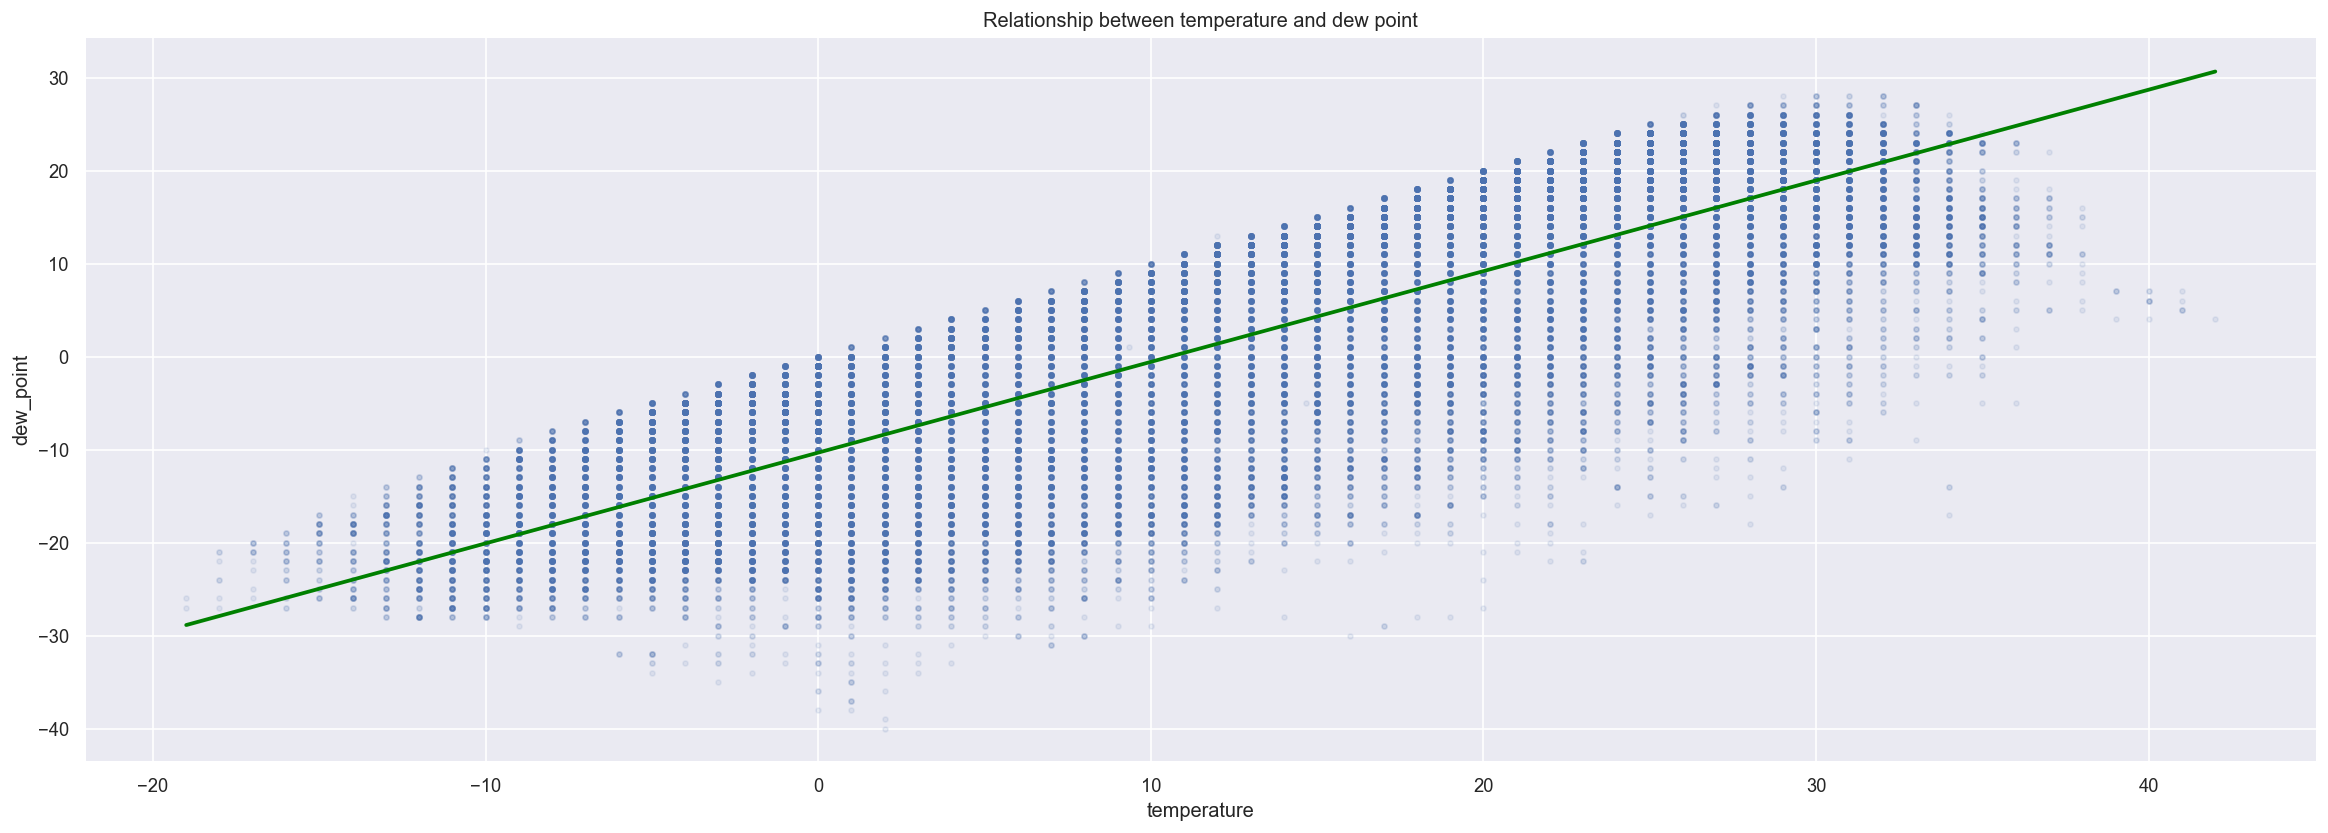

In [1417]:
# Defining correlation pattern between positve correlated variables

sns.regplot(x='temperature', y='dew_point', data=df, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"green"})
plt.title('Relationship between temperature and dew point')
plt.show()

Possitive correlation between "Temperature" and "Dew point" variables (r = 0.82). While "Temperature" is increasing the "Dew point" is increasing too. 

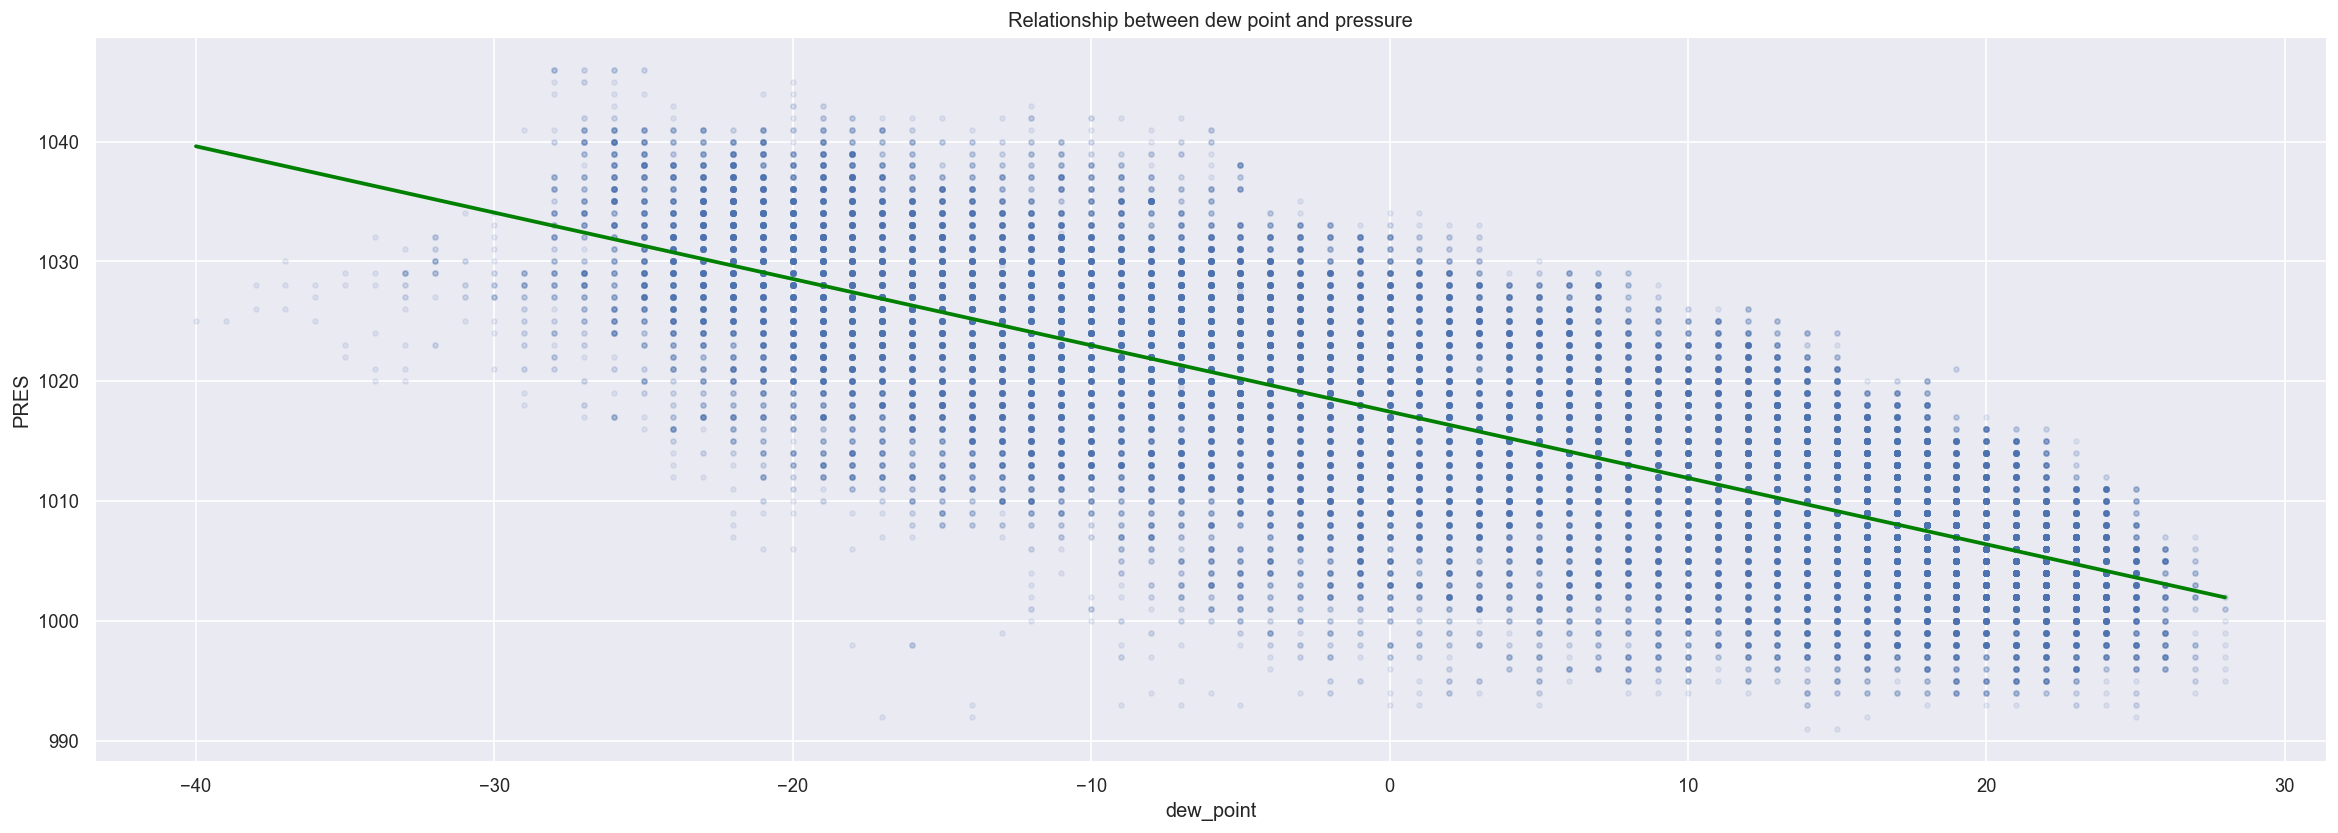

In [1366]:
# Defining correlation pattern between negative correlated variables

sns.regplot(x='dew_point', y='PRES', data=df, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"green"})
plt.title('Relationship between dew point and pressure')
plt.show()

Neggatvie correlation between "Dew point" and "PRES" variables (r = - 0.78). While "PRES" is decreasing "Dew point" is increasing. 

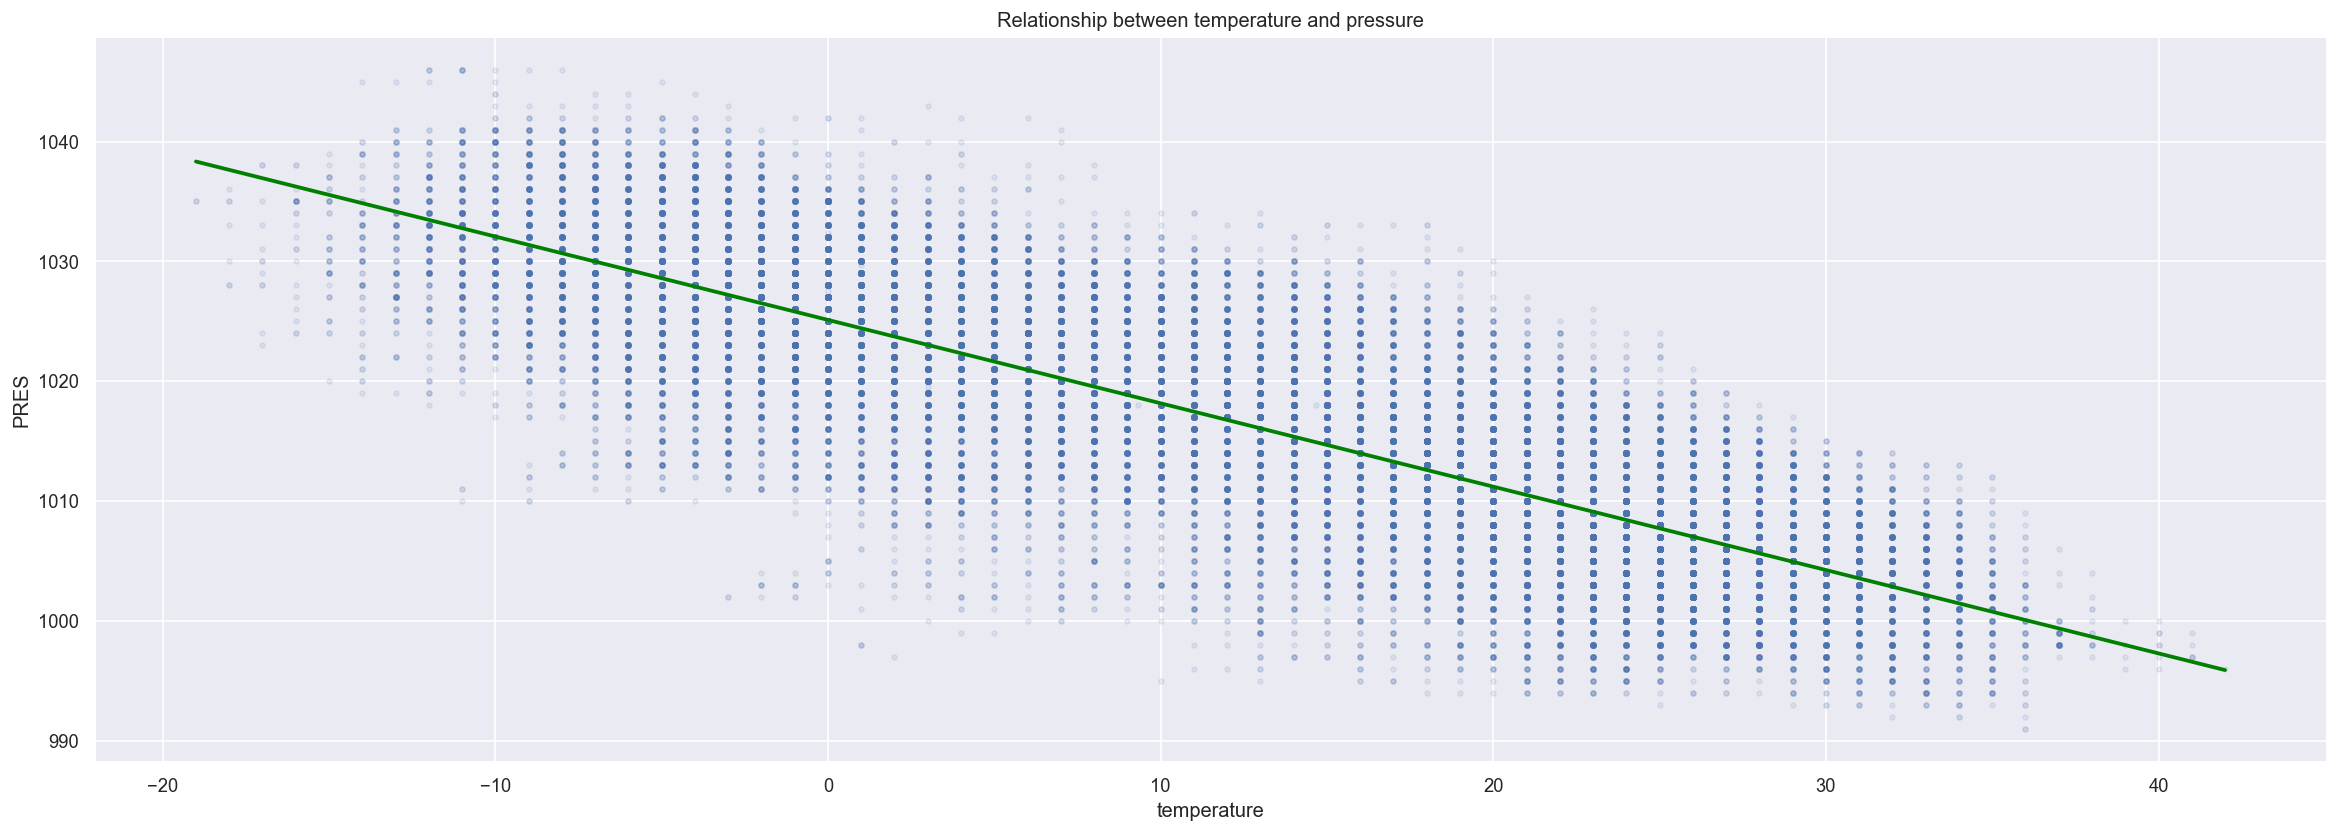

In [1365]:
# Defining correlation pattern between negative correlated variables

sns.regplot(x='temperature', y='PRES', data=df, marker=".", scatter_kws={'alpha':0.1}, line_kws={'color':"green"})
plt.title('Relationship between temperature and pressure')
plt.show()

Negative correlation between "Temperature" and "PRES" variables (r = - 0.83). While "PRES" is decreasing "Temperature" is increasing. 

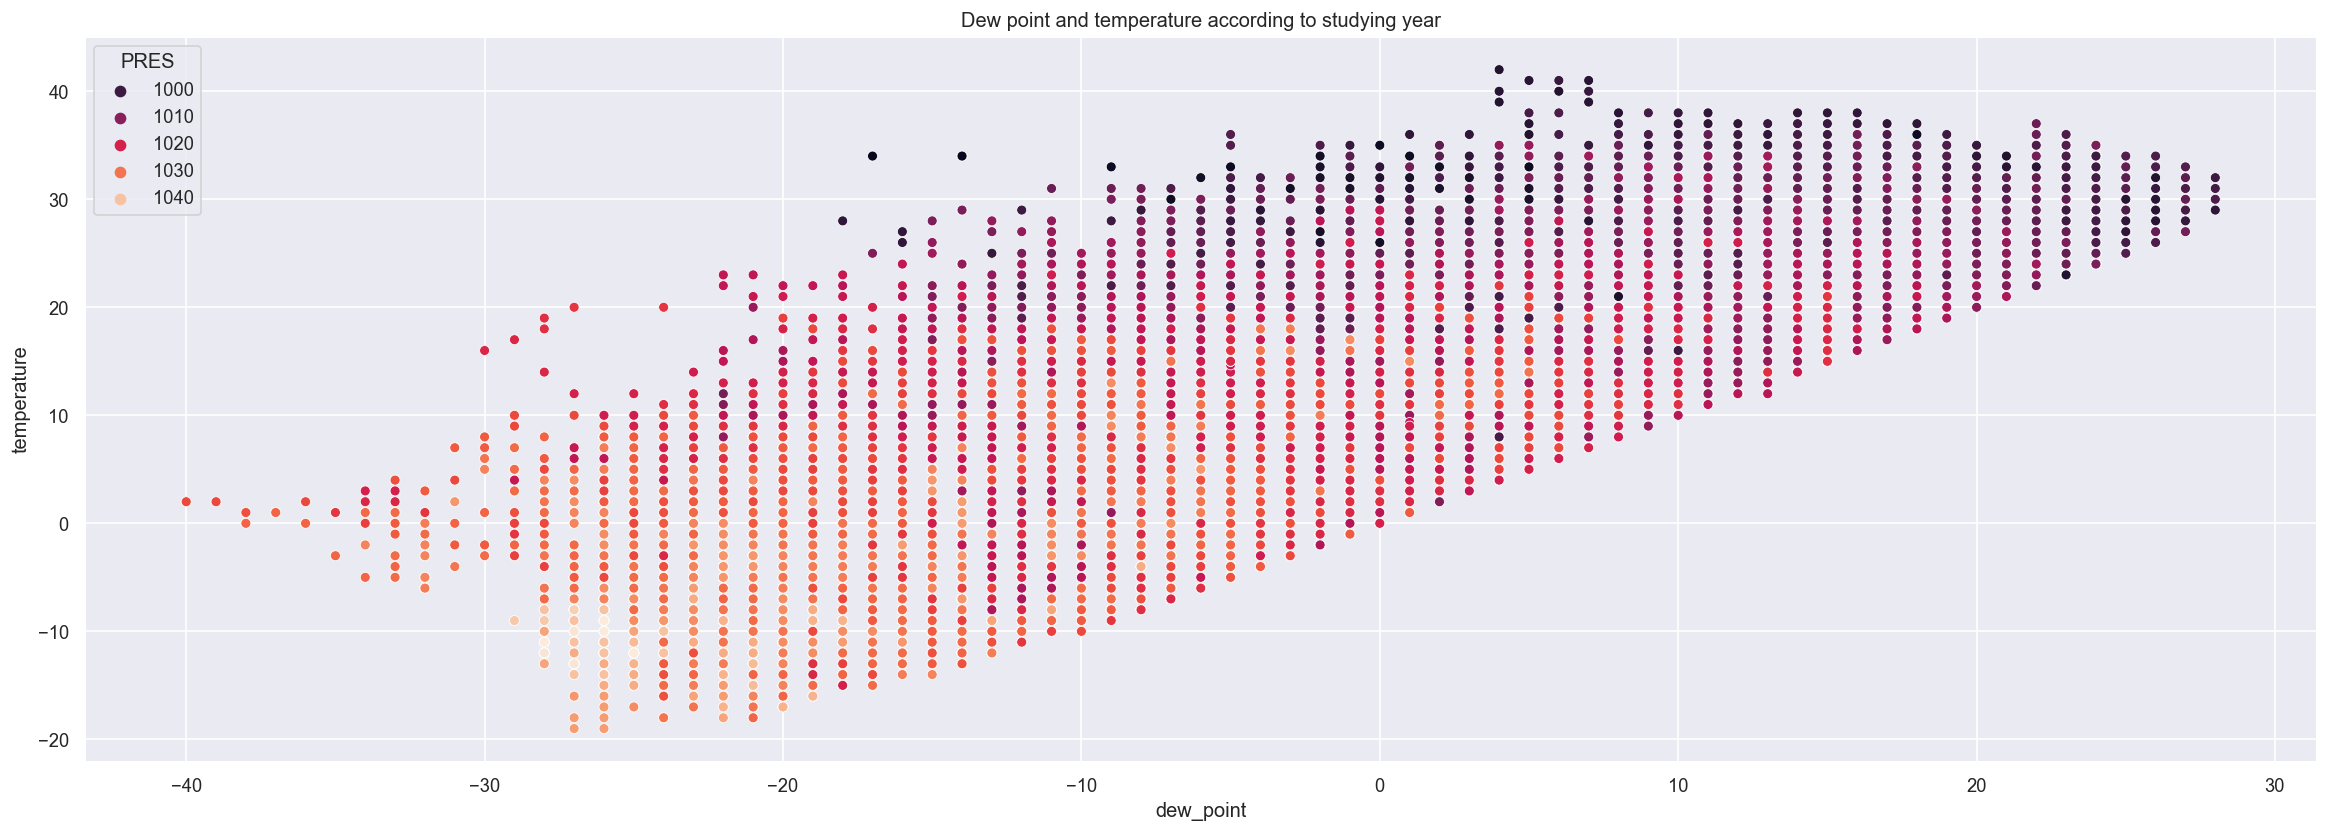

In [1364]:
# Defining correlation patterns between positve and negative correlated variables

sns.scatterplot(x='dew_point', y='temperature', hue='PRES', data=df, palette = "rocket")
plt.title('Dew point and temperature according to studying year')
plt.show()

This table shows that in most cases when "Dew point" was negative and "Temperature" was below 0, the highest "PRES" was witnessed in Beijing. 

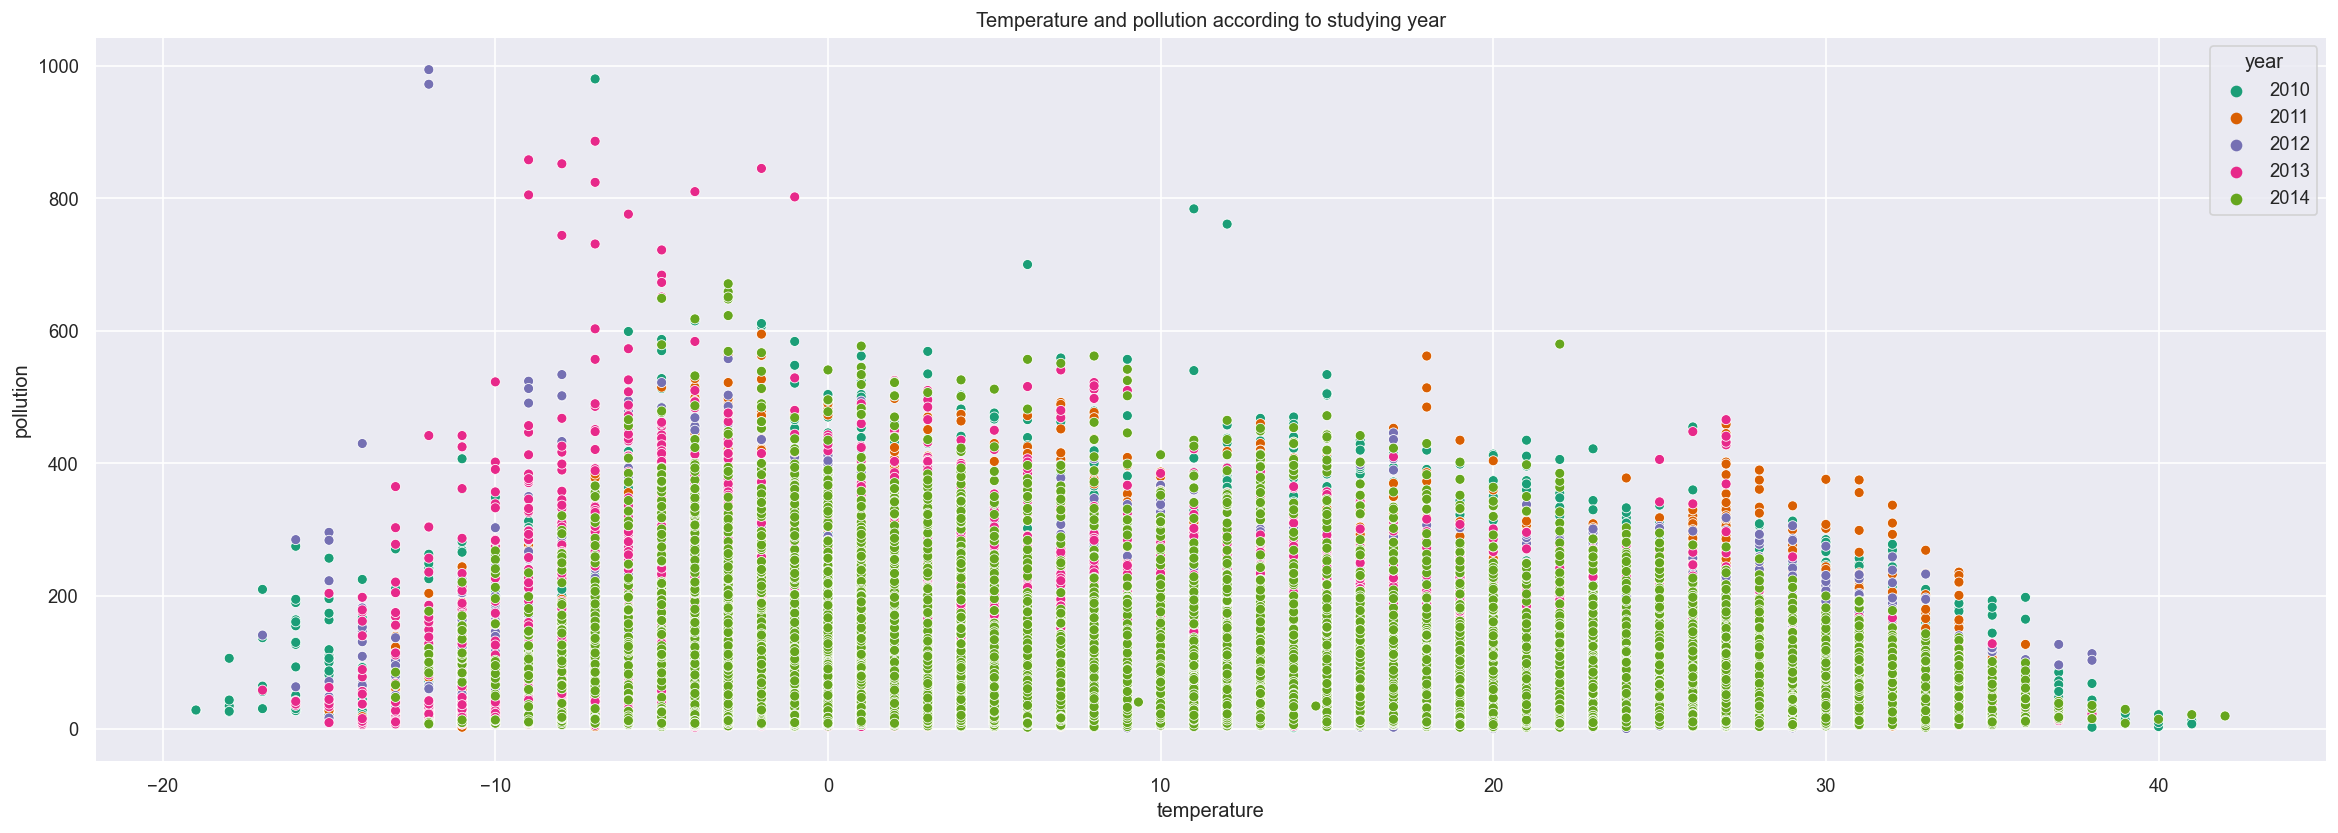

In [1363]:
# Defining correlation patterns between positve and negative correlated variables

sns.scatterplot(x='temperature', y='pollution', hue='year', data=df, palette = "Dark2")
plt.title('Temperature and pollution according to studying year')
plt.show()

This table shows that the highest pollution level was tracked when the temperature was between -10 and 0 degrees of Celsius. Hence in winter people witnessed the highest level of pollution. The highest level of pollution was recorded in 2012 when the temperature was less than - 10degrees of Celsius.

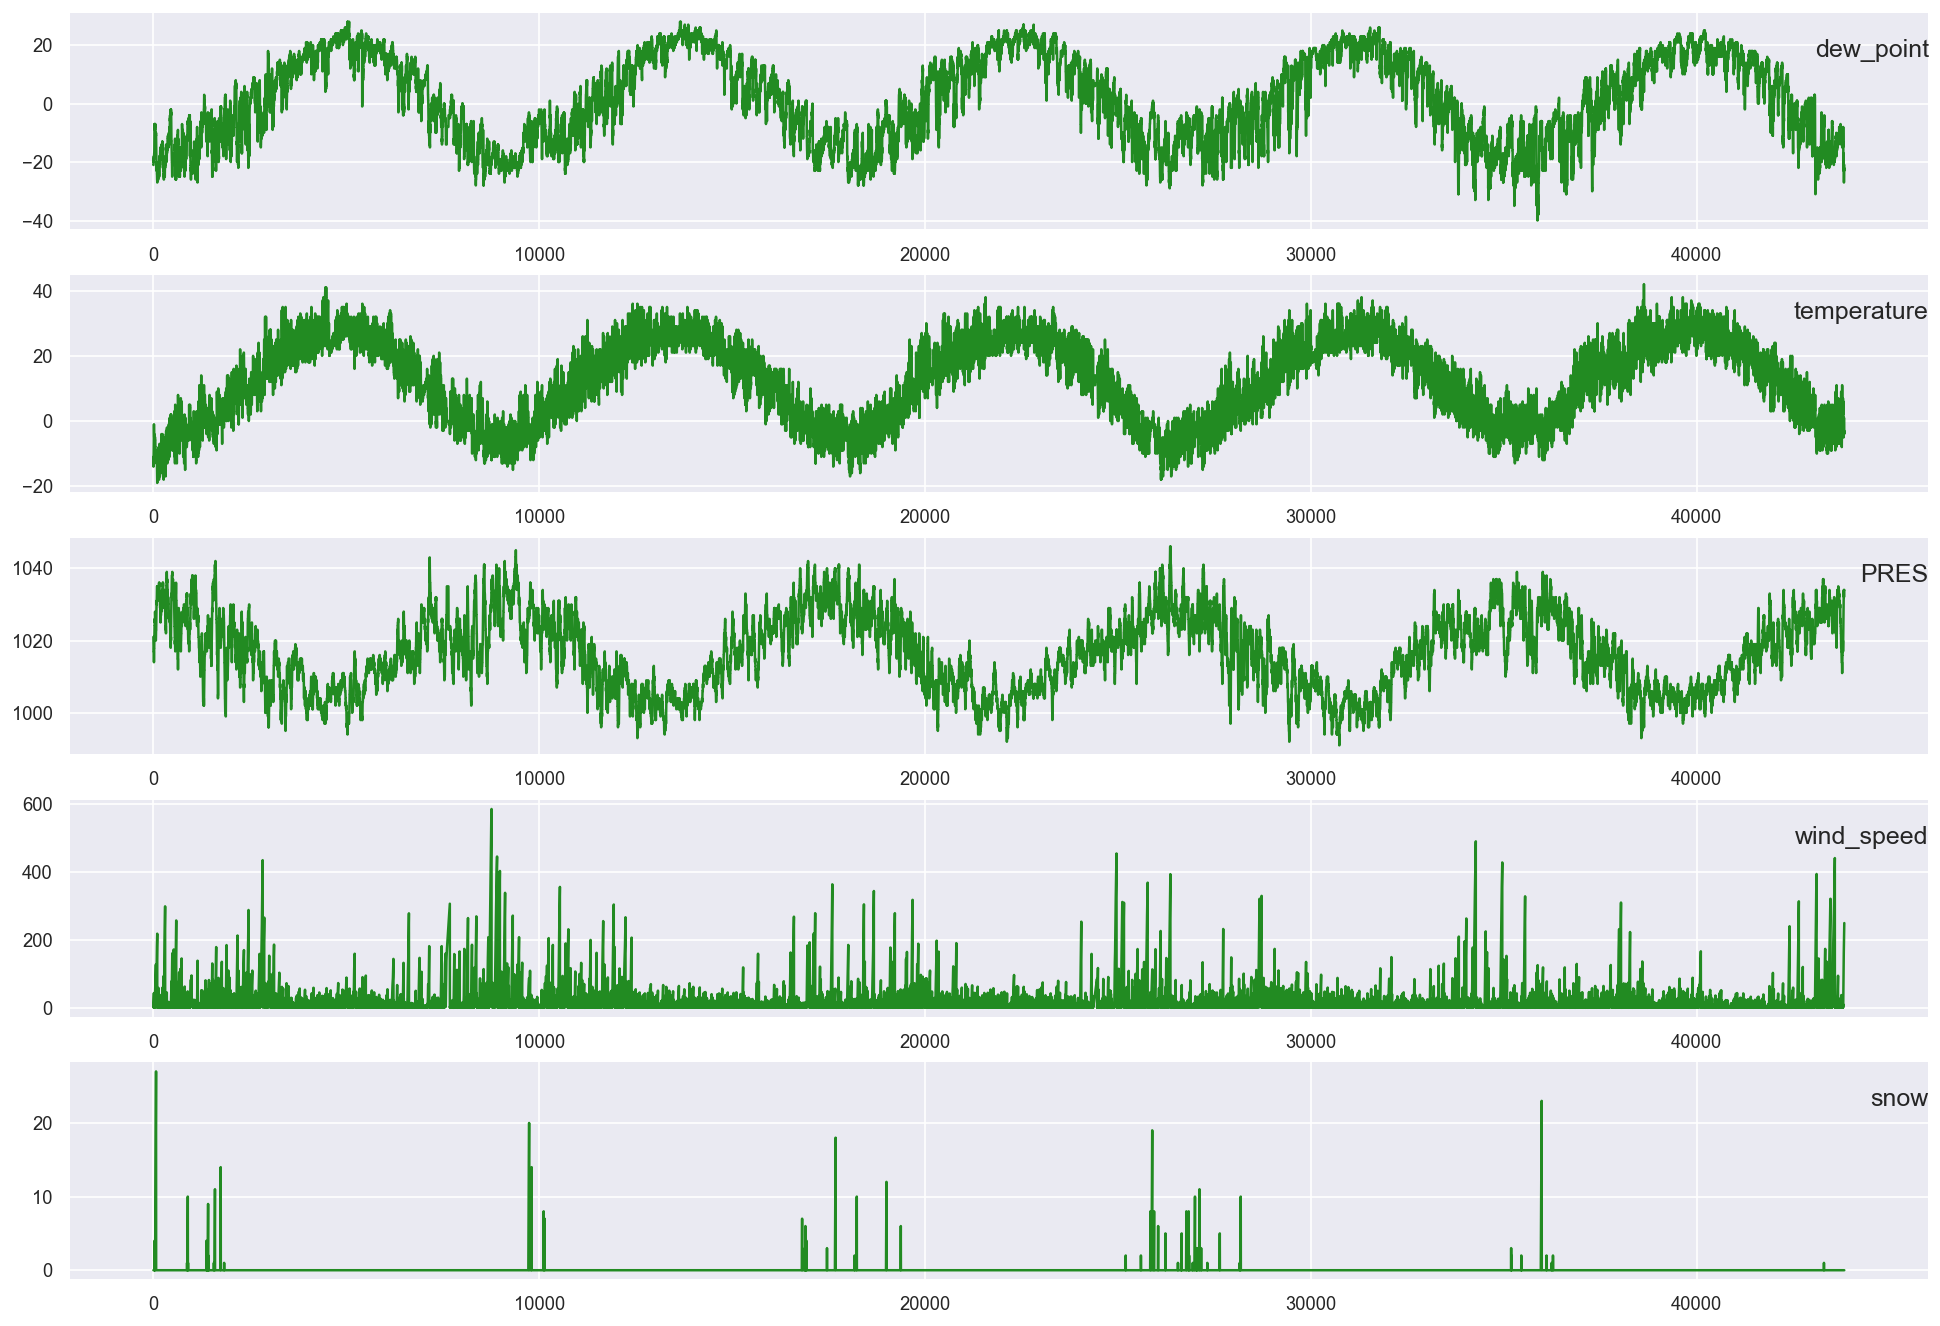

In [103]:
# Defining cyclicity in observing variables

values = df.values

# specify columns to plot
groups = [1, 2, 3, 5, 6]
i = 1

# plot each column
plt.figure(figsize=(20,14))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group], c = "forestgreen")
    plt.title(df.columns[group], y=0.75, loc='right', fontsize = 15)
    i += 1
plt.show()

This table shows that dew point, atmospheric temperature, atmospheric pressure have cyclicity. Meteorological features Weather parameters (dew point, atmospheric temperature, atmospheric pressure, wind direction, wind speed, snow, rain relative humidity) affect air quality.

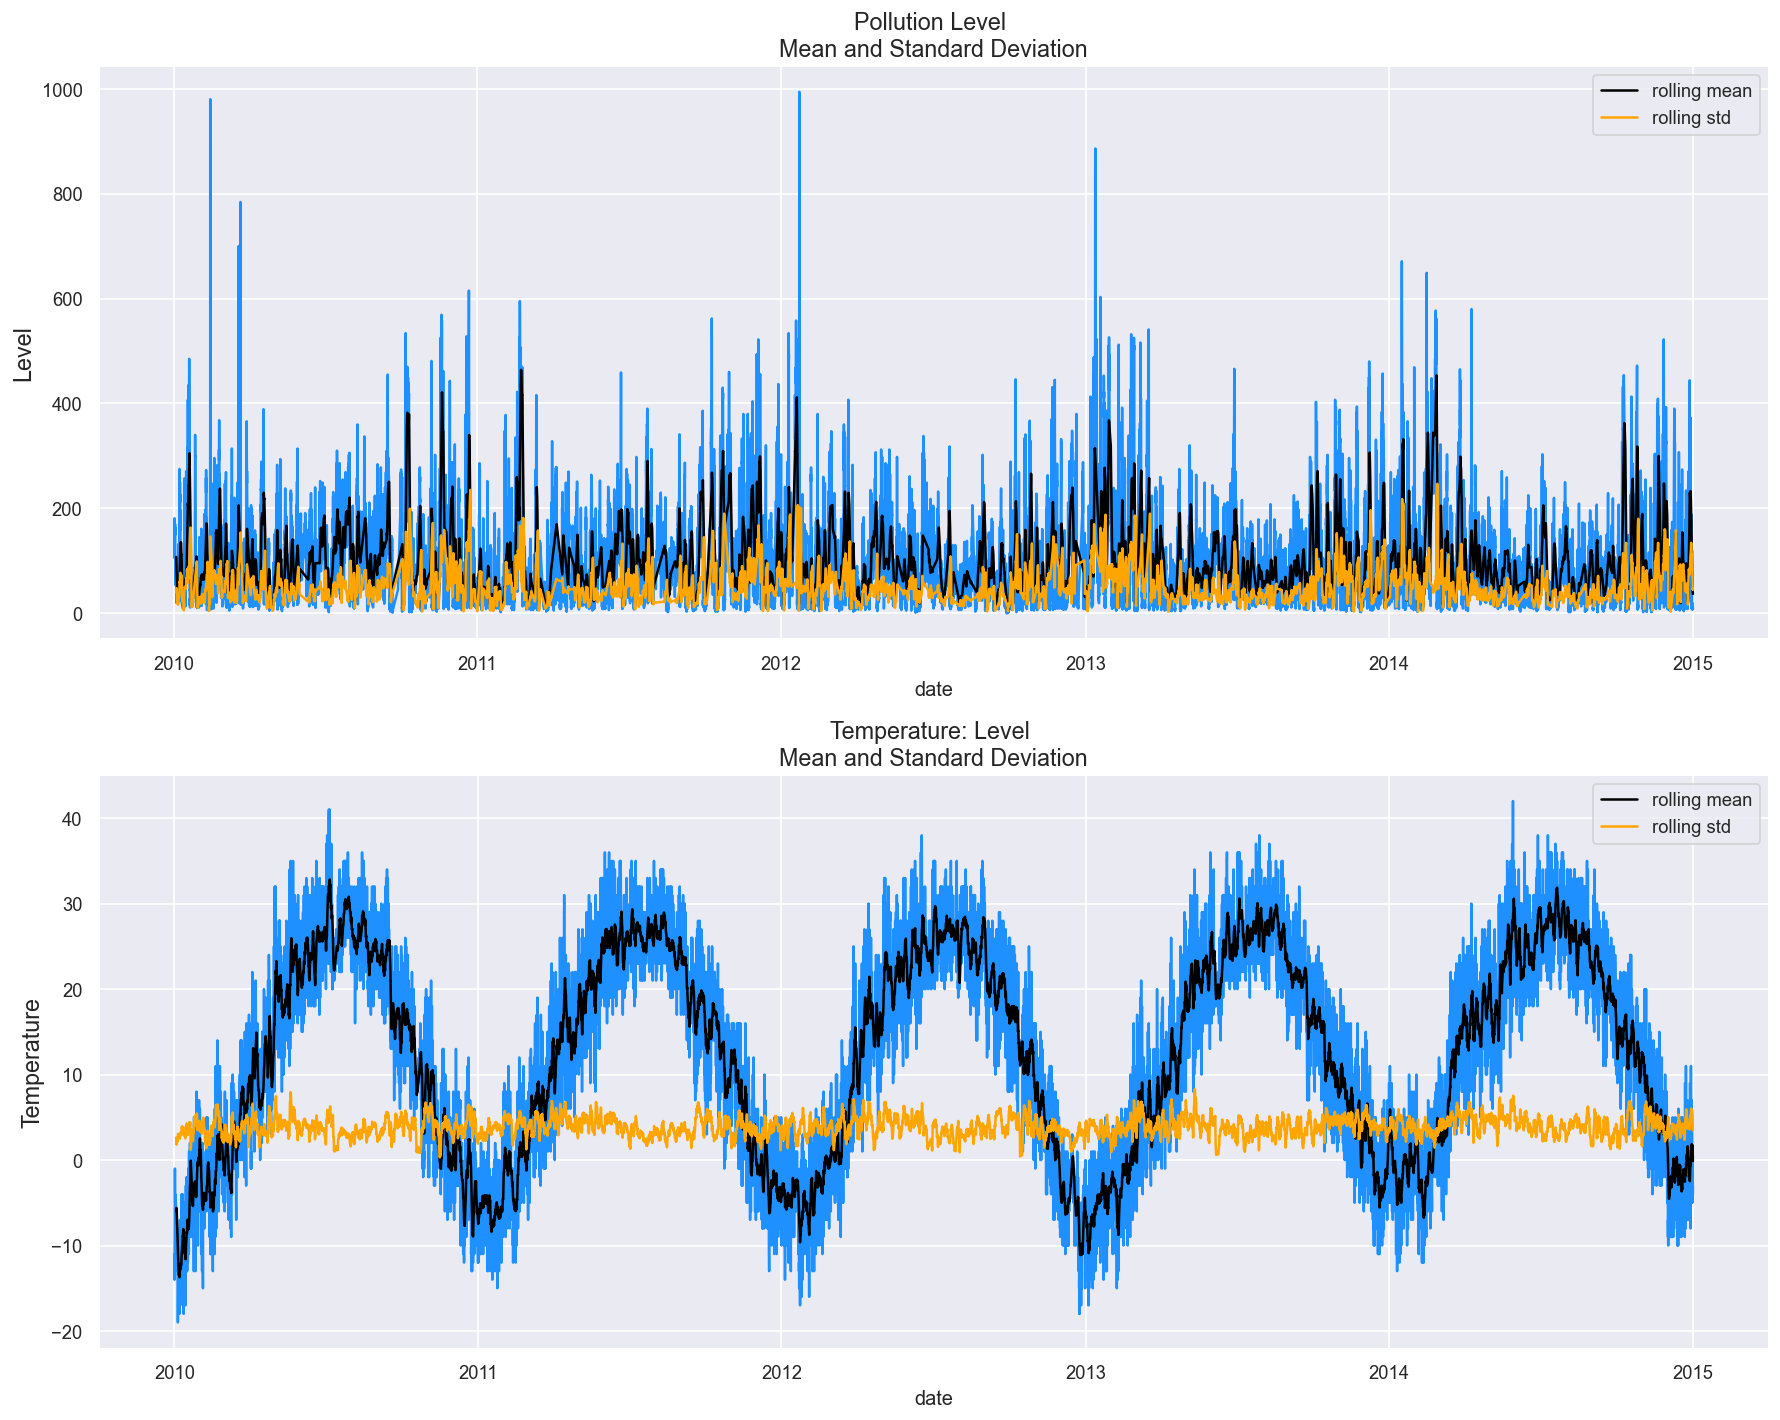

In [1369]:
# Defining Mean and STD fluctuation from 2010-2014 in Pollution and Temperature
# A year has 52 weeks (52 weeks * 7 days per week) aporx.

rolling_window = 52
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['date'], y=df['pollution'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=df['date'], y=df['pollution'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=df['date'], y=df['pollution'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_title('Pollution Level \nMean and Standard Deviation', fontsize=14)
ax[0].set_ylabel(ylabel='Level', fontsize=14)
ax[0].set_xlim()

sns.lineplot(x=df['date'], y=df['temperature'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=df['date'], y=df['temperature'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=df['date'], y=df['temperature'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_title('Temperature: Level \nMean and Standard Deviation', fontsize=14)
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)
ax[1].set_xlim()

plt.tight_layout()
plt.show()

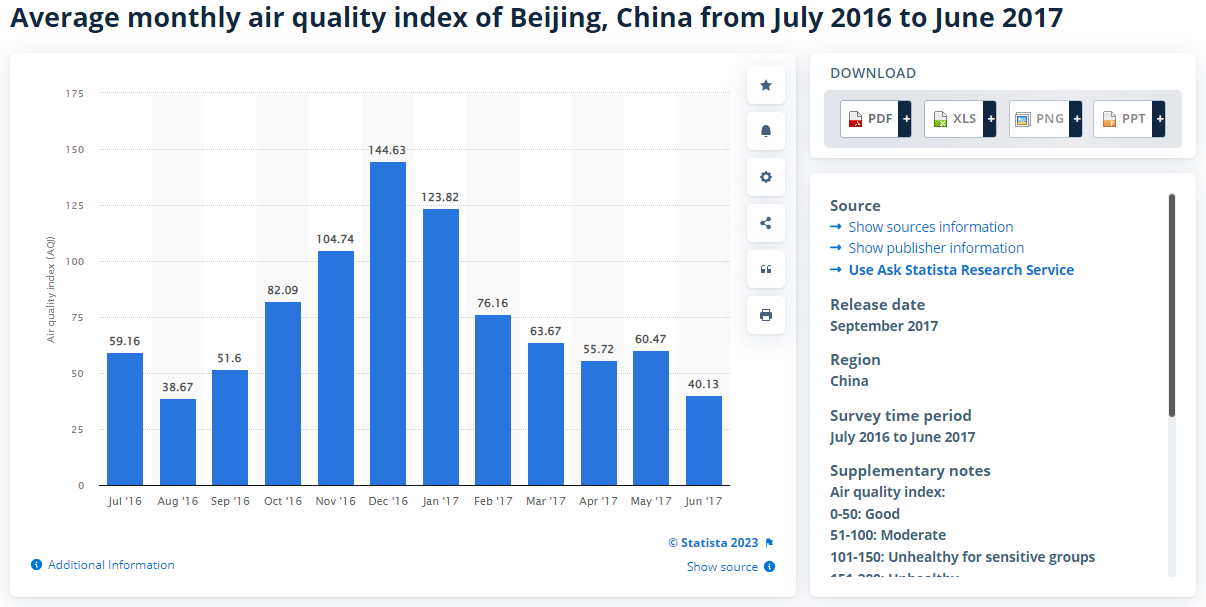

The pollution caused by PM2.5 has been worsening since 2008. The air quality was less than good for almost half the year in Beijing back in 2013, which has become the leading environmental concern for Chinese citizens. As of June 2017, the average monthly air quality index in Beijing stood at 40.13, which is within the “Good” range, making it one of the months with better air quality compared to the rest of the year.

Source: Statista https://www.statista.com/statistics/690823/china-annual-pm25-particle-levels-beijing/

Text(0.5, 1.0, 'Relationship between Pollution and Temperature \nControlled by wind speed')

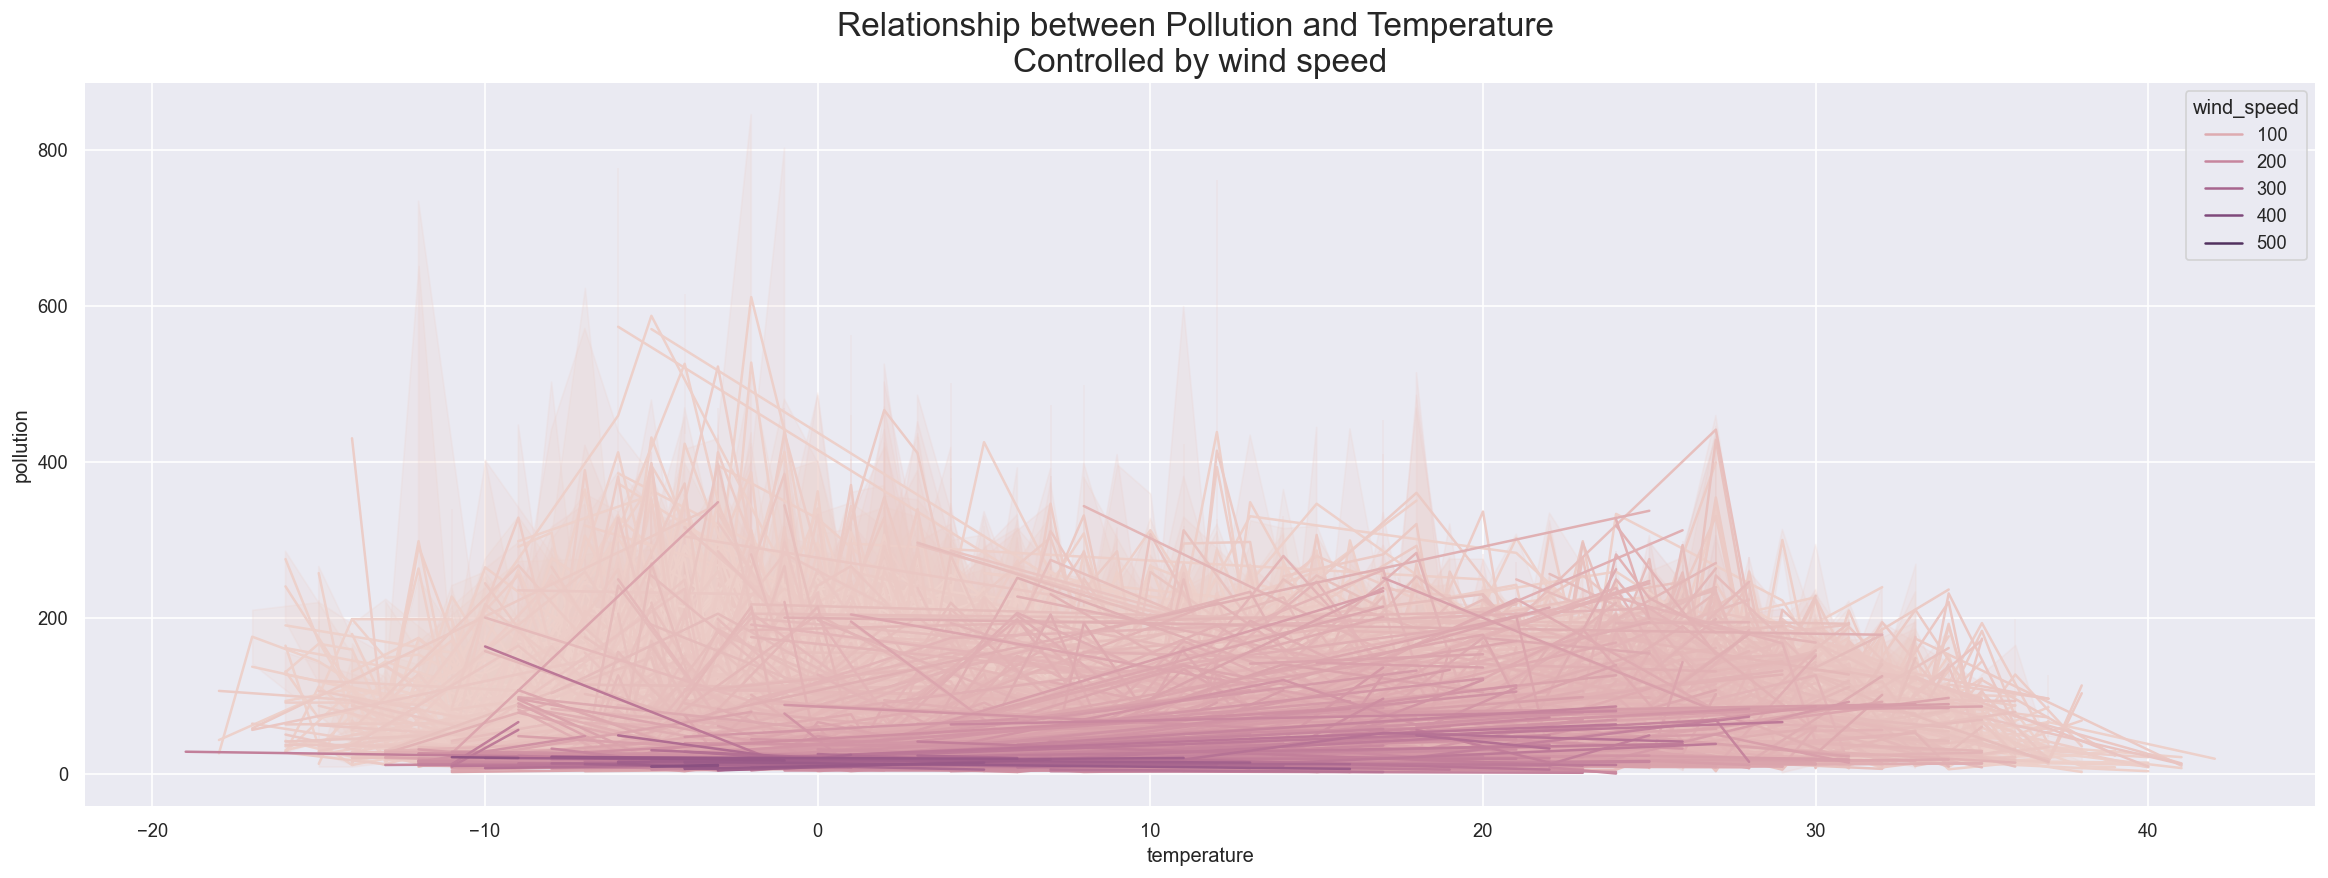

In [1378]:
# Defining a role of the wind speed to the pollution level controlling by the temperature

sns.set(rc={'figure.figsize':(24,8)})
ax=sns.lineplot(data=df,x='temperature',y='pollution',hue='wind_speed')
ax.axes.set_title('Relationship between Pollution and Temperature \nControlled by wind speed',fontsize=20)

This table shows that when wind speed is reaching 400-500 (m/s) the level of pollution in the city was low whereas when the wind speed was low below 100 (m/s) the level of pollution was high. In the meantime, the temperature did not predict pollution level based on this graph.

Text(0.5, 1.0, 'Relationship between Pollution and Temperature \nControlled by rain')

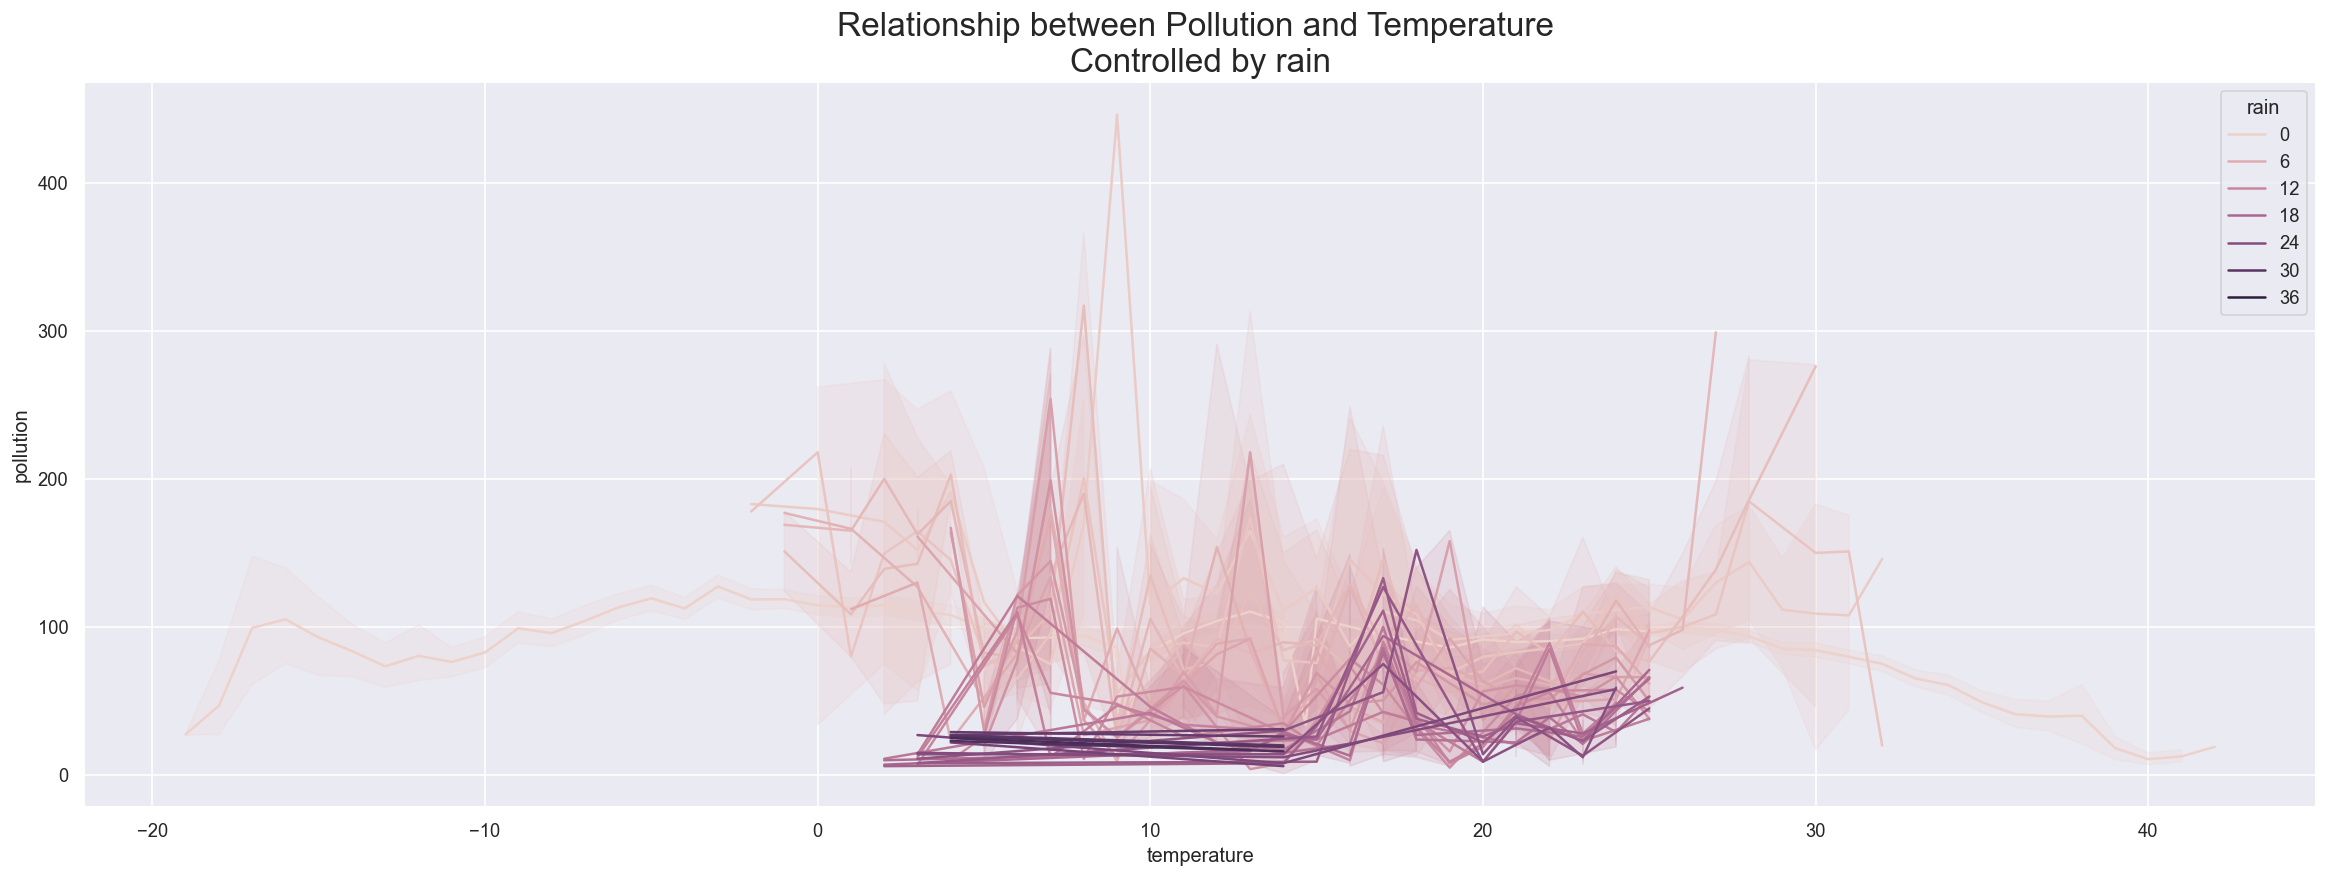

In [1379]:
# Defining a role of the rain to the pollution level controlling by the temperature

sns.set(rc={'figure.figsize':(24,8)})
ax=sns.lineplot(data=df,x='temperature',y='pollution',hue='rain')
ax.axes.set_title('Relationship between Pollution and Temperature \nControlled by rain',fontsize=20)

This table shows that when there was more than 30-36 hours of rain, the level of pollution in the city was low whereas when there was no rain the level of pollution was high. 

Text(0.5, 1.0, 'Relationship between Pollution and Temperature \nControlled by snow')

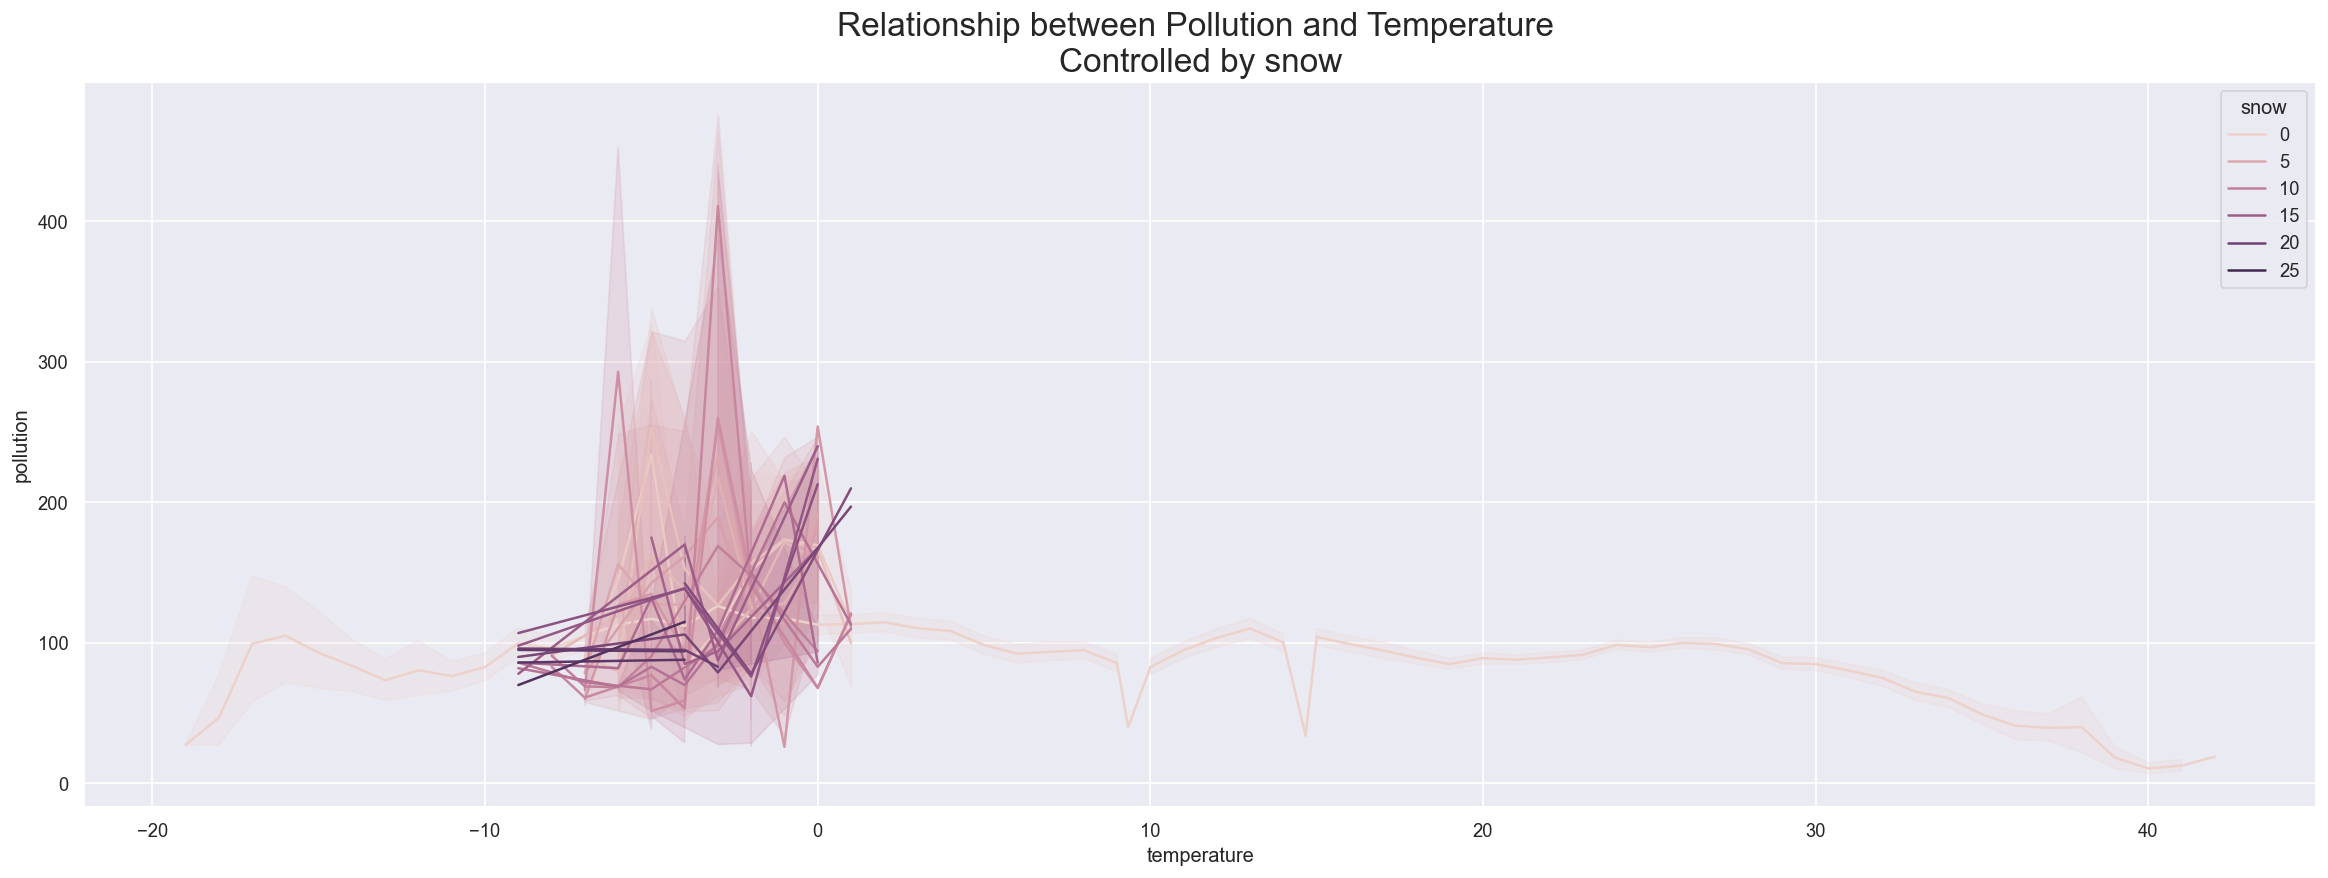

In [1380]:
# Defining a role of the snow to the pollution level controlling by the temperature

sns.set(rc={'figure.figsize':(24,8)})
ax=sns.lineplot(data=df,x='temperature',y='pollution',hue='snow')
ax.axes.set_title('Relationship between Pollution and Temperature \nControlled by snow',fontsize=20)

This table shows that even if there were more than 20-25 hours of snow, the level of pollution in the city was not as low as if it was raining around 100 PM 2.5 concentration (ug/m^3).

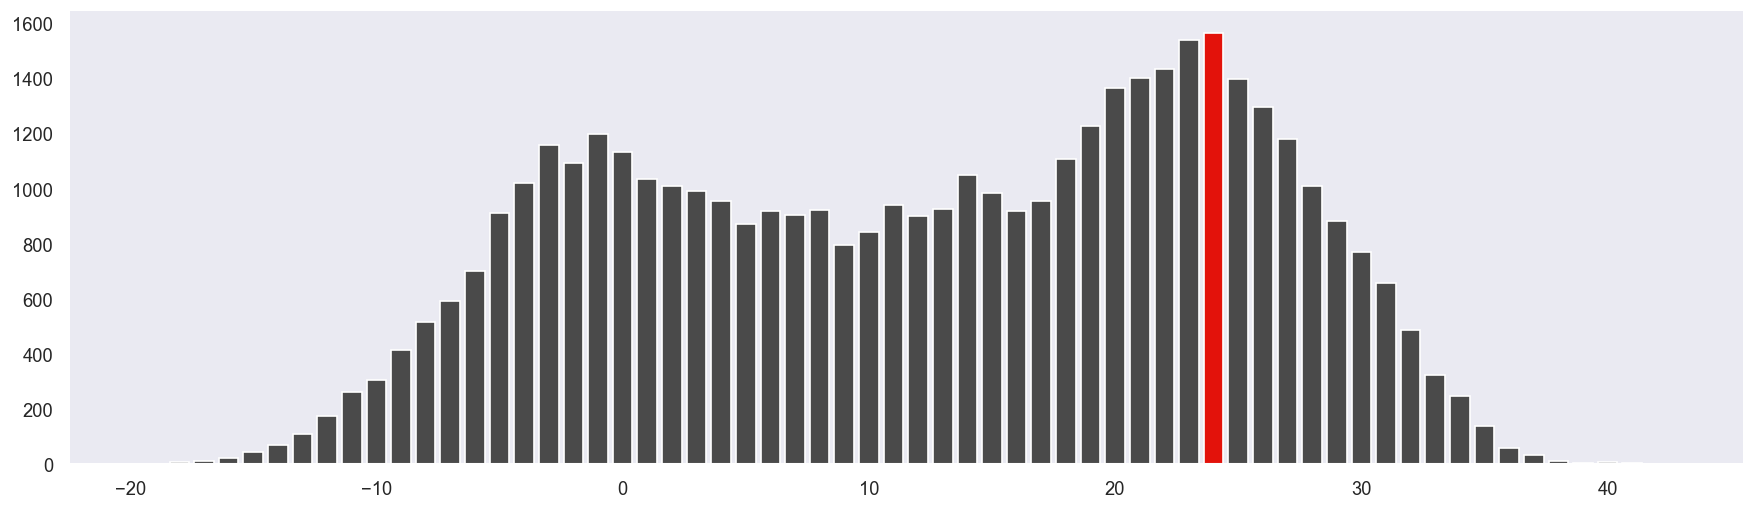

In [118]:
# Defining the highest temperature, tracked from 2010-2014

built = df['temperature'].value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
color = ['#4a4a4a' if val != max(built) else '#e3120b' for val in built]
ax.bar(built.index, built, color=color)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()

plt.show()

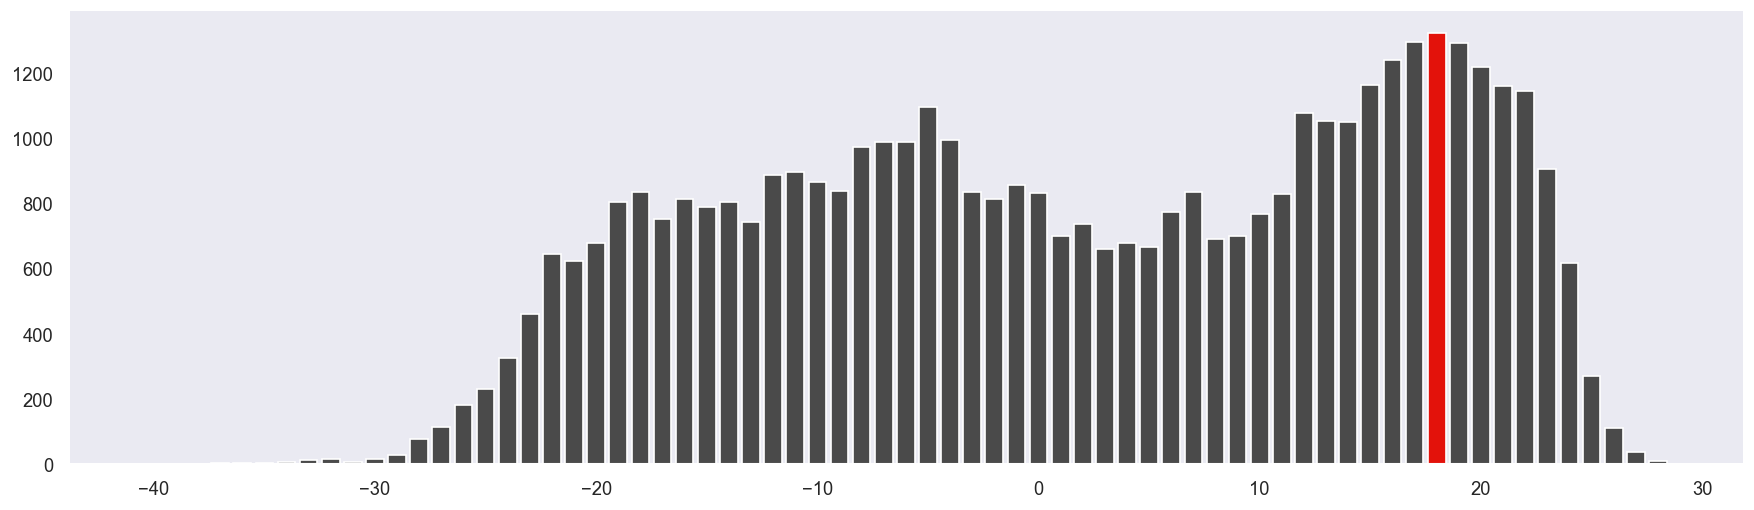

In [119]:
# Defining the highest dew point, tracked from 2010-2014

built = df['dew_point'].value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
color = ['#4a4a4a' if val != max(built) else '#e3120b' for val in built]
ax.bar(built.index, built, color=color)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()

plt.show()

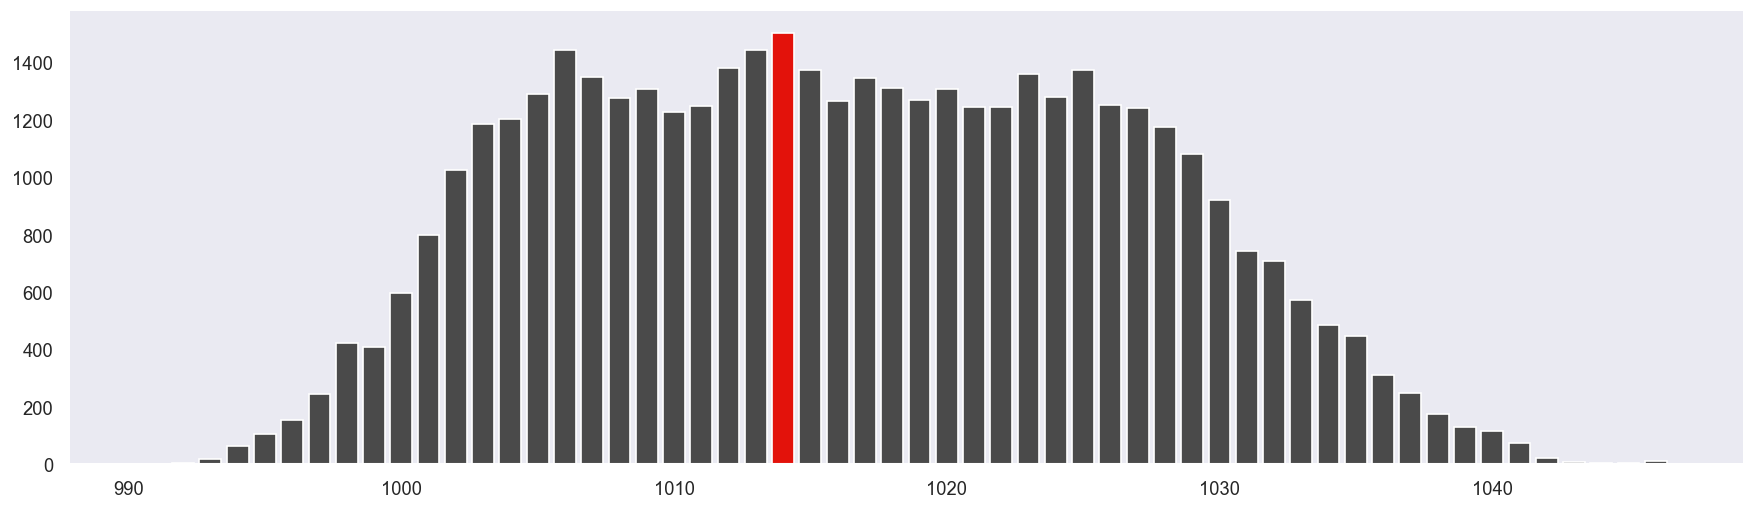

In [120]:
# Defining the highest atmospheric pressure, tracked from 2010-2014

built = df['PRES'].value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
color = ['#4a4a4a' if val != max(built) else '#e3120b' for val in built]
ax.bar(built.index, built, color=color)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()

plt.show()

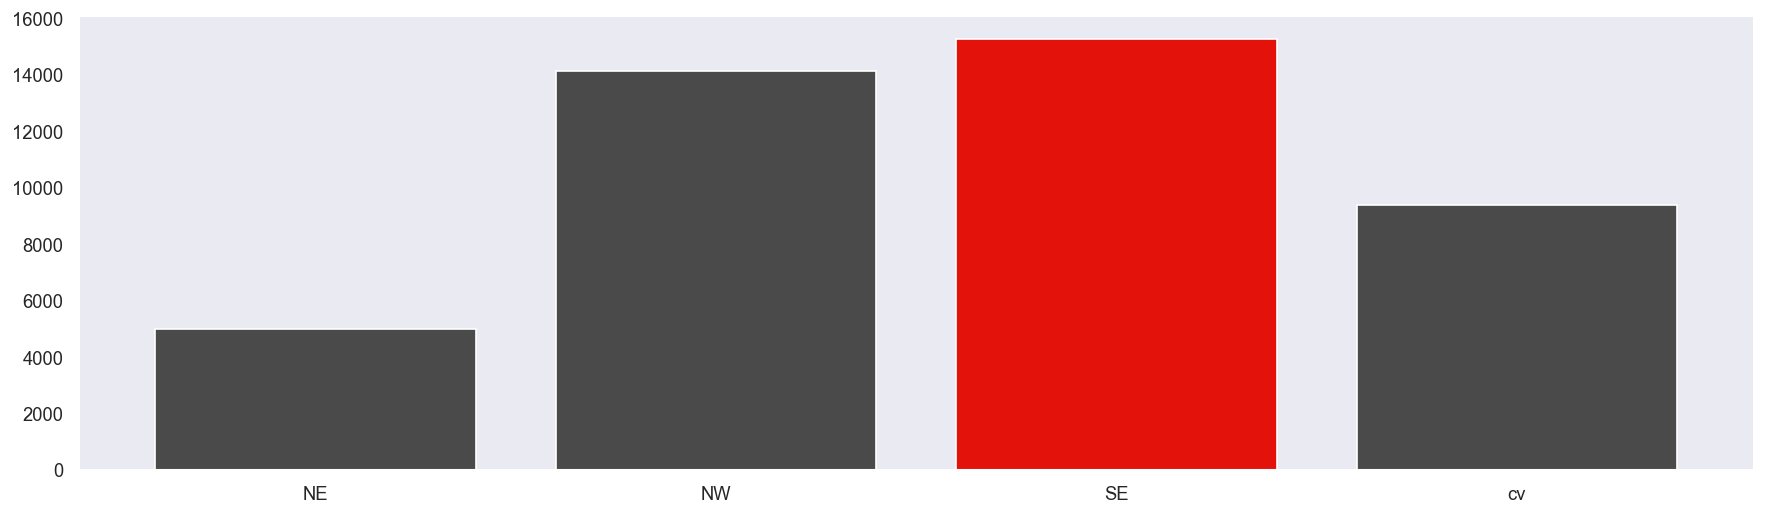

In [121]:
# Defining the most strong wind direction, tracked from 2010-2014

built = df['wind_direction'].value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
color = ['#4a4a4a' if val != max(built) else '#e3120b' for val in built]
ax.bar(built.index, built, color=color)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()

plt.show()

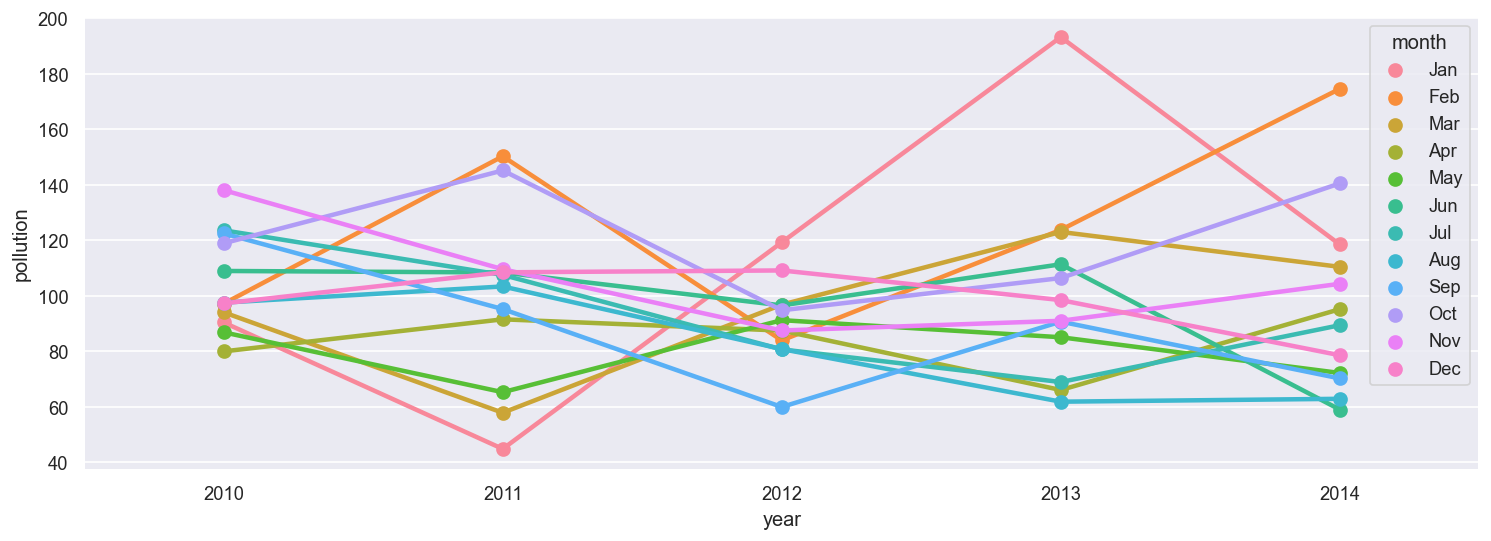

In [1381]:
# Defining the level of pollution grouped by years 

compounds = ["pollution"]
for i in compounds:
    temp_data = df.copy()
    temp_data.month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                                           'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
    df = temp_data[[i, 'month', 'year',]].groupby(["year",
                                                    "month"]).mean().reset_index().sort_values(by=['year',
                                                                                                   'month'], ascending=False)
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='year', y=i, data=df, hue='month', hue_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                                                  'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

The 2013 Eastern China smog was a severe air pollution episode that affected East China, including all or parts of the municipalities of Shanghai and Tianjin, and the provinces of Hebei, Shandong, Jiangsu, Anhui, Henan, and Zhejiang, during December 2013. A lack of cold air flow, combined with slow-moving air masses carrying industrial emissions, collected airborne pollutants to form a thick layer of smog over the region. Levels of PM2.5 particulate matter averaged over 150 micrograms per cubic metre; in some areas, they were 300 to 500 micrograms per cubic metre.

It was one of the worst bouts of air pollution in the area, cutting visibility and causing major disruption in transportation and daily activities. Airports, highways, and schools were closed.

In January 2013, China experienced massive fog and haze outbreak affecting about 600 million people and covering seventeen provinces, municipalities and autonomous regions, a fourth of China's territory. On 12 September 2013, the State Council announced the "Air Pollution Prevention Plan".China limited the fine particulate matter level, and the Chinese government officials' assessment index included improving the environment for the first time.

Source: Wikipedia https://en.wikipedia.org/wiki/2013_Eastern_China_smog

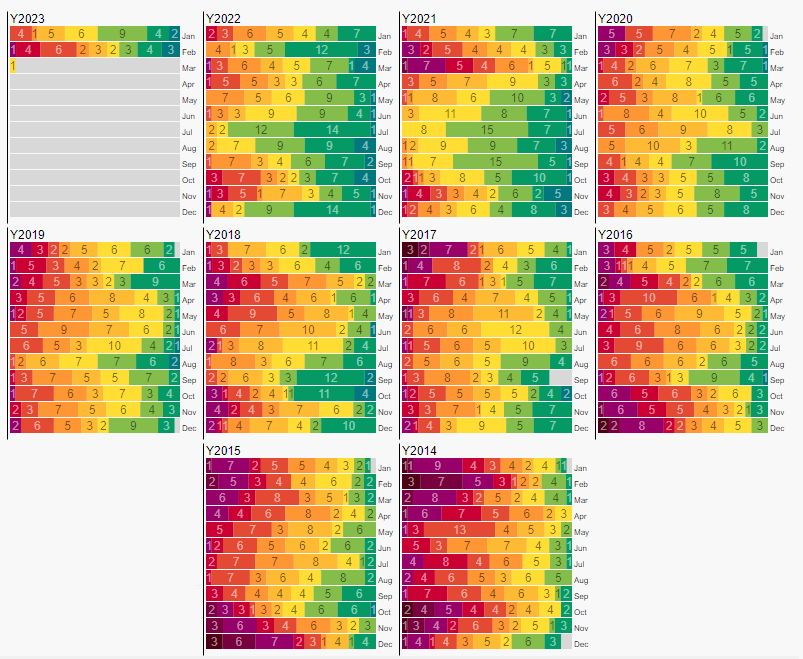

Picture source: aqicn https://aqicn.org/city/beijing/

Summer had the lowest PM10 concentration of 118 μg/m3 followed by autumn, winter, and spring, which was around 170 μg/m3. The reason for this may be that most rainfalls (data of rainfalls of Beijing is downloaded from China Meteorological Data Sharing Service System, http://cdc.nmic.cn) in Beijing occur in the summer as shown in Figure 4, and the rain washes away the particulate matter in the atmosphere and particulate matter is the major cause for the air pollution in Beijing. The monthly results further show that July and August have the least pollution, and April has the most pollution.

Source: Chen, Wei & Wang, Fusheng & Xiao, Guofeng & Wu, Kai & Zhang, Shixuan. (2015). Air Quality of Beijing and Impacts of the New Ambient Air Quality Standard. Atmosphere. 6. 1243-1258. 10.3390/atmos6081243. 

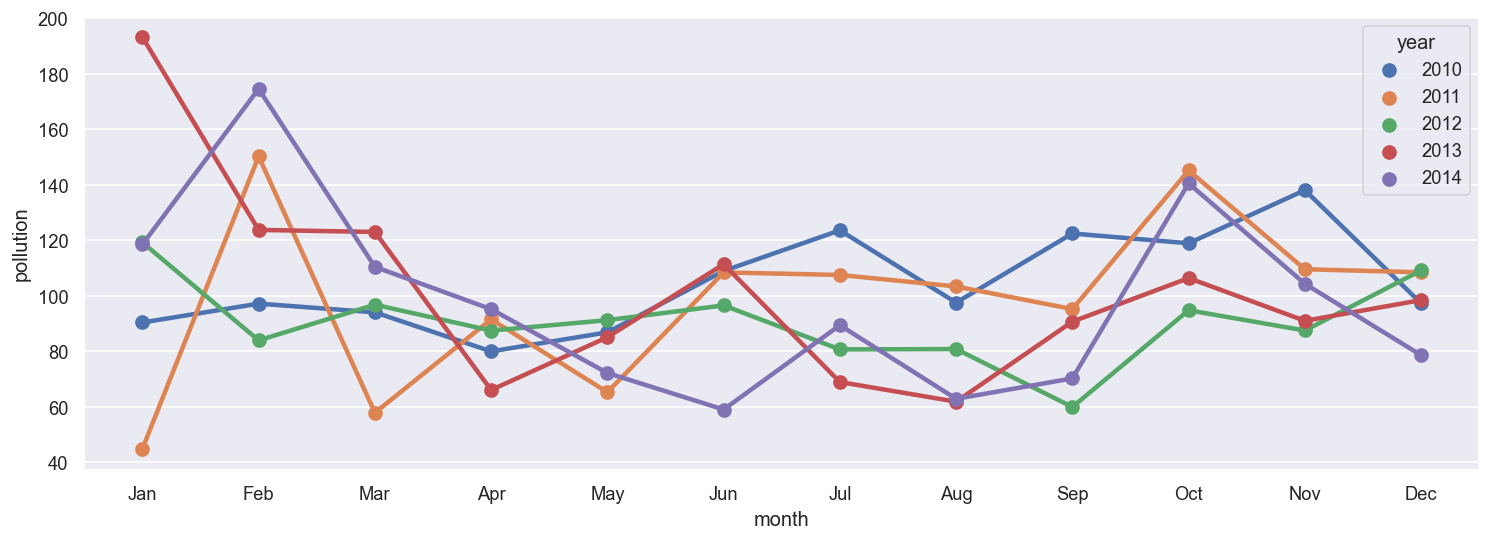

In [125]:
# Defining mean level of pollution grouped by months  

custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,
               'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}
for i in compounds:    
    temp_data = df.copy()
    temp_data.month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                                                               'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
    df = temp_data[[i, 'month', 'year']].groupby(["year",
                                                  "month"]).mean().reset_index().sort_values(by=['year', 
                                                                                                 'month'], ascending=True)
    df = df.iloc[df['month'].map(custom_dict).argsort()]
    f, ax=plt.subplots(figsize=(15, 5))
    sns.pointplot(x='month', y=i, data=df, hue="year")

According to data from the Ministry of Environmental Protection, from October to November 2018, Beijing's PM2.5 concentration dropped by more than 40% year-on-year, and the monthly data in November fell 54% year-on-year. In November last year, the proportion of days with good air in Beijing was 80%, and heavy pollution occurred for 1 day. In November 2016, the proportion of days with good air in Beijing was 43.3%, with heavy pollution for 6 days and severe pollution for 1 day.

Source: iqair https://www.iqair.com/china/beijing

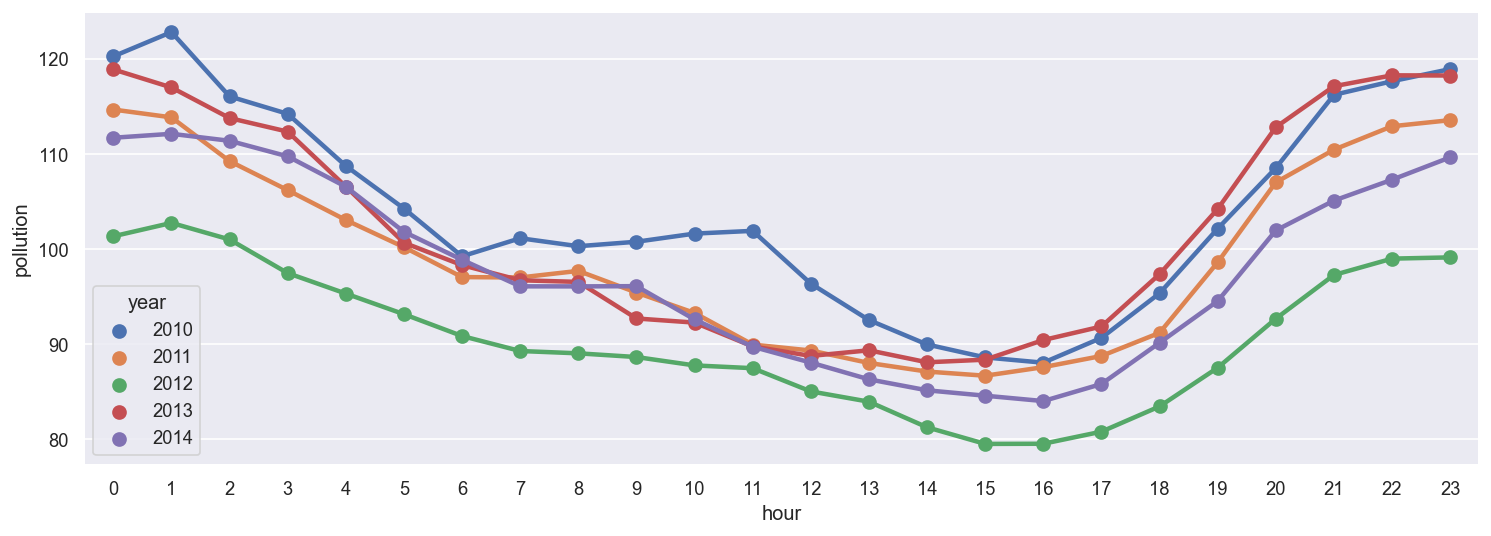

In [1419]:
# Defining mean level of pollution grouped by hours 

for i in compounds:   
    df = df[[i, 'hour', 'year']].groupby(["year",
                                                 "hour"]).mean().reset_index().sort_values(by=['year',
                                                                                                 'hour'], ascending=False)
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='hour', y=i, data=df, hue="year")
    plt.show()

<AxesSubplot:xlabel='hour', ylabel='pollution'>

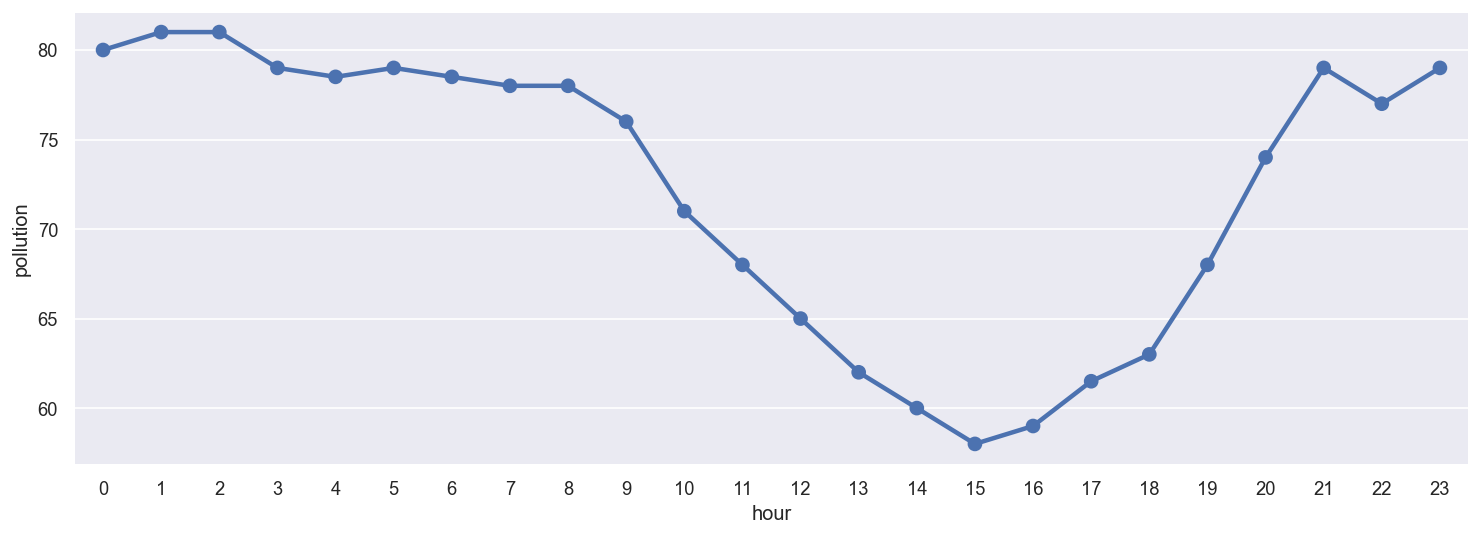

In [1484]:
# Defining median level of pollution grouped by hours

df = df[['pollution','hour']].groupby(["hour"]).median().reset_index().sort_values(by='hour',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='hour', y='pollution', data=df)

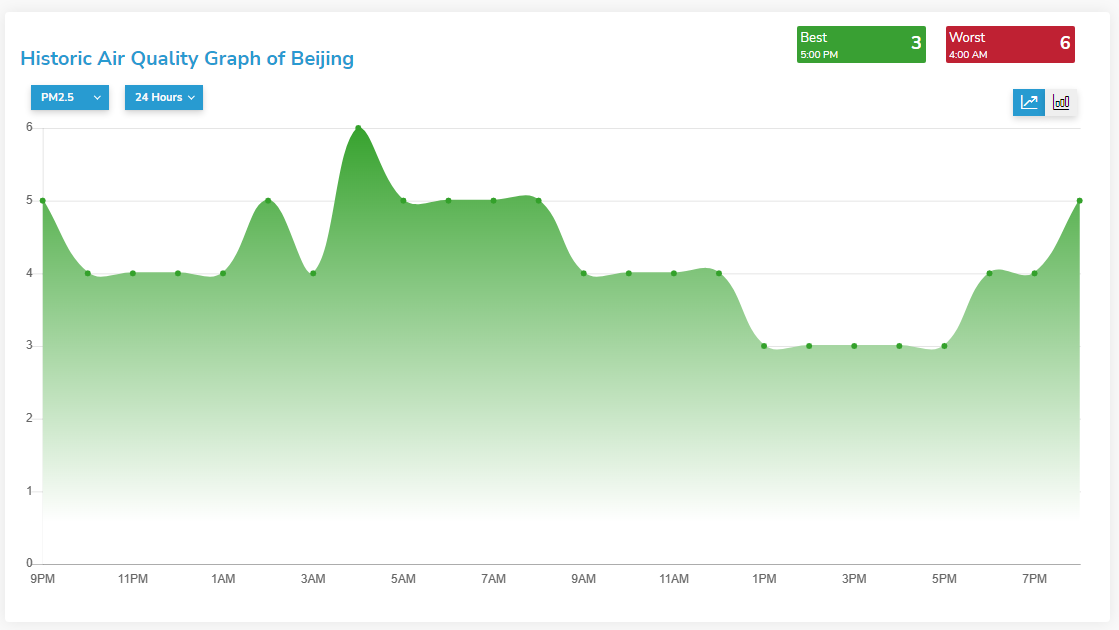

Source: Aqi https://www.aqi.in/dashboard/China/beijing/Beijing

Interestingly, in an analysis of 3,110 sites across the world, researchers concluded that particulate matter concentrations are higher in the morningand at nighttime. In particular, it peaks between 7:00 to 10:00 AM (LST) and 9:00 to 11:00 PM (LST). On the other hand, it’s lowest in the afternoon, particularly between 3:00 to 5:00 PM (LST).

Source: Breathesans https://breathesans.com/blogs/education/is-air-quality-better-in-the-morning#:~:text=Interestingly%2C%20in%20an%20analysis%20of,%3A00%20PM%20(LST).

<AxesSubplot:xlabel='quarter', ylabel='pollution'>

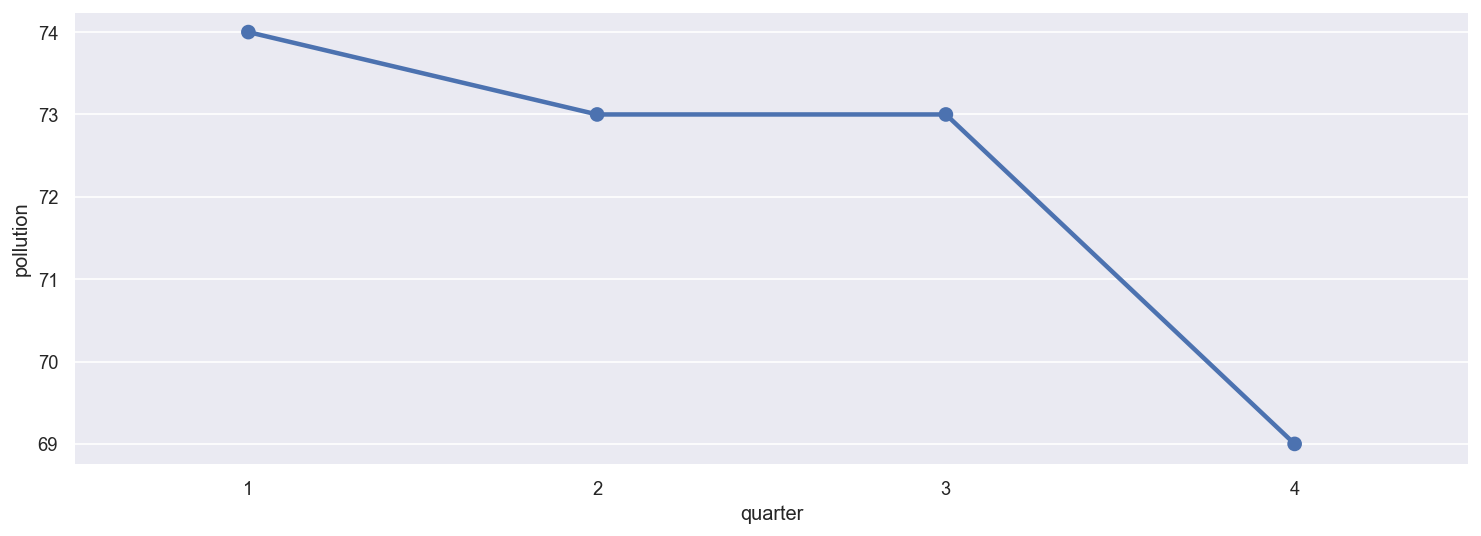

In [1436]:
# Defining median level of pollution grouped by quarters 

df = df[['pollution','quarter']].groupby(["quarter"]).median().reset_index().sort_values(by='quarter',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='quarter', y='pollution', data=df)

This table shows that the most polluted quarter from 2010 to 2014 was Q1 due to the cold weather and the massive use of coal during the winter time. Beijing air pollution is mainly caused by vehicle emissions and the burning of coal to produce electricity.

<AxesSubplot:xlabel='month', ylabel='pollution'>

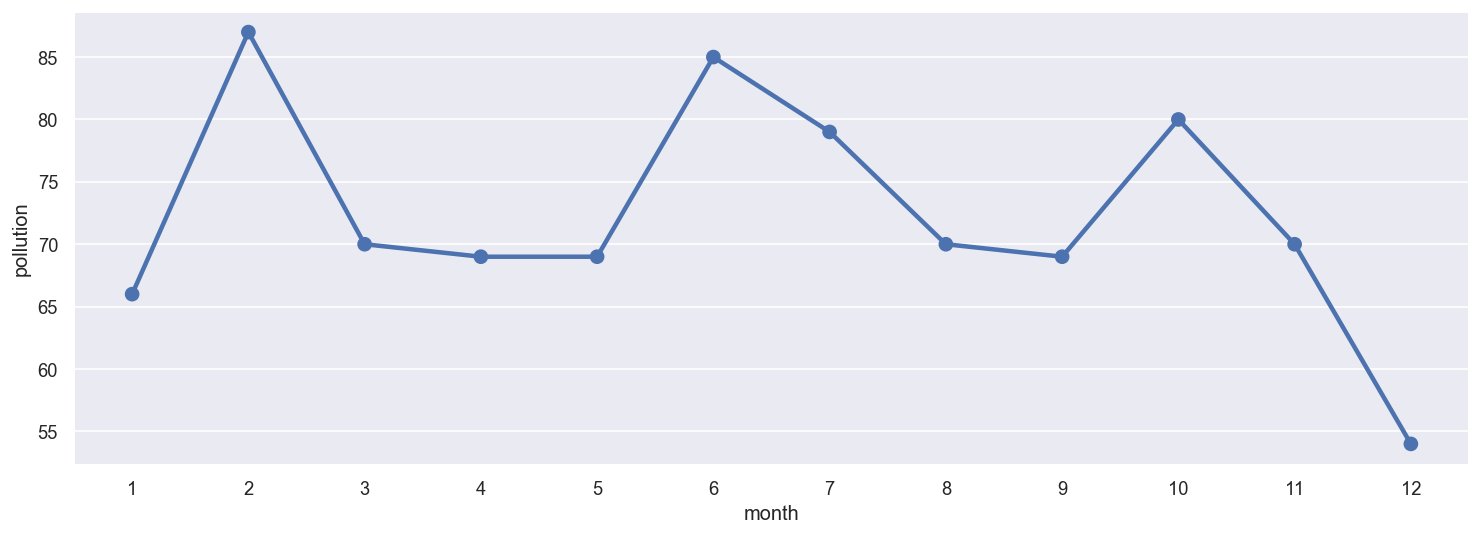

In [1453]:
# Defining median level of pollution grouped by months 

df = df[['pollution','month']].groupby(["month"]).median().reset_index().sort_values(by='month',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='month', y='pollution', data=df)

This graph shows that during the year February, June and October were the months with the highest level of pollution based on the median from 2010 to 2014. In October the wind speeds are slow during this time and thus the polluted air stays in the capital for the longest time. Air quality decreases during the summer because the heat and sunlight cook the air along with all the chemical compounds that are present. Finally, air pollution is worse in the winter because colder and drier air traps more pollution.

<AxesSubplot:xlabel='week_of_year', ylabel='pollution'>

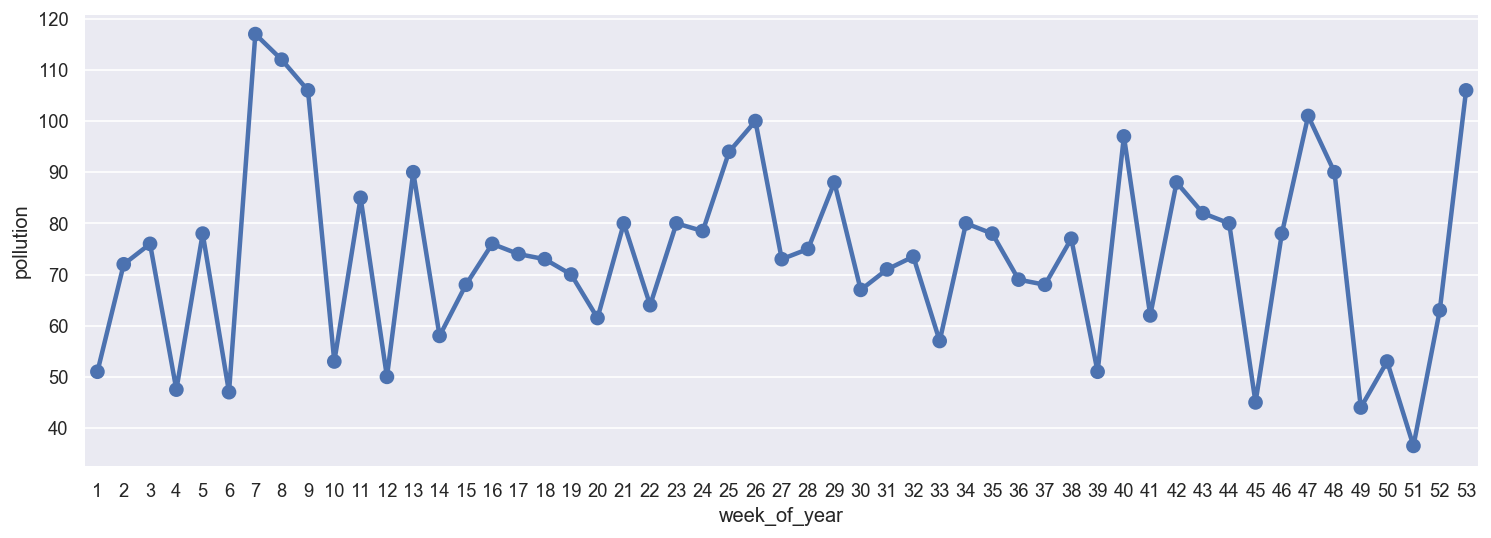

In [417]:
# Defining median level of pollution grouped by 54 weeks

df = df[['pollution','week_of_year']].groupby(["week_of_year"]).median().reset_index().sort_values(by='week_of_year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='week_of_year', y='pollution', data=df)

47 week is October when the wind speeds are slow during this time and thus the polluted air stays in the capital for the longest time. The 7th week is February when pollution is worse in the winter because colder and drier air traps more pollution. 

<AxesSubplot:xlabel='day', ylabel='pollution'>

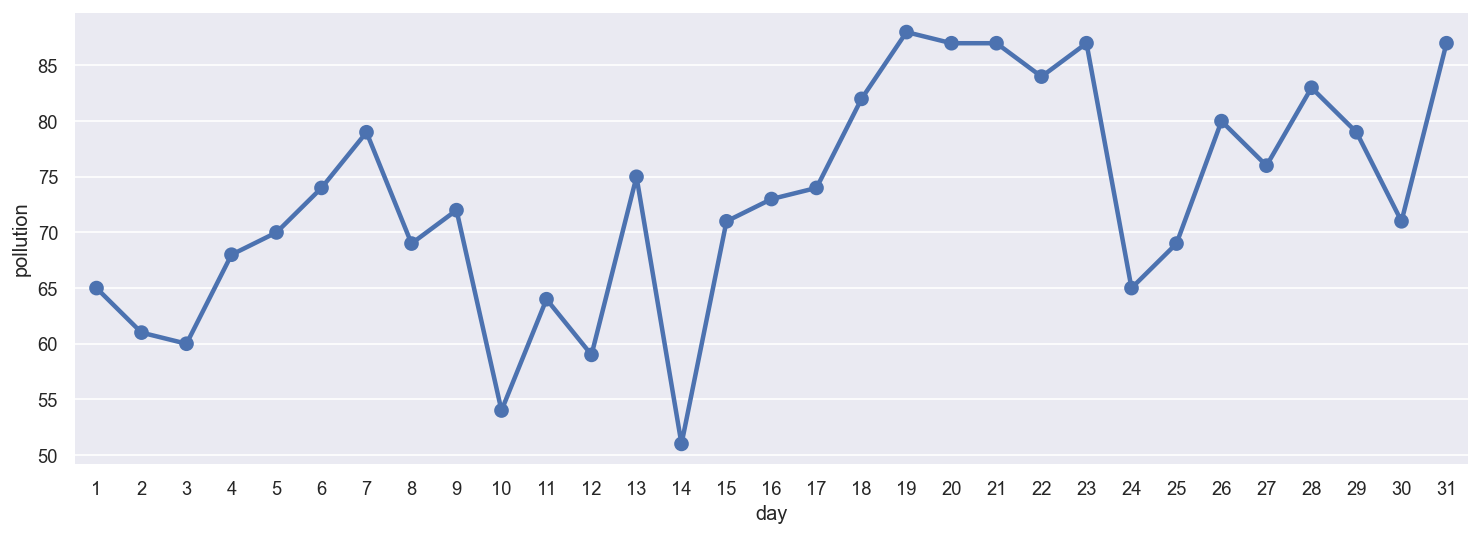

In [1469]:
# Defining median level of pollution grouped by 31 days

df = df[['pollution','day']].groupby(["day"]).median().reset_index().sort_values(by='day',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='day', y='pollution', data=df)

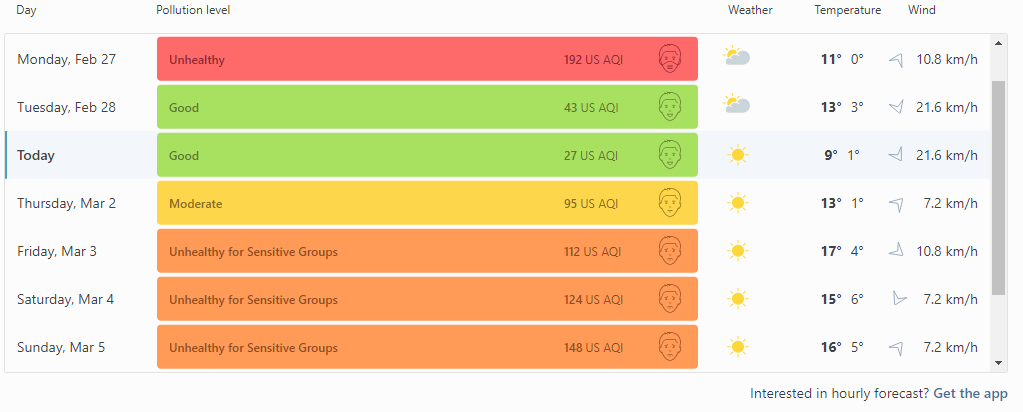

From Monday to Friday, automobiles with end numbers 1 or 6, 2 or 7, 3 or 8, 4 or 9, 5 or 0 respectively would cease going on public road space. There is a time-frame to accompany these rules which are the hours between 07:00 to 20:00 as being the prohibited times. These exclusions would last for about 3 months before changing to allow different vehicles into the city on different days.

Source: iqair https://www.iqair.com/china/beijing

## 3. Data Engeneering

In [339]:
#  Building plot original and imputed data on top of each other to see the difference in distributions.

def compare_dists(original_dist, imputed_dists: dict):

    fig, ax = plt.subplots(figsize=(12, 7), dpi=140)
    # Plot the original
    sns.kdeplot(
        original_dist, linewidth=5, ax=ax, color="black", label="Original dist."
    )
    for key, value in imputed_dists.items():
        sns.kdeplot(value, linewidth=3, label=key, ax=ax)

    plt.legend()
    plt.show();

In [340]:
# Building funtion with "mean", "median", "most_frequent"

for method in ["mean", "median", "most_frequent"]:
    df[method] = SimpleImputer(strategy=method).fit_transform(
        df["pollution"].values.reshape(-1, 1)
    )

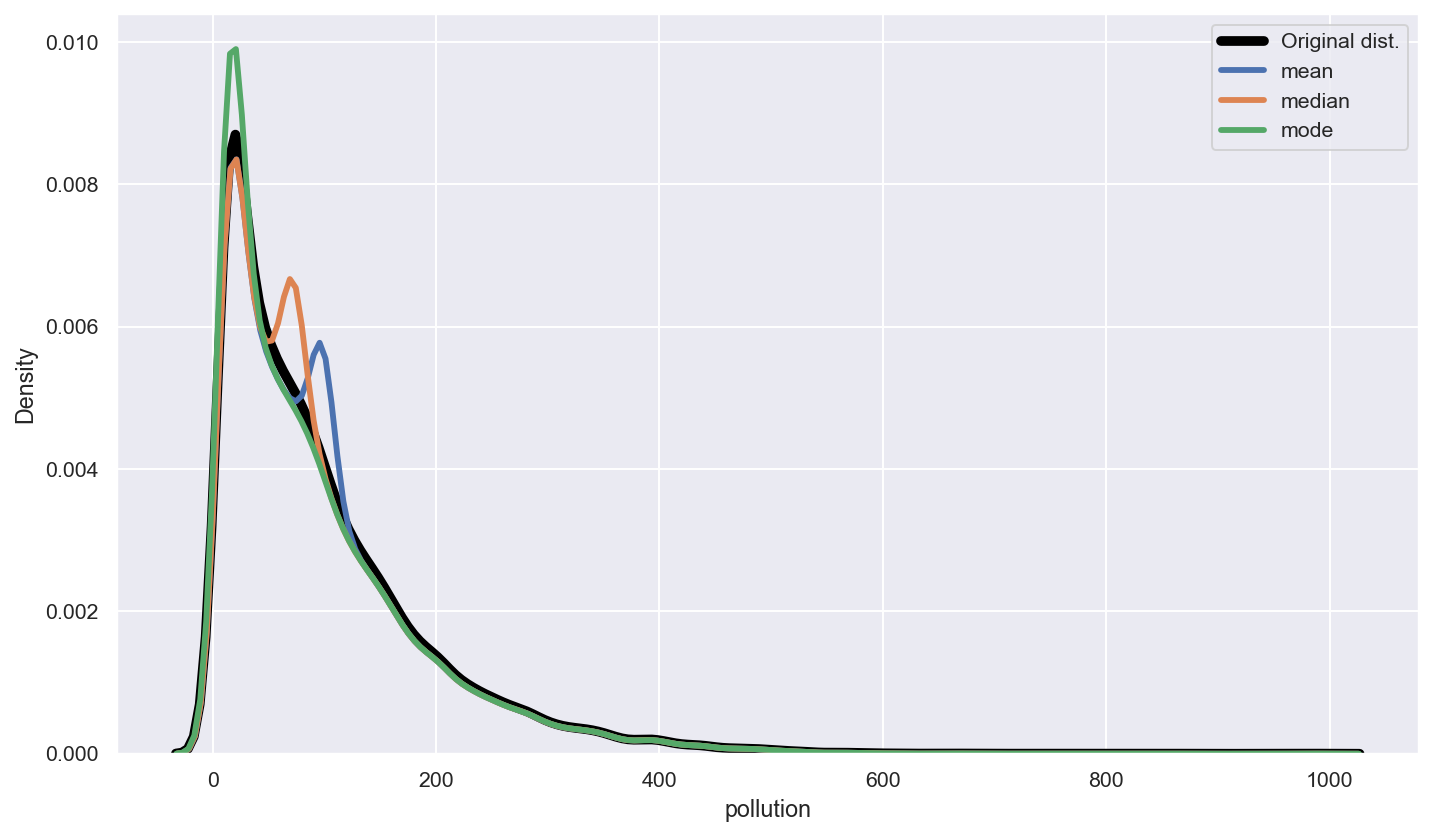

In [341]:
# Comparing imputation results 

compare_dists(
    df["pollution"],
    {"mean": df["mean"], "median": df["median"], "mode": df["most_frequent"]},
)

Pollution is the only one variable with missing data 0.047166 (mean) that contains 582 labels. Based on the results, the median imputation method is the most accurate method.

In [279]:
# Redefining dataset from the csv file

df = pd.read_csv('../AI/All Data Files/pollution.csv')

In [280]:
# Handling with data columns & renaming other columns from the dataset

df.index = pd.to_datetime(df[['year', 'month', 'day', 'hour']], format = '%Y %m %d %H')
df = df.drop(columns=['No', 'year', 'month', 'day', 'hour'])
df = df.rename(columns={
    'pm2.5': 'pollution',
    'DEWP': 'dew_point',
    'TEMP': 'temperature',
    'PRESS': 'pressure',
    'cbwd': 'wind_direction',
    'Iws': 'wind_speed',
    'Is': 'snow',
    'Ir': 'rain'
})

df = df.drop(columns=['dew_point', 'PRES'])

In [281]:
# Imputation of the pollution feature from the dataset with the median imputation method

df['pollution'].fillna(df['pollution'].median(), inplace=True)

In [282]:
# Encoding the "wind direction" feature with dummies

df = pd.get_dummies(df, columns=['wind_direction'])

In [283]:
# Scaling dataset with MinMaxScaler 

scaler = MinMaxScaler(feature_range=(0, 1))
values = scaler.fit_transform(df)

In [284]:
# Checking new dataset after the imputation, encoding and scaling 

data = pd.DataFrame(values)

data.columns = df.columns
data.index = df.index

data.head(10)

pollution  temperature  wind_speed  snow  rain  \
2010-01-01 00:00:00   0.072435     0.131148    0.002290   0.0   0.0   
2010-01-01 01:00:00   0.072435     0.114754    0.007639   0.0   0.0   
2010-01-01 02:00:00   0.072435     0.131148    0.010698   0.0   0.0   
2010-01-01 03:00:00   0.072435     0.081967    0.016047   0.0   0.0   
2010-01-01 04:00:00   0.072435     0.114754    0.021396   0.0   0.0   
2010-01-01 05:00:00   0.072435     0.147541    0.026745   0.0   0.0   
2010-01-01 06:00:00   0.072435     0.163934    0.032094   0.0   0.0   
2010-01-01 07:00:00   0.072435     0.163934    0.035153   0.0   0.0   
2010-01-01 08:00:00   0.072435     0.163934    0.040502   0.0   0.0   
2010-01-01 09:00:00   0.072435     0.180328    0.045851   0.0   0.0   

                     wind_direction_NE  wind_direction_NW  wind_direction_SE  \
2010-01-01 00:00:00                0.0                1.0                0.0   
2010-01-01 01:00:00                0.0                1.0                0.0   
2010-01-01 02:00:00                0.0                1.0                0.0   
2010-01-01 03:00:00                0.0                1.0                0.0   
2010-01-01 04:00:00                0.0                1.0                0.0   
2010-01-01 05:00:00                0.0                1.0                0.0   
2010-01-01 06:00:00                0.0                1.0                0.0   
2010-01-01 07:00:00                0.0                1.0                0.0   
2010-01-01 08:00:00                0.0                1.0                0.0   
2010-01-01 09:00:00                0.0                1.0                0.0   

                     wind_direction_cv  
2010-01-01 00:00:00                0.0  
2010-01-01 01:00:00                0.0  
2010-01-01 02:00:00                0.0  
2010-01-01 03:00:00                0.0  
2010-01-01 04:00:00                0.0  
2010-01-01 05:00:00                0.0  
2010-01-01 06:00:00                0.0  
2010-01-01 07:00:00                0.0  
2010-01-01 08:00:00                0.0  
2010-01-01 09:00:00                0.0

In [285]:
# determining target

data['predicted_pollution'] = data['pollution'].shift(-1) #shift move polution row - 1 up 1 down

In [286]:
data

pollution  temperature  wind_speed  snow  rain  \
2010-01-01 00:00:00   0.072435     0.131148    0.002290   0.0   0.0   
2010-01-01 01:00:00   0.072435     0.114754    0.007639   0.0   0.0   
2010-01-01 02:00:00   0.072435     0.131148    0.010698   0.0   0.0   
2010-01-01 03:00:00   0.072435     0.081967    0.016047   0.0   0.0   
2010-01-01 04:00:00   0.072435     0.114754    0.021396   0.0   0.0   
...                        ...          ...         ...   ...   ...   
2014-12-31 19:00:00   0.008048     0.278689    0.395659   0.0   0.0   
2014-12-31 20:00:00   0.010060     0.262295    0.405588   0.0   0.0   
2014-12-31 21:00:00   0.010060     0.262295    0.413996   0.0   0.0   
2014-12-31 22:00:00   0.008048     0.245902    0.420866   0.0   0.0   
2014-12-31 23:00:00   0.012072     0.262295    0.426216   0.0   0.0   

                     wind_direction_NE  wind_direction_NW  wind_direction_SE  \
2010-01-01 00:00:00                0.0                1.0                0.0   
2010-01-01 01:00:00                0.0                1.0                0.0   
2010-01-01 02:00:00                0.0                1.0                0.0   
2010-01-01 03:00:00                0.0                1.0                0.0   
2010-01-01 04:00:00                0.0                1.0                0.0   
...                                ...                ...                ...   
2014-12-31 19:00:00                0.0                1.0                0.0   
2014-12-31 20:00:00                0.0                1.0                0.0   
2014-12-31 21:00:00                0.0                1.0                0.0   
2014-12-31 22:00:00                0.0                1.0                0.0   
2014-12-31 23:00:00                0.0                1.0                0.0   

                     wind_direction_cv  predicted_pollution  
2010-01-01 00:00:00                0.0             0.072435  
2010-01-01 01:00:00                0.0             0.072435  
2010-01-01 02:00:00                0.0             0.072435  
2010-01-01 03:00:00                0.0             0.072435  
2010-01-01 04:00:00                0.0             0.072435  
...                                ...                  ...  
2014-12-31 19:00:00                0.0             0.010060  
2014-12-31 20:00:00                0.0             0.010060  
2014-12-31 21:00:00                0.0             0.008048  
2014-12-31 22:00:00                0.0             0.012072  
2014-12-31 23:00:00                0.0                  NaN  

[43824 rows x 10 columns]

In [287]:
# Delete the last sample since we move up elements in predicted pollution where we have one Nan. 
# Since we will use the LSTM neural network, we must sort the data according to the time. 
# The dataset is transformed into a supervised learning problem. 
# The weather variables for the hour to be predicted (t) are then removed. 
# We have features for previous timestep (t-1) and for prediction of pollution PM2.5 taking its current timestep (t) data.

In [288]:
# Dropping the NaN sample

data = data.drop(data.tail(1).index)

In [289]:
data

pollution  temperature  wind_speed  snow  rain  \
2010-01-01 00:00:00   0.072435     0.131148    0.002290   0.0   0.0   
2010-01-01 01:00:00   0.072435     0.114754    0.007639   0.0   0.0   
2010-01-01 02:00:00   0.072435     0.131148    0.010698   0.0   0.0   
2010-01-01 03:00:00   0.072435     0.081967    0.016047   0.0   0.0   
2010-01-01 04:00:00   0.072435     0.114754    0.021396   0.0   0.0   
...                        ...          ...         ...   ...   ...   
2014-12-31 18:00:00   0.010060     0.278689    0.385730   0.0   0.0   
2014-12-31 19:00:00   0.008048     0.278689    0.395659   0.0   0.0   
2014-12-31 20:00:00   0.010060     0.262295    0.405588   0.0   0.0   
2014-12-31 21:00:00   0.010060     0.262295    0.413996   0.0   0.0   
2014-12-31 22:00:00   0.008048     0.245902    0.420866   0.0   0.0   

                     wind_direction_NE  wind_direction_NW  wind_direction_SE  \
2010-01-01 00:00:00                0.0                1.0                0.0   
2010-01-01 01:00:00                0.0                1.0                0.0   
2010-01-01 02:00:00                0.0                1.0                0.0   
2010-01-01 03:00:00                0.0                1.0                0.0   
2010-01-01 04:00:00                0.0                1.0                0.0   
...                                ...                ...                ...   
2014-12-31 18:00:00                0.0                1.0                0.0   
2014-12-31 19:00:00                0.0                1.0                0.0   
2014-12-31 20:00:00                0.0                1.0                0.0   
2014-12-31 21:00:00                0.0                1.0                0.0   
2014-12-31 22:00:00                0.0                1.0                0.0   

                     wind_direction_cv  predicted_pollution  
2010-01-01 00:00:00                0.0             0.072435  
2010-01-01 01:00:00                0.0             0.072435  
2010-01-01 02:00:00                0.0             0.072435  
2010-01-01 03:00:00                0.0             0.072435  
2010-01-01 04:00:00                0.0             0.072435  
...                                ...                  ...  
2014-12-31 18:00:00                0.0             0.008048  
2014-12-31 19:00:00                0.0             0.010060  
2014-12-31 20:00:00                0.0             0.010060  
2014-12-31 21:00:00                0.0             0.008048  
2014-12-31 22:00:00                0.0             0.012072  

[43823 rows x 10 columns]

In [290]:
# Defining train nd test values 365 days 24 hours

train = data.values[:365 *24] 
test = data.values[365 *24:]

In [291]:
# Train set 

train

array([[0.07243461, 0.13114754, 0.00229001, ..., 0.        , 0.        ,
        0.07243461],
       [0.07243461, 0.1147541 , 0.00763907, ..., 0.        , 0.        ,
        0.07243461],
       [0.07243461, 0.13114754, 0.01069811, ..., 0.        , 0.        ,
        0.07243461],
       ...,
       [0.01911469, 0.21311475, 0.94348458, ..., 0.        , 0.        ,
        0.01609658],
       [0.01609658, 0.19672131, 0.95570367, ..., 0.        , 0.        ,
        0.0221328 ],
       [0.0221328 , 0.19672131, 0.96563274, ..., 0.        , 0.        ,
        0.07243461]])

In [292]:
# Test set 

test

array([[0.07243461, 0.16393443, 0.97404084, ..., 0.        , 0.        ,
        0.07243461],
       [0.07243461, 0.14754098, 0.9793899 , ..., 0.        , 0.        ,
        0.07243461],
       [0.07243461, 0.13114754, 0.98625993, ..., 0.        , 0.        ,
        0.07243461],
       ...,
       [0.01006036, 0.26229508, 0.40558831, ..., 0.        , 0.        ,
        0.01006036],
       [0.01006036, 0.26229508, 0.41399641, ..., 0.        , 0.        ,
        0.00804829],
       [0.00804829, 0.24590164, 0.42086644, ..., 0.        , 0.        ,
        0.01207243]])

In [293]:
# Defining train set

train_x, train_y = train[:, : -1 ], train[:, -1] # all samples and all rows exept the last row 

In [294]:
# Defining test set 

test_x, test_y = test[:, : -1], test[:, -1]      # last row 

## 4. Splitting Dataset to train and test sets

In [295]:
# reshape input to be 3D [samples, timesteps, festures]. LSTM requires to get 3D input 

train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((8760, 1, 9), (8760,), (35063, 1, 9), (35063,))

## 5. Building LSTM Models 

### 5.1 LSTM Model with 50 neurons

In the first model we will define the LSTM with 50 neurons in the hidden layer without a Dropout Layer. Next there will be an output layer for predicting pollution. In the batch size we used three days (24*3 Hours) data. Optimizer function we used Adam method. Loss function we used means absolute error. Verbose we put 1 to observe loss and validation loss and shuffle False not to reorganize the dataset and use the data that we have for the consistency in results.

In [1504]:
# Building the first LSTM model 

model = Sequential()
model.add(LSTM(50, input_shape = (train_x.shape[1], train_x.shape[2])))
model.add(Dense(1))
model.compile(loss = 'mae', optimizer = 'adam')

history = model.fit(train_x, 
                    train_y, 
                    epochs = 50, 
                    batch_size = 72, 
                    validation_data=(test_x, test_y), 
                    verbose = 1, 
                    shuffle = False)

Epoch 1/50
122/122 [==============================] - 2s 8ms/step - loss: 0.0530 - val_loss: 0.0524
Epoch 2/50
122/122 [==============================] - 1s 4ms/step - loss: 0.0386 - val_loss: 0.0411
Epoch 3/50
122/122 [==============================] - 0s 4ms/step - loss: 0.0240 - val_loss: 0.0210
Epoch 4/50
122/122 [==============================] - 1s 4ms/step - loss: 0.0150 - val_loss: 0.0140
Epoch 5/50
122/122 [==============================] - 0s 4ms/step - loss: 0.0142 - val_loss: 0.0133
Epoch 6/50
122/122 [==============================] - 1s 4ms/step - loss: 0.0141 - val_loss: 0.0133
Epoch 7/50
122/122 [==============================] - 1s 5ms/step - loss: 0.0142 - val_loss: 0.0129
Epoch 8/50
122/122 [==============================] - 0s 4ms/step - loss: 0.0142 - val_loss: 0.0130
Epoch 9/50
122/122 [==============================] - 0s 4ms/step - loss: 0.0143 - val_loss: 0.0130
Epoch 10/50
122/122 [==============================] - 1s 4ms/step - loss: 0.0141 - val_loss: 0.0129

In [1505]:
# Model summary, total 12,051 parameters

model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 50)                12000     
                                                                 
 dense_73 (Dense)            (None, 1)                 51        
                                                                 
Total params: 12,051
Trainable params: 12,051
Non-trainable params: 0
_________________________________________________________________


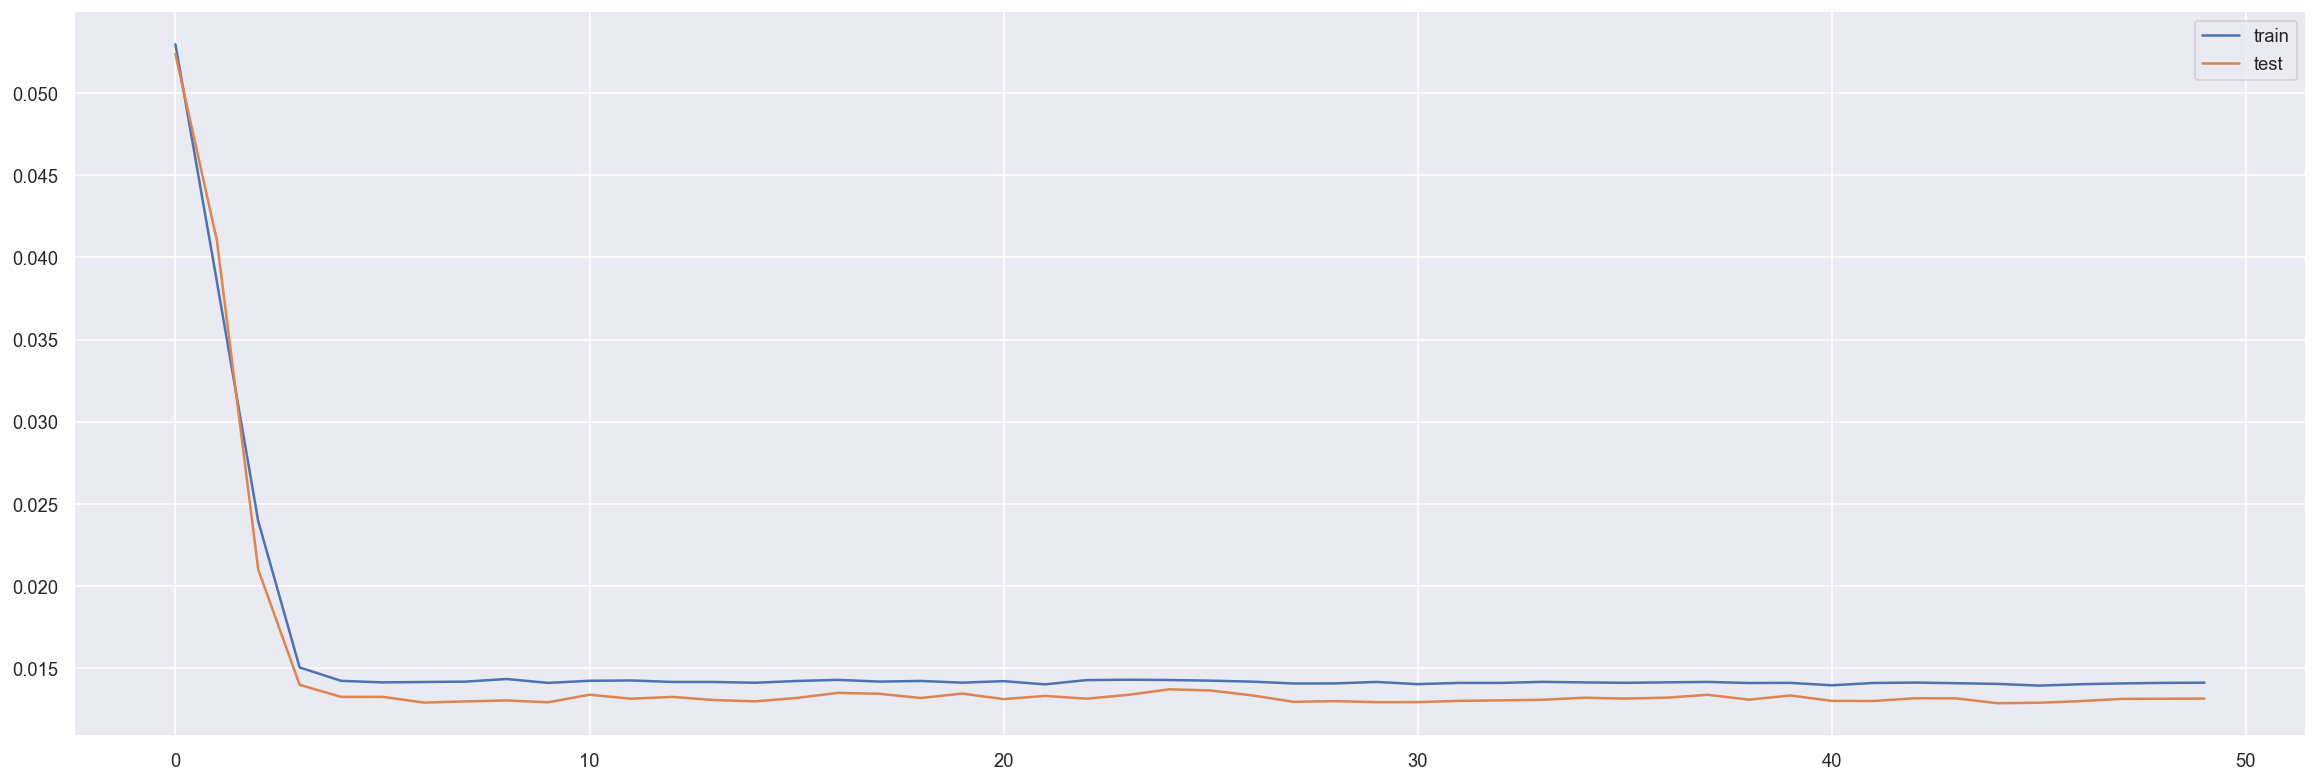

In [1506]:
# Controlling loss in train and test sets 

plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

Train and Test sets loss are minimal. There is no overfit, the table shows good results and it's stable. 

In [1507]:
# calculate RMSE

yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], test_x.shape[2]))

# Invert scaling for forecast 
inv_yhat = np.concatenate((yhat, test_x[:, 1:]), axis = 1) 
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]

# Invert scaling for actual 

test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1:]), axis = 1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]

rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('RMSE: {:.3f}'.format(rmse))


RMSE: 24.573


In [1512]:
# calculate MAE

mae = (mean_absolute_error(inv_y, inv_yhat))
print('Test MAE: %.3f' % mae)

Test MAE: 13.078


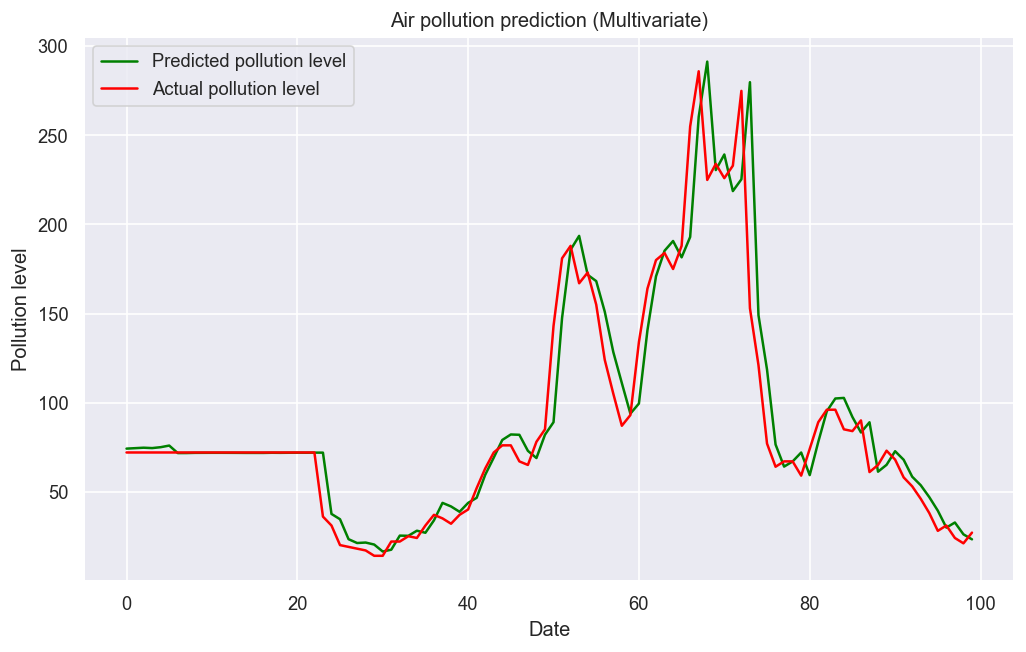

In [1509]:
# Making graphs with predicted and actual data 

y_tested = inv_y.reshape(-1, 1)
y_pred = inv_yhat.reshape(-1, 1)

plt.figure(figsize = (10, 6))
plt.plot(y_pred[:100, :], color = 'green', label = 'Predicted pollution level')
plt.plot(y_tested[:100, :], color = 'red', label = 'Actual pollution level')
plt.title('Air pollution prediction (Multivariate)')
plt.xlabel('Date')
plt.ylabel('Pollution level')
plt.legend()
plt.show()

Model showing results predicted and actual pollution level from 0 to 100 days. The model is stable and shows a good pattern to predict the actual results. 

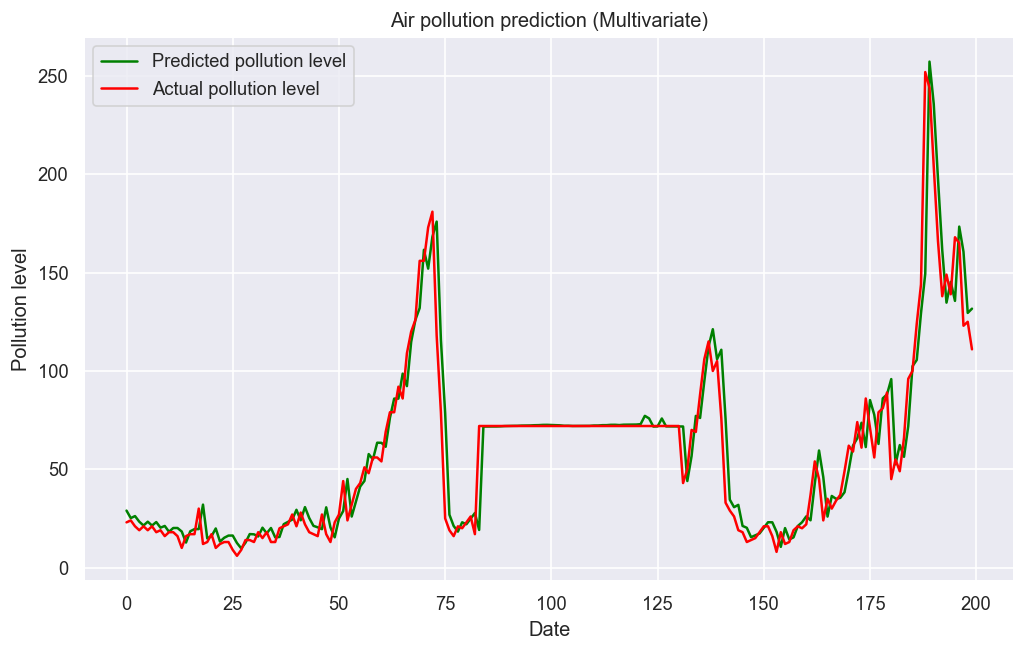

In [1510]:
# Making graphs with predicted and actual data 


y_tested = inv_y.reshape(-1, 1)
y_pred = inv_yhat.reshape(-1, 1)

plt.figure(figsize = (10, 6))
plt.plot(y_pred[100:300, :], color = 'green', label = 'Predicted pollution level')
plt.plot(y_tested[100:300, :], color = 'red', label = 'Actual pollution level')
plt.title('Air pollution prediction (Multivariate)')
plt.xlabel('Date')
plt.ylabel('Pollution level')
plt.legend()
plt.show()

Model showing results predicted and actual pollution level from 0 to 200 days. The model is stable and shows a good pattern to predict the actual results. 

### 5.2 LSTM Model with 256 neurons

The second model will define the LSTM with 256 neurons in the first hidden layer and a Dropout Layer of 0.25. Next we put a BatchNormalization to normalize the contributions to a layer for every mini-batch and also for regularization and not using another dropout function. Then we put the final output layer for predicting pollution. In the batch size we used seven days (24*7 Hours) data. Optimizer function we used Adam method. Loss function we used means squared error. Loss function we used means absolute error. Verbose we put 1 to observe loss and validation loss and shuffle False not to reorganize the dataset and use the data that we have for the consistency in results. 

In [1530]:
# Building the second LSTM model 

model2 = Sequential()
model2.add(LSTM(256, input_shape=(train_x.shape[1], train_x.shape[2])))
model2.add(Dense(64))
model2.add(Dropout(0.25))
model2.add(BatchNormalization())
model2.add(Dense(1))

model2.compile(loss='mse', optimizer='adam')

hist2 = model2.fit(train_x, train_y, epochs=50, batch_size=168, validation_data=(test_x, test_y))

Epoch 1/50
53/53 [==============================] - 3s 24ms/step - loss: 0.0568 - val_loss: 0.0075
Epoch 2/50
53/53 [==============================] - 1s 18ms/step - loss: 0.0057 - val_loss: 0.0074
Epoch 3/50
53/53 [==============================] - 1s 17ms/step - loss: 0.0026 - val_loss: 0.0072
Epoch 4/50
53/53 [==============================] - 1s 19ms/step - loss: 0.0021 - val_loss: 0.0068
Epoch 5/50
53/53 [==============================] - 1s 19ms/step - loss: 0.0019 - val_loss: 0.0066
Epoch 6/50
53/53 [==============================] - 1s 17ms/step - loss: 0.0015 - val_loss: 0.0067
Epoch 7/50
53/53 [==============================] - 1s 17ms/step - loss: 0.0017 - val_loss: 0.0054
Epoch 8/50
53/53 [==============================] - 1s 19ms/step - loss: 0.0015 - val_loss: 0.0053
Epoch 9/50
53/53 [==============================] - 1s 17ms/step - loss: 0.0016 - val_loss: 0.0041
Epoch 10/50
53/53 [==============================] - 1s 17ms/step - loss: 0.0016 - val_loss: 0.0039
Epoch 11/

In [1531]:
# Model summary, total 289,153 parameters

model2.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_35 (LSTM)              (None, 256)               272384    
                                                                 
 dense_74 (Dense)            (None, 64)                16448     
                                                                 
 dropout_44 (Dropout)        (None, 64)                0         
                                                                 
 batch_normalization_35 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_75 (Dense)            (None, 1)                 65        
                                                                 
Total params: 289,153
Trainable params: 289,025
Non-trainable params: 128
_____________________________________________

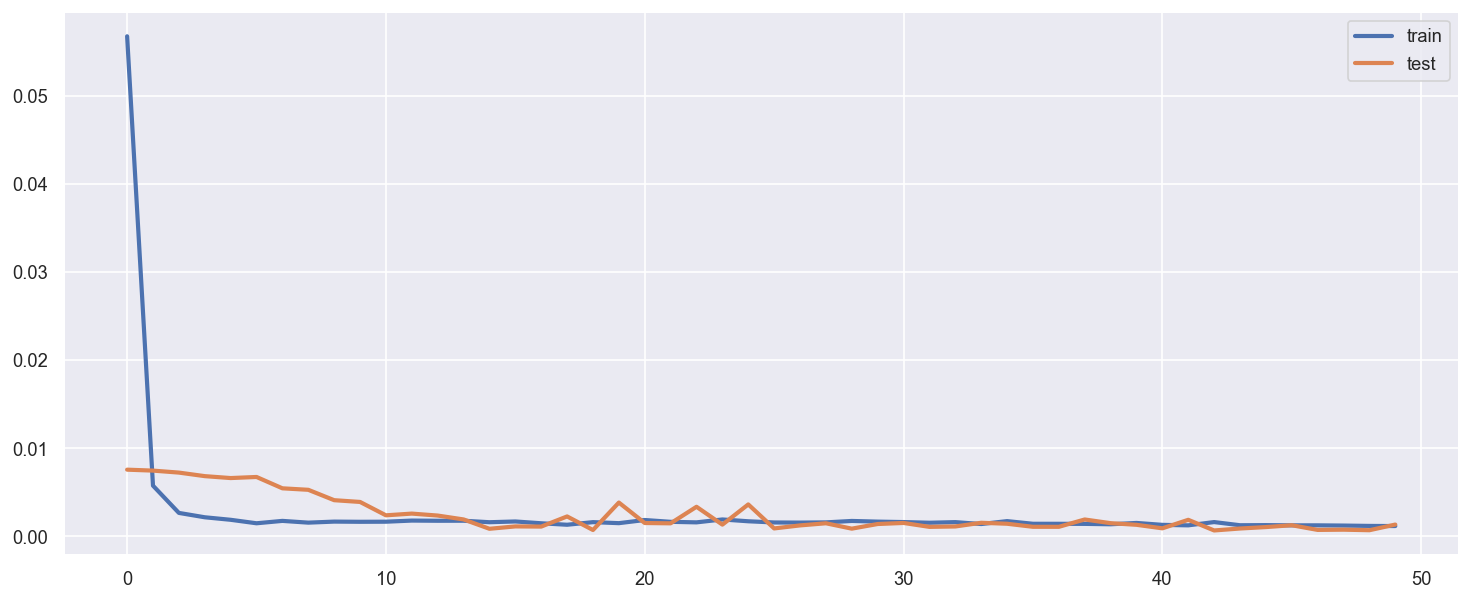

In [1532]:
# Controlling loss in train and test sets

plt.figure(figsize=(15,6))
plt.plot(hist2.history['loss'], label='train', linewidth = 2.5)
plt.plot(hist2.history['val_loss'], label='test',  linewidth = 2.5)
plt.legend()
plt.show()

Train and Test sets losses were different. Model was overfitting at the beginning and then stabilized showing better loss and val losses on train and test sets. 

In [1533]:
# calculate RMSE

yhat_2 = model2.predict(test_x)
test_x_2 = test_x.reshape((test_x.shape[0], test_x.shape[2]))

# Invert scaling for forecast 
inv_yhat_2 = np.concatenate((yhat_2, test_x_2[:, 1:]), axis = 1) 
inv_yhat_2 = scaler.inverse_transform(inv_yhat_2)
inv_yhat_2 = inv_yhat_2[:, 0]

# Invert scaling for actual 

test_y_2 = test_y.reshape((len(test_y), 1))
inv_y_2 = np.concatenate((test_y_2, test_x_2[:, 1:]), axis = 1)
inv_y_2 = scaler.inverse_transform(inv_y_2)
inv_y_2 = inv_y_2[:, 0]

rmse = math.sqrt(mean_squared_error(inv_y_2, inv_yhat_2))
print('RMSE: {:.3f}'.format(rmse))

RMSE: 36.034


In [1534]:
# calculate MAE

mae = (mean_absolute_error(inv_y_2, inv_yhat_2))
print('Test MAE: %.3f' % mae)

Test MAE: 29.317


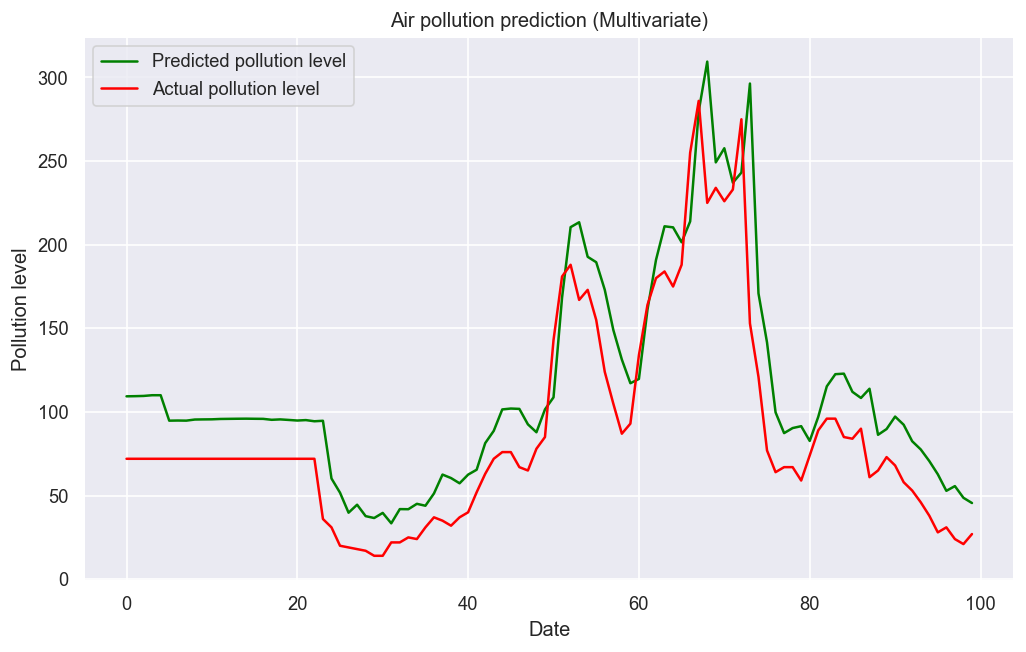

In [1535]:
# Making graphs with predicted and actual data 

y_tested_2 = inv_y_2.reshape(-1, 1)
y_pred_2 = inv_yhat_2.reshape(-1, 1)

plt.figure(figsize = (10, 6))
plt.plot(y_pred_2[:100, :], color = 'green', label = 'Predicted pollution level')
plt.plot(y_tested_2[:100, :], color = 'red', label = 'Actual pollution level')
plt.title('Air pollution prediction (Multivariate)')
plt.xlabel('Date')
plt.ylabel('Pollution level')
plt.legend()
plt.show()

Model showing results predicted and actual pollution level from 0 to 100 days. The model is less stable and shows less good patterns to predict the actual results compared with the base model.

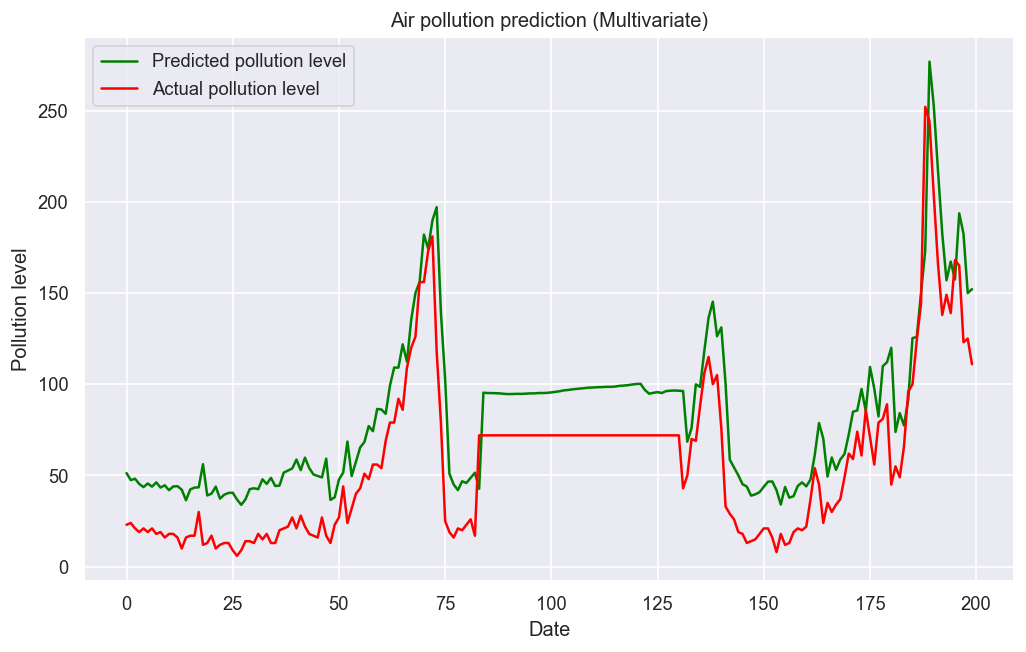

In [1536]:
# Making graphs with predicted and actual data 

y_tested_2 = inv_y_2.reshape(-1, 1)
y_pred_2 = inv_yhat_2.reshape(-1, 1)

plt.figure(figsize = (10, 6))
plt.plot(y_pred_2[100:300, :], color = 'green', label = 'Predicted pollution level')
plt.plot(y_tested_2[100:300, :], color = 'red', label = 'Actual pollution level')
plt.title('Air pollution prediction (Multivariate)')
plt.xlabel('Date')
plt.ylabel('Pollution level')
plt.legend()
plt.show()

Model showing results predicted and actual pollution level from 0 to 200 days. The model is less stable and shows less good patterns to predict the actual results compared with the base model.

### 5.1 LSTM Model with 512 neurons

In model 3 we define the LSTM with 512 neurons in the first hidden layer and a Dropout Layer of 0.2. Next we add 2 BatchNormalization to normalize the contributions to a layer for every mini-batch and also for regularization. Then we put the final output layer for predicting pollution. We also used dense layers for changing the dimension of the vectors by using every neuron. Similarly, we have one output layer for predicting pollution. In the batch size we used ten days (24*10 Hours) data. Optimizer function we used Adam method. Loss function we used means squared error. Loss function we used means absolute error. Verbose we put 1 to observe loss and validation loss and shuffle False not to reorganize the dataset and use the data that we have for the consistency in results.    

In [1614]:
# Building the third LSTM model 

model3 = Sequential()
model3.add(LSTM(512, input_shape=(train_x.shape[1], train_x.shape[2])))
model3.add(Dense(75))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())
model3.add(Dense(10))
model3.add(Dropout(0.1))
model3.add(BatchNormalization())
model3.add(Dense(1))
model3.compile(loss='mse', optimizer='adam')

In [1615]:
history3 = model3.fit(train_x, train_y, epochs=50, batch_size=240, validation_split=0.2, verbose=2, shuffle=True)

Epoch 1/50
30/30 - 3s - loss: 0.3272 - val_loss: 0.0120 - 3s/epoch - 85ms/step
Epoch 2/50
30/30 - 1s - loss: 0.1909 - val_loss: 0.0120 - 617ms/epoch - 21ms/step
Epoch 3/50
30/30 - 1s - loss: 0.1680 - val_loss: 0.0121 - 591ms/epoch - 20ms/step
Epoch 4/50
30/30 - 1s - loss: 0.1566 - val_loss: 0.0121 - 587ms/epoch - 20ms/step
Epoch 5/50
30/30 - 1s - loss: 0.1355 - val_loss: 0.0118 - 593ms/epoch - 20ms/step
Epoch 6/50
30/30 - 1s - loss: 0.1220 - val_loss: 0.0119 - 577ms/epoch - 19ms/step
Epoch 7/50
30/30 - 1s - loss: 0.1091 - val_loss: 0.0117 - 605ms/epoch - 20ms/step
Epoch 8/50
30/30 - 1s - loss: 0.0894 - val_loss: 0.0112 - 577ms/epoch - 19ms/step
Epoch 9/50
30/30 - 1s - loss: 0.0875 - val_loss: 0.0111 - 574ms/epoch - 19ms/step
Epoch 10/50
30/30 - 1s - loss: 0.0833 - val_loss: 0.0106 - 585ms/epoch - 20ms/step
Epoch 11/50
30/30 - 1s - loss: 0.0744 - val_loss: 0.0101 - 564ms/epoch - 19ms/step
Epoch 12/50
30/30 - 1s - loss: 0.0658 - val_loss: 0.0098 - 586ms/epoch - 20ms/step
Epoch 13/50
30/3

In [1616]:
# Model summary, total 1,108,472 parameters

model3.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_41 (LSTM)              (None, 512)               1069056   
                                                                 
 dense_80 (Dense)            (None, 75)                38475     
                                                                 
 dropout_51 (Dropout)        (None, 75)                0         
                                                                 
 batch_normalization_38 (Bat  (None, 75)               300       
 chNormalization)                                                
                                                                 
 dense_81 (Dense)            (None, 10)                760       
                                                                 
 dropout_52 (Dropout)        (None, 10)                0         
                                                     

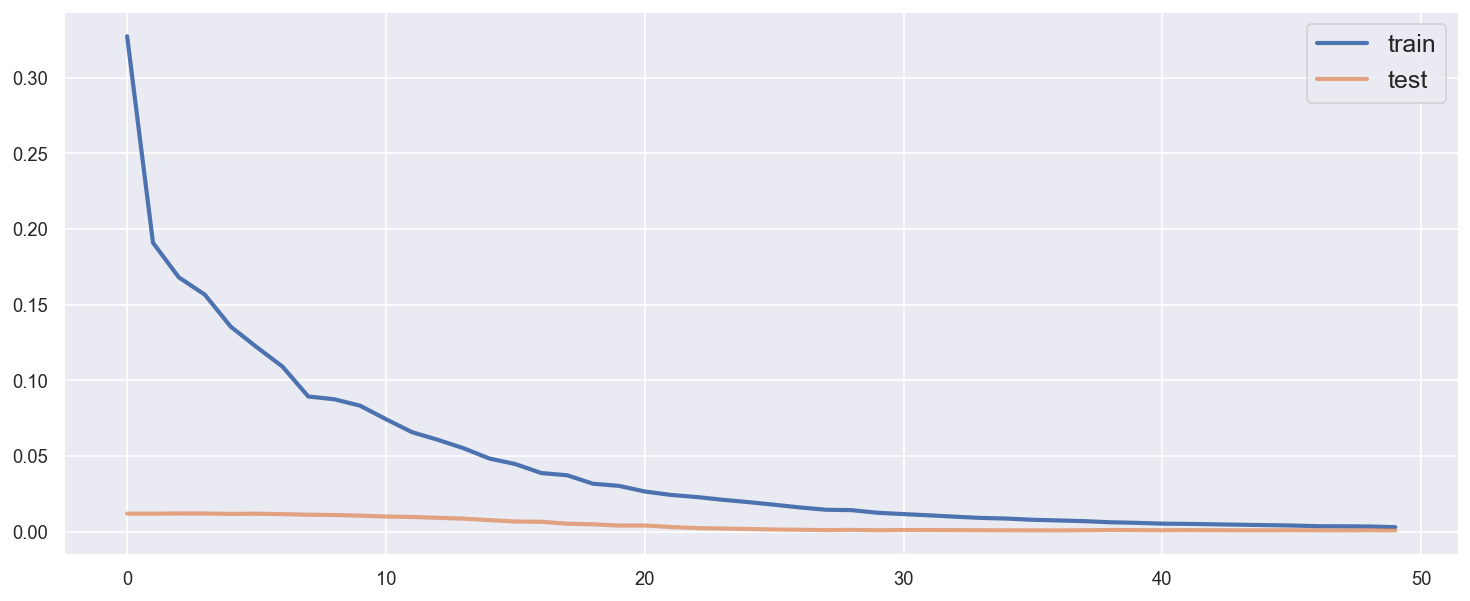

In [1617]:
# Controlling loss in train and test sets

plt.figure(figsize=(15,6))
plt.plot(history3.history['loss'], label='train', linewidth = 2.5)
plt.plot(history3.history['val_loss'], label='test', alpha=.7, linewidth = 2.5)
plt.legend(fontsize=15)
plt.show()

Train and Test sets losses were different. Model was overfitting at the beginning and then stabilized showing better loss and val losses on train and test sets. 


In [1618]:
# calculate RMSE

yhat_3 = model_3.predict(test_x)
test_x_3 = test_x.reshape((test_x.shape[0], test_x.shape[2]))

# Invert scaling for forecast 
inv_yhat_3 = np.concatenate((yhat_3, test_x_3[:, 1:]), axis = 1) 
inv_yhat_3 = scaler.inverse_transform(inv_yhat_3)
inv_yhat_3 = inv_yhat_3[:, 0]

# Invert scaling for actual 

test_y_3 = test_y.reshape((len(test_y), 1))
inv_y_3 = np.concatenate((test_y_3, test_x_3[:, 1:]), axis = 1)
inv_y_3 = scaler.inverse_transform(inv_y_3)
inv_y_3 = inv_y_3[:, 0]

rmse = math.sqrt(mean_squared_error(inv_y_3, inv_yhat_3))
print('RMSE: {:.3f}'.format(rmse))

RMSE: 27.860


In [1619]:
# calculate MAE

mae = (mean_absolute_error(inv_y_3, inv_yhat_3))
print('Test MAE: %.3f' % mae)

Test MAE: 17.772


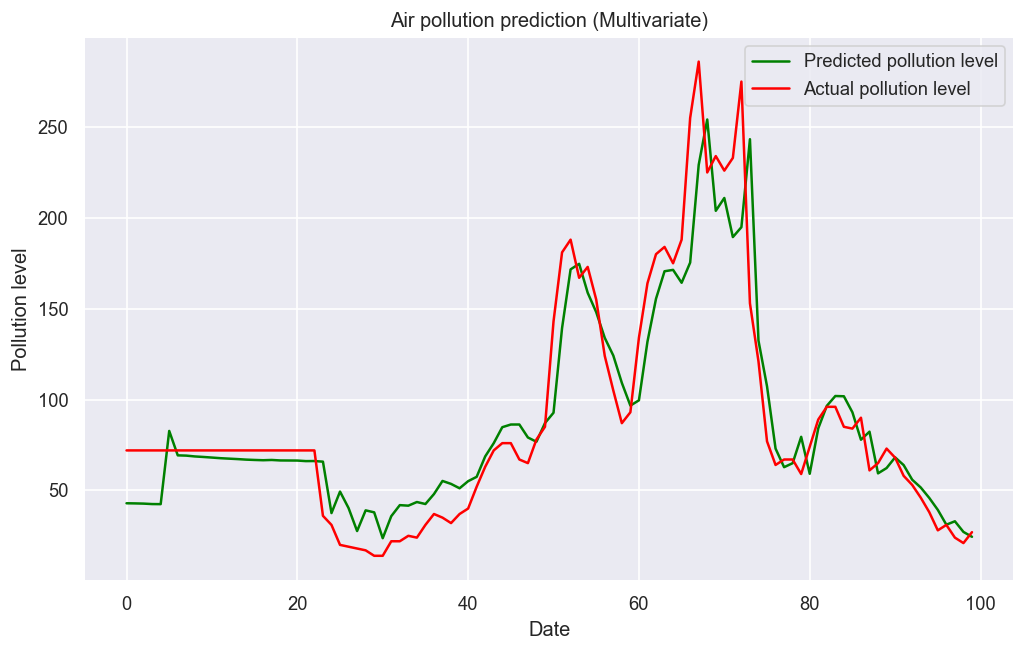

In [1620]:
# Making graphs with predicted and actual data 

y_tested_3 = inv_y_3.reshape(-1, 1)
y_pred_3 = inv_yhat_3.reshape(-1, 1)

plt.figure(figsize = (10, 6))
plt.plot(y_pred_3[:100, :], color = 'green', label = 'Predicted pollution level')
plt.plot(y_tested_3[:100, :], color = 'red', label = 'Actual pollution level')
plt.title('Air pollution prediction (Multivariate)')
plt.xlabel('Date')
plt.ylabel('Pollution level')
plt.legend()
plt.show()

Model showing results predicted and actual pollution level from 0 to 100 days. The model is a more stable and better pattern to predict the actual results compared with the model 2, but less accurate compared with the base model. 

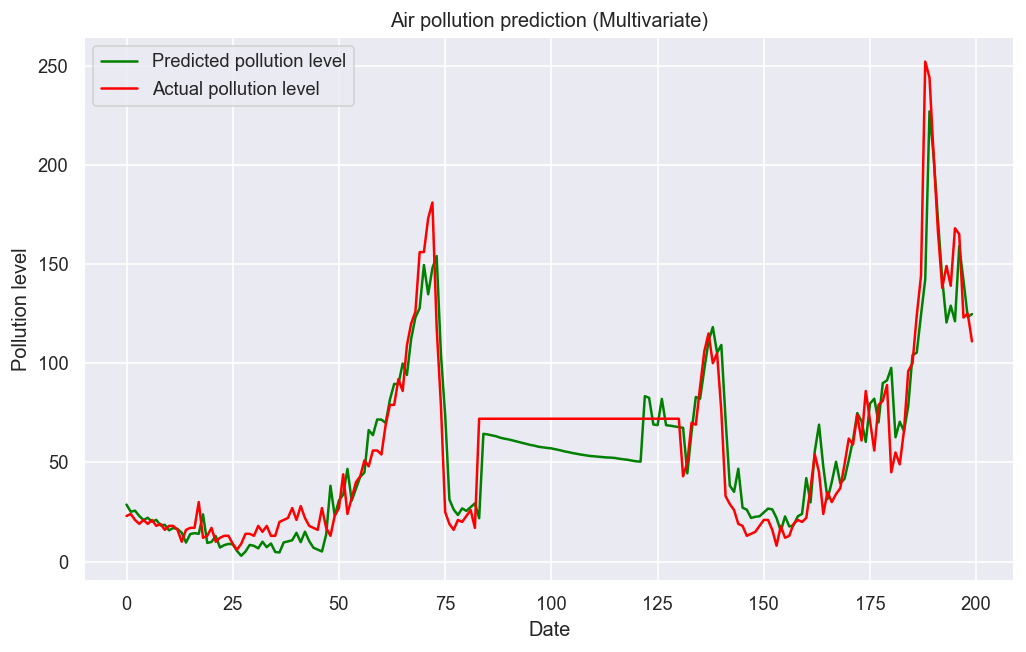

In [1621]:
# Making graphs with predicted and actual data 

y_tested_3 = inv_y_3.reshape(-1, 1)
y_pred_3 = inv_yhat_3.reshape(-1, 1)

plt.figure(figsize = (10, 6))
plt.plot(y_pred_3[100:300, :], color = 'green', label = 'Predicted pollution level')
plt.plot(y_tested_3[100:300, :], color = 'red', label = 'Actual pollution level')
plt.title('Air pollution prediction (Multivariate)')
plt.xlabel('Date')
plt.ylabel('Pollution level')
plt.legend()
plt.show()

Model showing results predicted and actual pollution level from 0 to 200 days. The model is a more stable and better pattern to predict the actual results compared with the model 2, but less accurate compared with the base model. 

### 5.1 LSTM Model with several LSTM layers

In model 4 we will define the LSTM with 100 neurons in the first hidden layer and a Dropout Layer of 0.3,Next there will be another hidden layer of 50 neurons and a Dropout of 0.2. Similarly, there will be two more hidden layers with respective 0.2 Dropouts and 50 neurons. In the Final Layer, 1 neuron in the output layer for predicting pollution. In the activation Function we used a linear function, because of the sequential dataset. In the batch size we used three days (24*3 Hours) data. Optimizer function we used Adam method. Loss function we used means squared error. By monitoring the value of the test data loss function, stop the training model when it is not decreasing, and save the current best model.

In [1639]:
# Building the fourth LSTM model

model4 = Sequential()
model4.add(LSTM(100, return_sequences = True, input_shape=(train_x.shape[1], train_x.shape[2])))
model4.add(Dropout(0.3))

model4.add(LSTM(units = 50, return_sequences = True))
model4.add(Dropout(0.2))

model4.add(LSTM(units = 50, return_sequences = True))
model4.add(Dropout(0.2))

model4.add(LSTM(units = 50))
model4.add(Dropout(0.2))

model4.add(Dense(1,activation='linear'))

model4.compile(loss='mse', optimizer='adam')

In [1640]:
history4 = model4.fit(train_x, train_y, epochs=50, batch_size=72, validation_data=(test_x, test_y), verbose=2, shuffle=False)

Epoch 1/50
122/122 - 7s - loss: 0.0082 - val_loss: 0.0087 - 7s/epoch - 60ms/step
Epoch 2/50
122/122 - 1s - loss: 0.0051 - val_loss: 0.0016 - 1s/epoch - 12ms/step
Epoch 3/50
122/122 - 1s - loss: 0.0018 - val_loss: 0.0013 - 1s/epoch - 12ms/step
Epoch 4/50
122/122 - 1s - loss: 0.0015 - val_loss: 8.8438e-04 - 1s/epoch - 11ms/step
Epoch 5/50
122/122 - 1s - loss: 0.0012 - val_loss: 8.5632e-04 - 1s/epoch - 10ms/step
Epoch 6/50
122/122 - 1s - loss: 0.0012 - val_loss: 6.9791e-04 - 1s/epoch - 10ms/step
Epoch 7/50
122/122 - 1s - loss: 0.0011 - val_loss: 6.9063e-04 - 1s/epoch - 10ms/step
Epoch 8/50
122/122 - 1s - loss: 0.0012 - val_loss: 6.5732e-04 - 1s/epoch - 10ms/step
Epoch 9/50
122/122 - 1s - loss: 0.0011 - val_loss: 6.5656e-04 - 1s/epoch - 10ms/step
Epoch 10/50
122/122 - 1s - loss: 0.0011 - val_loss: 6.2867e-04 - 1s/epoch - 12ms/step
Epoch 11/50
122/122 - 1s - loss: 0.0010 - val_loss: 6.3713e-04 - 1s/epoch - 12ms/step
Epoch 12/50
122/122 - 1s - loss: 0.0011 - val_loss: 6.6258e-04 - 1s/epoch -

In [1641]:
# Model summary, total 114,651 parameters

model4.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 1, 100)            44000     
                                                                 
 dropout_53 (Dropout)        (None, 1, 100)            0         
                                                                 
 lstm_43 (LSTM)              (None, 1, 50)             30200     
                                                                 
 dropout_54 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_44 (LSTM)              (None, 1, 50)             20200     
                                                                 
 dropout_55 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_45 (LSTM)              (None, 50)              

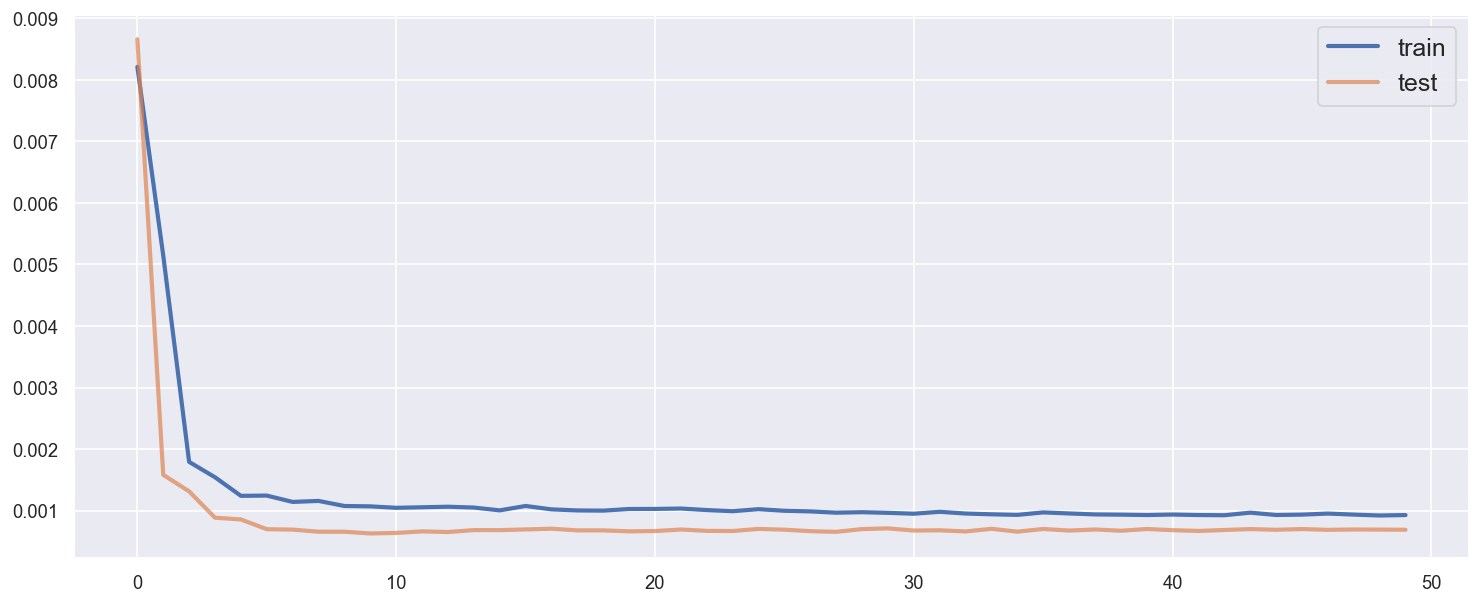

In [1642]:
# Controlling loss in train and test sets

plt.figure(figsize=(15,6))
plt.plot(history4.history['loss'], label='train', linewidth = 2.5)
plt.plot(history4.history['val_loss'], label='test', alpha=.7, linewidth = 2.5)
plt.legend(fontsize=15)
plt.show()

Train and Test sets loss are minimal. There is no overfit, the table shows good results and it's stable.

In [1643]:
# calculate RMSE

yhat_4 = model4.predict(test_x)
test_x_4 = test_x.reshape((test_x.shape[0], test_x.shape[2]))

# Invert scaling for forecast 
inv_yhat_4 = np.concatenate((yhat_4, test_x_4[:, 1:]), axis = 1) 
inv_yhat_4 = scaler.inverse_transform(inv_yhat_4)
inv_yhat_4 = inv_yhat_4[:, 0]

# Invert scaling for actual 

test_y_4 = test_y.reshape((len(test_y), 1))
inv_y_4 = np.concatenate((test_y_4, test_x_4[:, 1:]), axis = 1)
inv_y_4 = scaler.inverse_transform(inv_y_4)
inv_y_4 = inv_y_4[:, 0]

rmse = math.sqrt(mean_squared_error(inv_y_4, inv_yhat_4))
print('RMSE: {:.3f}'.format(rmse))

RMSE: 26.083


In [1644]:
# calculate MAE

mae = (mean_absolute_error(inv_y_4, inv_yhat_4))
print('Test MAE: %.3f' % mae)

Test MAE: 13.894


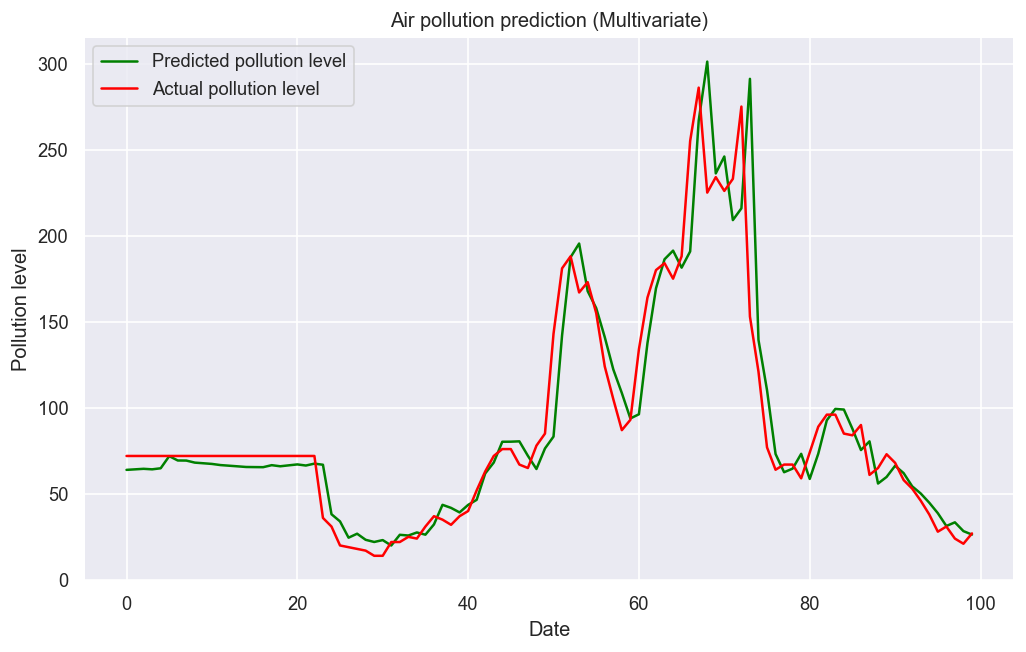

In [1645]:
# Making graphs with predicted and actual data 

y_tested_4 = inv_y_4.reshape(-1, 1)
y_pred_4 = inv_yhat_4.reshape(-1, 1)

plt.figure(figsize = (10, 6))
plt.plot(y_pred_4[:100, :], color = 'green', label = 'Predicted pollution level')
plt.plot(y_tested_4[:100, :], color = 'red', label = 'Actual pollution level')
plt.title('Air pollution prediction (Multivariate)')
plt.xlabel('Date')
plt.ylabel('Pollution level')
plt.legend()
plt.show()

Model showing results predicted and actual pollution level from 0 to 100 days. The model shows a good learning pattern to predict the actual results.  

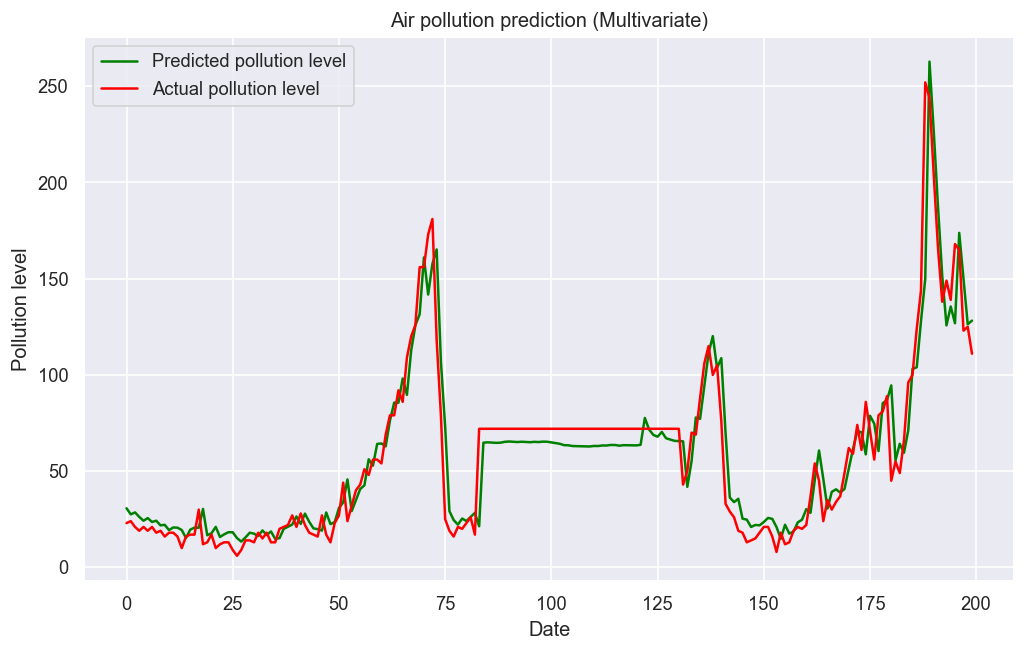

In [1646]:
# Making graphs with predicted and actual data 

y_tested_4 = inv_y_4.reshape(-1, 1)
y_pred_4 = inv_yhat_4.reshape(-1, 1)

plt.figure(figsize = (10, 6))
plt.plot(y_pred_4[100:300, :], color = 'green', label = 'Predicted pollution level')
plt.plot(y_tested_4[100:300, :], color = 'red', label = 'Actual pollution level')
plt.title('Air pollution prediction (Multivariate)')
plt.xlabel('Date')
plt.ylabel('Pollution level')
plt.legend()
plt.show()

Model showing results predicted and actual pollution level from 0 to 200 days. The model shows a good learning pattern to predict the actual results.   

## 8. Conclusion

This hourly dataset contains the PM2.5 data from US Embassy in Beijing that tracked the city pollution level from 2010-2014. We found that there was a positive correlation between "Temperature" ad "Dew point" variables (r = 0.82), and negative correlation between "PRES" and "Dew point" (r = -0.78), "Pres" and "Temperatures" (r = -0.83). Therefore, while "Temperature" is increasing the "Dew point" is increasing too. While "PRES" is decreasing, "Dew point" is increasing.

First, the highest pollution level was tracked when the temperature was between -10 and 0 degrees of Celsius. We also found out that dew point, atmospheric temperature, atmospheric pressure have cyclicity.

Second, meteorological feature weather parameters (dew point, atmospheric temperature, atmospheric pressure, wind direction, wind speed, snow, rain) affect air quality. For example, high wind speed will reduce the concentration of PM2.5, high humidity generally worsens air pollution, and high air pressure generally results in good air quality. Therefore, meteorological parameters are of prime importance for the task of forecasting air quality.

Third, when wind speed was reaching 400-500 (m/s) the level of pollution in the city was low whereas when the wind speed was low below 100 (m/s) the level of pollution was high. In the meantime, the temperature did not predict pollution level based on this graph.

Fourth, we found out that when there were more than 20-25 hours of snow, the level of pollution in the city was not as low as if it was with the rain. In the case when it was 30-36 hours of rain, the level of pollution in the city was low whereas when there was no rain the level of pollution was high.

Fifth, in each 47 weeks from 2010-2014, when the wind speeds were slow the air pollution was high. Each 7th week from 2010-2014 air pollution was the worst during the winter time due to the colder weather and high energy consumption.

Sixth, from 2010 to 2014, in February, June and October there was the highest level of pollution. In October the wind speeds were slow during that period of time and as a result, the polluted air stayed in the capital for a longer time. Air quality decreases during the summer because of the heat and sunlight. Finally, air pollution is worse in the winter time because colder and drier air traps bring more pollution. The most polluted quarter from 2010 to 2014 was Q1 due to the cold weather and the massive use of coal during the winter time. We found out that Beijing air pollution is mainly caused by vehicle emissions and the burning of coal to produce electricity.

Seventh, the basic LSTM model with 50 neurons in the hidden layer without a Dropout Layer and one output layer for predicting pollution showed the minimal amount of the error (RMSE: 24.573, Test MAE: 13.078). With the basic model, the model 4 with 4 LSTM layers, dropout functions, and one output layer also showed the minimal amount of the error (RMSE: 26.083, Test MAE: 13.894).

